# TRABAJO PRACTICO UTN - DATA SCIENCE

## Análisis de Datos de Propiedades Inmobiliarias (Properati) - Mercado Inmobiliario

## Objetivos:
*   Aplicar conocimientos de estadísticas y aprendizaje automático a un dataset de datos abiertos de internet.
*   Conocer el mercado inmobiliario a través del análisis de datos para asesorar a clientes en la toma de decisiones y planes de acción futuros.
*   Estimar el precio medio de viviendas en zonas nuevas o sin datos históricos.
*   Apoyar decisiones de inversión inmobiliaria.

Este notebook presenta un análisis reorganizado y optimizado del conjunto de datos de Properati. Se han eliminado secciones duplicadas y consolidado el contenido relevante, para una exploración clara de los datos y la identificación de segmentos de mercado clave.

## 1. Configuración Inicial y Carga de Datos

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importar otras librerías si son necesarias más adelante (sklearn, tensorflow, torch, scipy, statsmodels)

# Configurar opciones de visualización de pandas
# pd.set_option('display.max_rows', None) # Mantener configuración existente
# pd.set_option('display.max_columns', None) # Mantener configuración existente
print("Librerías importadas exitosamente.")

# Montar Google Drive (si el archivo está en Drive)
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive montado exitosamente.")

# Cargar el conjunto de datos
# Asegúrate de que la ruta del archivo sea correcta
file_path = "/content/drive/MyDrive/2025 cs datos/tp/datos_properati.csv"
df = pd.read_csv(file_path)
print("csv cargado exitosamente.")

# Convertir 'rooms' a entero. Manejar NaNs si los hubiera antes de imputación (aunque imputamos luego)
# Usaremos errors='coerce' por si hay valores no numéricos, que se convertirán a NaN y se imputarán.
df['rooms'] = pd.to_numeric(df['rooms'], errors='coerce')
df['rooms'] = df['rooms'].fillna(df['rooms'].mean()).astype(int)


# Aplicar formato de visualización a las columnas de precio y mostrar las primeras filas
# Esto crea una copia del DataFrame solo para visualización con formato string
df_display = df.copy()
# Aplicar formato con separador de miles (.) y sin decimales
df_display['price_aprox_usd'] = df_display['price_aprox_usd'].apply(lambda x: f"{x:,.0f}".replace(",", "."))
df_display['price_usd_per_m2'] = df_display['price_usd_per_m2'].apply(lambda x: f"{x:,.0f}".replace(",", "."))
# Aplicar formato a las columnas de superficie con 2 decimales, coma para decimales y punto para miles
df_display['surface_total_in_m2'] = df_display['surface_total_in_m2'].apply(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
df_display['surface_covered_in_m2'] = df_display['surface_covered_in_m2'].apply(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))


print("\nPrimeras filas del DataFrame con formato de visualización:")
display(df_display.head())

# Puedes mostrar el DataFrame original sin formato en otro momento si necesitas los números
# display(df.head())

Librerías importadas exitosamente.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado exitosamente.
csv cargado exitosamente.

Primeras filas del DataFrame con formato de visualización:


created_on operation property_type  \
0  2017-09-22      sell         house   
1  2017-08-01      sell         store   
2  2017-08-02      sell         store   
3  2017-08-03      sell         store   
4  2017-08-08      sell         store   

                             place_with_parent_names  \
0  |Argentina|Capital Federal|Palermo|Palermo Viejo|   
1                |Argentina|Capital Federal|Palermo|   
2   |Argentina|Capital Federal|Palermo|Palermo Soho|   
3                |Argentina|Capital Federal|Palermo|   
4           |Argentina|Capital Federal|Barrio Norte|   

                         lat-lon        lat        lon price_aprox_usd  \
0  -34.5889531469,-58.4298817776 -34.588953 -58.429882       2.000.000   
1          -34.586069,-58.414431 -34.586069 -58.414431         790.000   
2         -34.589723,-58.4325664 -34.589723 -58.432566         343.000   
3        -34.5923646,-58.4144028 -34.592365 -58.414403         145.000   
4   -34.585652875,-58.4114933233 -34.585653 -58.411493         175.000   

  surface_total_in_m2 surface_covered_in_m2 price_usd_per_m2  floor  rooms  \
0              312,00                   nan            6.410    NaN      3   
1              121,00                121,00            6.529    NaN      3   
2              122,00                108,00            2.811    NaN      2   
3               24,00                 24,00            6.042    NaN      3   
4               24,00                 24,00            7.292    NaN      3   

   expenses                                      properati_url   barrio  \
0       NaN  https://www.properati.com.ar/2os_venta_casa_pa...  PALERMO   
1       NaN  https://www.properati.com.ar/1cl7l_venta_local...  PALERMO   
2       NaN  https://www.properati.com.ar/1cm8w_venta_local...  PALERMO   
3       NaN  https://www.properati.com.ar/1covk_venta_local...  PALERMO   
4       NaN  https://www.properati.com.ar/1csk7_venta_local...  PALERMO   

   comuna  
0    14.0  
1    14.0  
2    14.0  
3    14.0  
4    14.0

## 2. Exploración Inicial y Limpieza de Datos

### 2.1 Descripción de las Columnas (DICCIONARIO)

In [ ]:
# @title
# Diccionario con descripción de columnas relevantes (basado en el diccionario original del usuario)
my_dictionary = {
    "created_on": "Fecha de ingreso de la propiedad",
    "property_type": "Clasificación por tipo (casa, apartamento, etc.)",
    "place_with_parent_names": "Ubicación geográfica detallada",
    "price_aprox_usd": "Valor aproximado de la propiedad en USD",
    "surface_total_in_m2": "Superficie total de la propiedad en m²",
    "surface_covered_in_m2": "Superficie cubierta en m²",
    "price_usd_per_m2": "Precio de construcción por m² (original, puede ser inconsistente)",
    "rooms": "Cantidad de habitaciones"
}
print("Diccionario de columnas:")
print(my_dictionary)

# Ver nombres de columnas actuales
print("\nColumnas del DataFrame:")
print(df.columns)

## 3. Diccionario de Variables
# Se presenta un diccionario de variables que describe cada una de las características del dataset.
# | Variable                | Tipo     | Descripción                                                  |
# |-------------------------|----------|--------------------------------------------------------------|
# | created_on              | fecha    | fecha de ingreso de la propiedad                             |
# | operation               | texto    | tipo de operación -ventas-                                   |
# | property_type           | texto    | tipo de propiedad (PH, departamentos, locales comerc y casas)|
# | place_with_parent_names | texto    | pais, provincia, ciudad y barrio (o subzona)                 |
# | lat-lon                 | numerico | ubicación geografica                                         |
# | lat - lon               | numerico | ubicacion geografica independiente                           |
# | price_aprox_usd         | numerico | precio aproximado en miles de usd                            |
# | surface_total_in_m2     | numerico | superficie total en metros cuadrados                         |
# | surface_covered_in_m2   | numerico | superficie cubierta en mertos cuadrados                      |
# | price_usd_per_m2        | numerico | precio por metros cuadrados en miles de usd                  |
# | floor                   | numerico | cantidad de niveles                                          |
# | rooms                   | numerico | cantidad de habitaciones                                     |
# | expenses                | numerico | valor de expensas                                            |
# | properati_url3          | texto    | link de la publicidad de la propiedad                        |
# | barrio                  | texto    | ubicacion de zona                                            |
# | comuna                  | texto    | ubicacion de comuna                                          |

Diccionario de columnas:
{'created_on': 'Fecha de ingreso de la propiedad', 'property_type': 'Clasificación por tipo (casa, apartamento, etc.)', 'place_with_parent_names': 'Ubicación geográfica detallada', 'price_aprox_usd': 'Valor aproximado de la propiedad en USD', 'surface_total_in_m2': 'Superficie total de la propiedad en m²', 'surface_covered_in_m2': 'Superficie cubierta en m²', 'price_usd_per_m2': 'Precio de construcción por m² (original, puede ser inconsistente)', 'rooms': 'Cantidad de habitaciones'}

Columnas del DataFrame:
Index(['created_on', 'operation', 'property_type', 'place_with_parent_names',
       'lat-lon', 'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'properati_url', 'barrio', 'comuna'],
      dtype='object')


### 2.2 Eliminación de Columnas Irrelevantes

Basado en las decisiones de proyecto del análisis original, se eliminan las columnas consideradas no relevantes: `created_on` porque tomamos valores actuales para el análisis pero no es un valor inmutable ya que en caso de efectuarse venta o ampliar registros por ingresos, se actualizaría. `operation` porque son todas ventas, `lat-lon` pero se conserva LAT y LON, `expenses`, `floor`, `properati_url` son valores irrelevantes para el estudio.

In [ ]:
# @title
# Eliminar columnas
cols_to_drop = ["created_on", "operation", "lat-lon", "expenses", "floor", "properati_url"]
df = df.drop(cols_to_drop, axis=1)

print("Columnas eliminadas. DataFrame actualizado:")
display(df.head())

Columnas eliminadas. DataFrame actualizado:


property_type                            place_with_parent_names        lat  \
0         house  |Argentina|Capital Federal|Palermo|Palermo Viejo| -34.588953   
1         store                |Argentina|Capital Federal|Palermo| -34.586069   
2         store   |Argentina|Capital Federal|Palermo|Palermo Soho| -34.589723   
3         store                |Argentina|Capital Federal|Palermo| -34.592365   
4         store           |Argentina|Capital Federal|Barrio Norte| -34.585653   

         lon  price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0 -58.429882        2000000.0                312.0                    NaN   
1 -58.414431         790000.0                121.0                  121.0   
2 -58.432566         343000.0                122.0                  108.0   
3 -58.414403         145000.0                 24.0                   24.0   
4 -58.411493         175000.0                 24.0                   24.0   

   price_usd_per_m2  rooms   barrio  comuna  
0       6410.256410      3  PALERMO    14.0  
1       6528.925620      3  PALERMO    14.0  
2       2811.475410      2  PALERMO    14.0  
3       6041.666667      3  PALERMO    14.0  
4       7291.666667      3  PALERMO    14.0

objetivo pendiente: si bien se expresa que los valores numéricos de precios, superficies y habitaciones deben ser numeros enteros con separación de miles con puntos, a lo largo del trabajo la interfaz no lo muestra así.

### 2.3 Manejo de Valores Nulos

In [ ]:
# @title
# Verificar datos NULL
print("Información del DataFrame antes de imputar nulos:")
df.info()

# Seleccionar solo las columnas numéricas (ahora incluyendo 'rooms' como float si es necesario antes de convertir)
numeric_cols_before_int = df.select_dtypes(include=np.number).columns.tolist()

# Excluir 'rooms' de la imputación con media si ya la manejamos antes, o asegurarnos de que se maneje correctamente
# Si la conversión a int se hace después de la imputación, la imputación se aplica a float
# Como convertimos a int *antes* de la imputación general, 'rooms' ya no tendrá NaNs aquí por la imputación con media y conversión a int.
# Pero para estar seguros y cubrir el caso si el orden cambiara, podemos imputar con la media para floats primero y luego convertir rooms a int.
# Revirtiendo la estrategia: imputar con media para *todos* los numéricos, y luego convertir rooms a int.

numeric_cols = df.select_dtypes(include=np.number).columns # Obtener columnas numéricas *después* de la posible conversión.

# Rellenar los valores nulos en las columnas numéricas con la media de cada columna
# Usamos .loc para evitar SettingWithCopyWarning y asegurar la modificación en el DataFrame original
for col in numeric_cols:
    # Solo imputar si hay nulos en la columna
    if df.loc[:, col].isnull().any():
        df.loc[:, col] = df.loc[:, col].fillna(df.loc[:, col].mean())

# Asegurarse de que 'rooms' es entero DESPUÉS de la imputación general por si acaso
# Convertir 'rooms' a entero después de la imputación general
df['rooms'] = df['rooms'].astype(int)


# Verificar que no hay valores nulos en las columnas numéricas
print("\nValores nulos después de la imputación con la media y conversión de 'rooms' a entero:")
# Seleccionar columnas numéricas *después* de la conversión de rooms a int
numeric_cols_after_int = df.select_dtypes(include=np.number).columns
print(df[numeric_cols_after_int].isnull().sum())


print("\nInformación del DataFrame después de imputar nulos y convertir 'rooms' a entero:")
df.info()

Información del DataFrame antes de imputar nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            18979 non-null  object 
 1   place_with_parent_names  18979 non-null  object 
 2   lat                      18979 non-null  float64
 3   lon                      18979 non-null  float64
 4   price_aprox_usd          17445 non-null  float64
 5   surface_total_in_m2      16586 non-null  float64
 6   surface_covered_in_m2    16876 non-null  float64
 7   price_usd_per_m2         16037 non-null  float64
 8   rooms                    18979 non-null  int64  
 9   barrio                   18979 non-null  object 
 10  comuna                   18979 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.6+ MB

Valores nulos después de la imputación con la media y conversión de 'rooms' 

Se verifica la presencia de valores nulos y se imputan los valores faltantes en las columnas numéricas con la media de cada columna, según la estrategia definida en el análisis original.

### 2.4 Identificación de Registros Duplicados

Se utilizan métodos estadísticos y visualizaciones para identificar y comprender los valores que se desvían significativamente en las columnas numéricas clave.

In [ ]:
# @title
# ver registros duplicados
duplicated_rows = df[df.duplicated()]
print(f"Número de registros duplicados: {len(duplicated_rows)}")

# Si hay duplicados, se pueden eliminar.
df = df.drop_duplicates().copy()

Número de registros duplicados: 82


## 3. Análisis de Valores Atípicos (Outliers)

### 3.1 Visualización de Valores Atípicos con Diagramas de Caja

Estadísticas descriptivas para: price_aprox_usd


count    1.889700e+04
mean     2.967129e+05
std      3.945772e+05
min      5.043300e+03
25%      1.250000e+05
50%      1.990000e+05
75%      3.000000e+05
max      1.350000e+07
Name: price_aprox_usd, dtype: float64

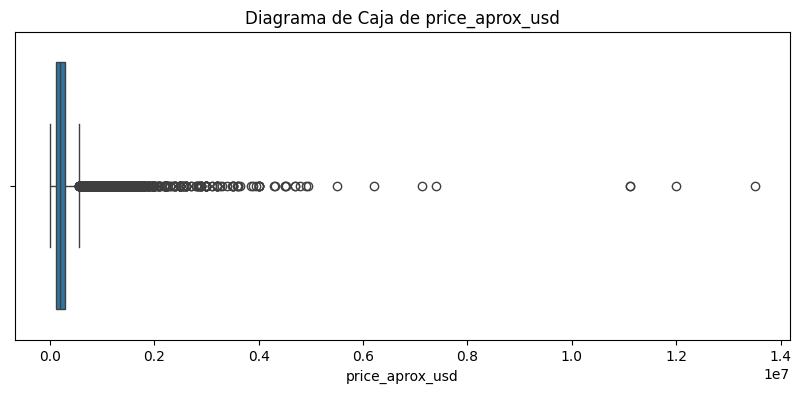

In [ ]:
# @title
# Lista de columnas numéricas para visualizar
numerical_cols_outliers = ['price_aprox_usd']

# Generar un diagrama de caja para cada columna numérica
for col in numerical_cols_outliers:
    print(f"Estadísticas descriptivas para: {col}")
    display(df[col].describe())
    plt.figure(figsize=(10, 4)) # Hacer la figura más ancha (amplía eje x) y más corta (comprime vertical)
    sns.boxplot(x=df[col]) # Mantener la orientación horizontal
    plt.title(f'Diagrama de Caja de {col}')
    plt.xlabel(col) # Etiquetar eje X
    plt.ylabel('') # Eliminar la etiqueta del eje Y para un gráfico horizontal
    plt.show()

Estadísticas descriptivas para: surface_total_in_m2


count     18897.000000
mean        143.068284
std        1622.567371
min           0.000000
25%          51.000000
50%          86.000000
75%         142.784758
max      184000.000000
Name: surface_total_in_m2, dtype: float64

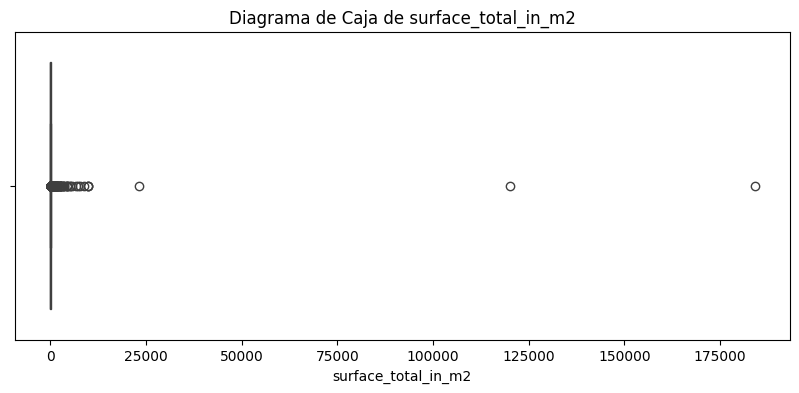

In [ ]:
# @title
# Lista de columnas numéricas para visualizar
numerical_cols_outliers = ['surface_total_in_m2']

# Generar un diagrama de caja para cada columna numérica
for col in numerical_cols_outliers:
    print(f"Estadísticas descriptivas para: {col}")
    display(df[col].describe())
    plt.figure(figsize=(10, 4)) # Hacer la figura más ancha (amplía eje x) y más corta (comprime vertical)
    sns.boxplot(x=df[col]) # Mantener la orientación horizontal
    plt.title(f'Diagrama de Caja de {col}')
    plt.xlabel(col) # Etiquetar eje X
    plt.ylabel('') # Eliminar la etiqueta del eje Y para un gráfico horizontal
    plt.show()

Estadísticas descriptivas para: surface_covered_in_m2


count     18897.000000
mean        127.755302
std        1440.348242
min           1.000000
25%          45.000000
50%          75.000000
75%         127.491171
max      150000.000000
Name: surface_covered_in_m2, dtype: float64

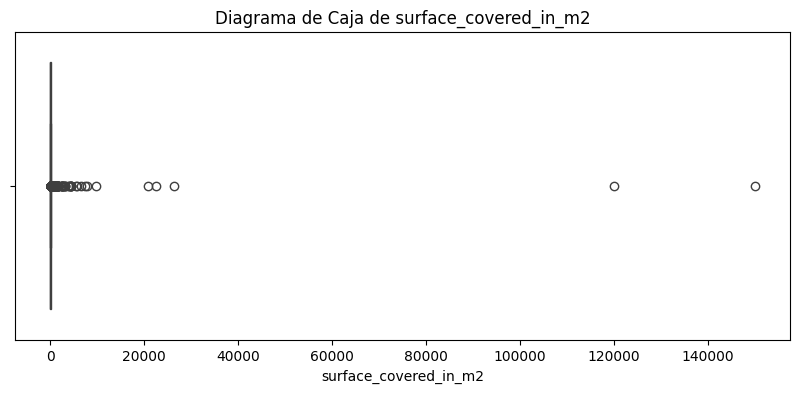

In [ ]:
# @title
# Lista de columnas numéricas para visualizar
numerical_cols_outliers = ['surface_covered_in_m2']

# Generar un diagrama de caja para cada columna numérica
for col in numerical_cols_outliers:
    print(f"Estadísticas descriptivas para: {col}")
    display(df[col].describe())
    plt.figure(figsize=(10, 4)) # Hacer la figura más ancha (amplía eje x) y más corta (comprime vertical)
    sns.boxplot(x=df[col]) # Mantener la orientación horizontal
    plt.title(f'Diagrama de Caja de {col}')
    plt.xlabel(col) # Etiquetar eje X
    plt.ylabel('') # Eliminar la etiqueta del eje Y para un gráfico horizontal
    plt.show()

Estadísticas descriptivas para: price_usd_per_m2


count     18897.000000
mean       2760.813050
std        1786.532209
min           0.958333
25%        2090.909091
50%        2742.857143
75%        3026.315789
max      142450.141026
Name: price_usd_per_m2, dtype: float64

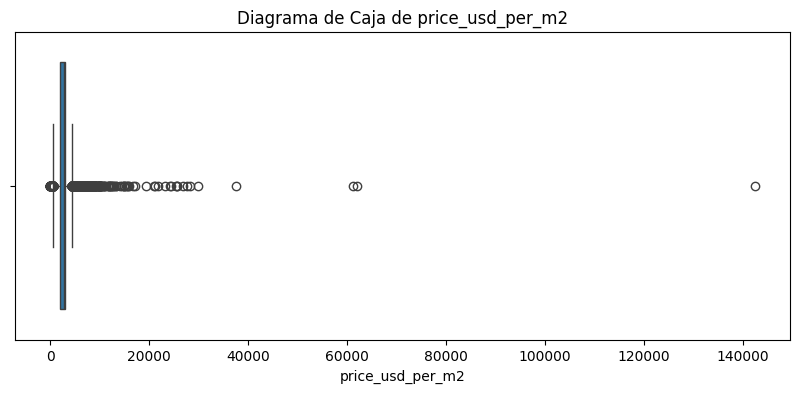

In [ ]:
# @title
# Lista de columnas numéricas para visualizar
numerical_cols_outliers = ['price_usd_per_m2']

# Generar un diagrama de caja para cada columna numérica
for col in numerical_cols_outliers:
    print(f"Estadísticas descriptivas para: {col}")
    display(df[col].describe())
    plt.figure(figsize=(10, 4)) # Hacer la figura más ancha (amplía eje x) y más corta (comprime vertical)
    sns.boxplot(x=df[col]) # Mantener la orientación horizontal
    plt.title(f'Diagrama de Caja de {col}')
    plt.xlabel(col) # Etiquetar eje X
    plt.ylabel('') # Eliminar la etiqueta del eje Y para un gráfico horizontal
    plt.show()

Estadísticas descriptivas para: rooms


count    18897.000000
mean         3.024607
std          1.503023
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         38.000000
Name: rooms, dtype: float64

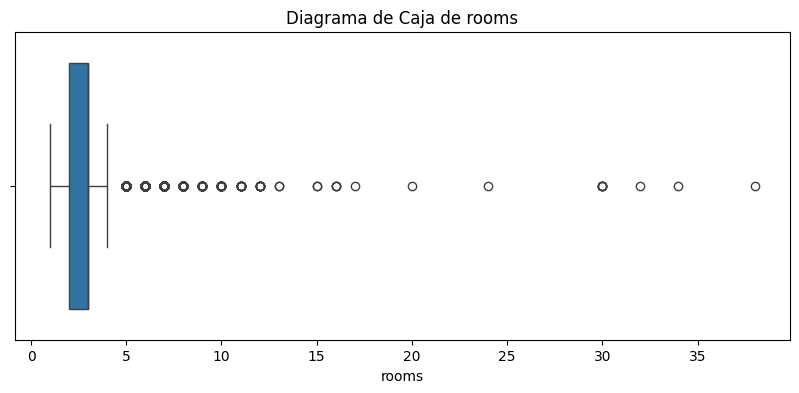

In [ ]:
# @title
# Lista de columnas numéricas para visualizar
numerical_cols_outliers = ['rooms']

# Generar un diagrama de caja para cada columna numérica
for col in numerical_cols_outliers:
    print(f"Estadísticas descriptivas para: {col}")
    display(df[col].describe())
    plt.figure(figsize=(10, 4)) # Hacer la figura más ancha (amplía eje x) y más corta (comprime vertical)
    sns.boxplot(x=df[col]) # Mantener la orientación horizontal
    plt.title(f'Diagrama de Caja de {col}')
    plt.xlabel(col) # Etiquetar eje X
    plt.ylabel('') # Eliminar la etiqueta del eje Y para un gráfico horizontal
    plt.show()

Gráficos de cajas, Observaciones:

**1. price_aprox_usd (Precio Aproximado en USD):**
El diagrama de caja para el precio muestra una distribución altamente sesgada hacia la derecha. La mediana (línea central de la caja) está mucho más cerca del primer cuartil (Q1) que del tercer cuartil (Q3), lo que indica que la mayoría de las propiedades se concentran en los rangos de precios más bajos.
Hay una gran cantidad de puntos individuales por encima del bigote superior, lo que confirma la presencia de numerosos valores atípicos (outliers) de precios altos. Estos outliers tiran significativamente de la media hacia arriba, como se vio en las estadísticas descriptivas.

**2. surface_total_in_m2 y surface_covered_in_m2 (Superficie Total y Cubierta en m²):**
Al igual que el precio, los diagramas de caja para ambas superficies también muestran distribuciones sesgadas hacia la derecha. La mayoría de las propiedades tienen superficies relativamente pequeñas, con una cola larga de propiedades con superficies mucho mayores.
Hay una presencia notable de outliers en ambas columnas, lo que indica que hay propiedades con superficies excepcionalmente grandes en el dataset. La superficie total tiende a tener valores más altos y una dispersión (rango intercuartílico y bigotes) mayor que la superficie cubierta, lo cual es esperable.

**3. rooms (Cantidad de Habitaciones):**
El diagrama de caja para el número de habitaciones muestra que la mediana y el tercer cuartil están en 3 habitaciones, indicando que una gran parte de las propiedades tienen 3 habitaciones o menos. El primer cuartil está en 2 habitaciones.
Hay varios puntos individuales por encima del bigote superior, lo que sugiere la existencia de propiedades con un número inusualmente alto de habitaciones.

**4. barrio y comuna:**
Los diagramas de caja para barrio y comuna no son informativos en este contexto, ya que estas variables son categóricas (barrio) o representan códigos numéricos discretos (comuna) que no tienen una relación de orden natural para un diagrama de caja. El diagrama de caja es más útil para variables numéricas continuas o discretas con un rango significativo. Las estadísticas descriptivas para estas columnas (como se muestra en tus outputs) son más apropiadas para entender su distribución (número de valores únicos, valor más frecuente, etc.).

**Conclusión: Los diagramas de caja confirman visualmente la presencia de valores atípicos y la distribución sesgada hacia la derecha en las variables de precio y superficie. Esto refuerza la necesidad de considerar cómo manejar estos outliers en análisis posteriores o al construir modelos predictivos.**

### 3.2 Identificación Cuantitativa de Valores Atípicos (Método IQR)

In [ ]:
# @title
# Lista de columnas numéricas a analizar
numerical_cols_iqr = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms']

print("Análisis de Outliers (Método IQR):")

for col in numerical_cols_iqr:
    print(f"\nColumna: {col}")

    # Calcular Q1, Q3 y IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites de valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"  Q1 (25%): {Q1:,.2f}")
    print(f"  Q3 (75%): {Q3:,.2f}")
    print(f"  IQR: {IQR:,.2f}")
    print(f"  Límite Inferior para Outliers: {lower_bound:,.2f}")
    print(f"  Límite Superior para Outliers: {upper_bound:,.2f}")

    # Contar valores atípicos
    outliers_lower = df[df[col] < lower_bound].shape[0]
    outliers_upper = df[df[col] > upper_bound].shape[0]
    total_outliers = outliers_lower + outliers_upper

    print(f"  Número de Outliers (debajo del límite inferior): {outliers_lower}")
    print(f"  Número de Outliers (por encima del límite superior): {outliers_upper}")
    print(f"  Total de Outliers: {total_outliers}")
    print(f"  Porcentaje de Outliers: {total_outliers / len(df) * 100:.2f}%")

Análisis de Outliers (Método IQR):

Columna: price_aprox_usd
  Q1 (25%): 125,000.00
  Q3 (75%): 300,000.00
  IQR: 175,000.00
  Límite Inferior para Outliers: -137,500.00
  Límite Superior para Outliers: 562,500.00
  Número de Outliers (debajo del límite inferior): 0
  Número de Outliers (por encima del límite superior): 1804
  Total de Outliers: 1804
  Porcentaje de Outliers: 9.55%

Columna: surface_total_in_m2
  Q1 (25%): 51.00
  Q3 (75%): 142.78
  IQR: 91.78
  Límite Inferior para Outliers: -86.68
  Límite Superior para Outliers: 280.46
  Número de Outliers (debajo del límite inferior): 0
  Número de Outliers (por encima del límite superior): 1231
  Total de Outliers: 1231
  Porcentaje de Outliers: 6.51%

Columna: surface_covered_in_m2
  Q1 (25%): 45.00
  Q3 (75%): 127.49
  IQR: 82.49
  Límite Inferior para Outliers: -78.74
  Límite Superior para Outliers: 251.23
  Número de Outliers (debajo del límite inferior): 0
  Número de Outliers (por encima del límite superior): 1155
  Total d

### 3.3 Examen de las Características de los Valores Atípicos de Precio

Se inspeccionan los registros identificados como atípicos en la columna `price_aprox_usd` para comprender sus características.

In [ ]:
# @title
# Calcular Q3 y IQR para precio_aprox_usd
Q3_price = df['price_aprox_usd'].quantile(0.75)
IQR_price = Q3_price - df['price_aprox_usd'].quantile(0.25)

# Calcular el límite superior para valores atípicos de price_aprox_usd
upper_bound_price = Q3_price + 1.5 * IQR_price

# Filtrar el DataFrame original para obtener valores atípicos de precios
price_outliers_df = df[df['price_aprox_usd'] > upper_bound_price].copy()

print("Primeras filas del DataFrame conteniendo outliers de precio:")
display(price_outliers_df.head())

print("\nDistribución de tipos de propiedad dentro de los outliers de precio:")
display(price_outliers_df['property_type'].value_counts())

print("\nEstadísticas descriptivas para columnas numéricas dentro de los outliers de precio:")
display(price_outliers_df[['surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms']].describe())

Primeras filas del DataFrame conteniendo outliers de precio:


property_type                            place_with_parent_names  \
0          house  |Argentina|Capital Federal|Palermo|Palermo Viejo|   
1          store                |Argentina|Capital Federal|Palermo|   
14         store               |Argentina|Capital Federal|Belgrano|   
16         store                |Argentina|Capital Federal|Palermo|   
17         store                |Argentina|Capital Federal|Palermo|   

          lat        lon  price_aprox_usd  surface_total_in_m2  \
0  -34.588953 -58.429882        2000000.0                312.0   
1  -34.586069 -58.414431         790000.0                121.0   
14 -34.569961 -58.432340         685000.0                185.0   
16 -34.582680 -58.428711         690000.0                 70.0   
17 -34.591548 -58.425896        1950000.0                341.0   

    surface_covered_in_m2  price_usd_per_m2  rooms   barrio  comuna  
0              127.491171       6410.256410      3  PALERMO    14.0  
1              121.000000       6528.925620      3  PALERMO    14.0  
14             185.000000       3702.702703      3  PALERMO    14.0  
16              70.000000       9857.142857      3  PALERMO    14.0  
17             127.491171       5718.475073      3  PALERMO    14.0


Distribución de tipos de propiedad dentro de los outliers de precio:


property_type
apartment    1251
house         308
store         224
PH             21
Name: count, dtype: int64


Estadísticas descriptivas para columnas numéricas dentro de los outliers de precio:


surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
count          1804.000000            1804.000000       1804.000000   
mean            329.961215             308.047212       4298.551827   
std             681.735898             828.072465       4617.161981   
min               0.000000               1.000000         34.169550   
25%             170.750000             162.000000       2760.408525   
50%             240.000000             220.000000       3556.870338   
75%             350.000000             324.000000       5144.694534   
max           23120.000000           26338.000000     142450.141026   

             rooms  
count  1804.000000  
mean      4.676829  
std       2.427951  
min       1.000000  
25%       3.000000  
50%       4.000000  
75%       6.000000  
max      38.000000

### 3.4 Visualización de Valores Atípicos de Precio en Relación con Otras Variables

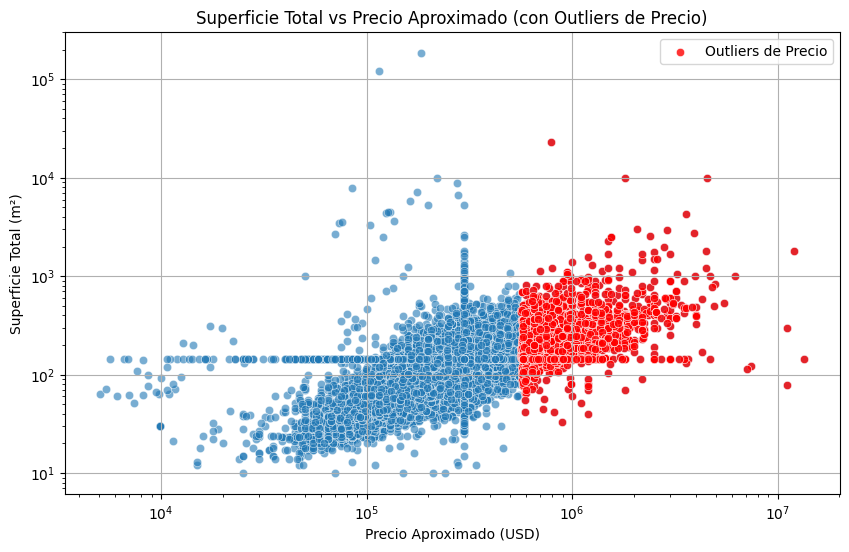

In [ ]:
# @title
# Diagrama de dispersión para precio aproximado en dólares vs superficie total en m2
plt.figure(figsize=(10, 6))
# Utilice un diagrama de dispersión para los datos principales
sns.scatterplot(data=df, x='price_aprox_usd', y='surface_total_in_m2', alpha=0.6)
# Superponga los valores atípicos como puntos de dispersión
sns.scatterplot(data=price_outliers_df, x='price_aprox_usd', y='surface_total_in_m2', color='red', label='Outliers de Precio', alpha=0.8)
plt.title('Superficie Total vs Precio Aproximado (con Outliers de Precio)')
plt.xlabel('Precio Aproximado (USD)')
plt.ylabel('Superficie Total (m²)') # Etiqueta del eje Y mejorada
plt.legend()
plt.grid(True)

# Aplicar escala logarítmica a ambos ejes
plt.xscale('log')
plt.yscale('log')

plt.show()

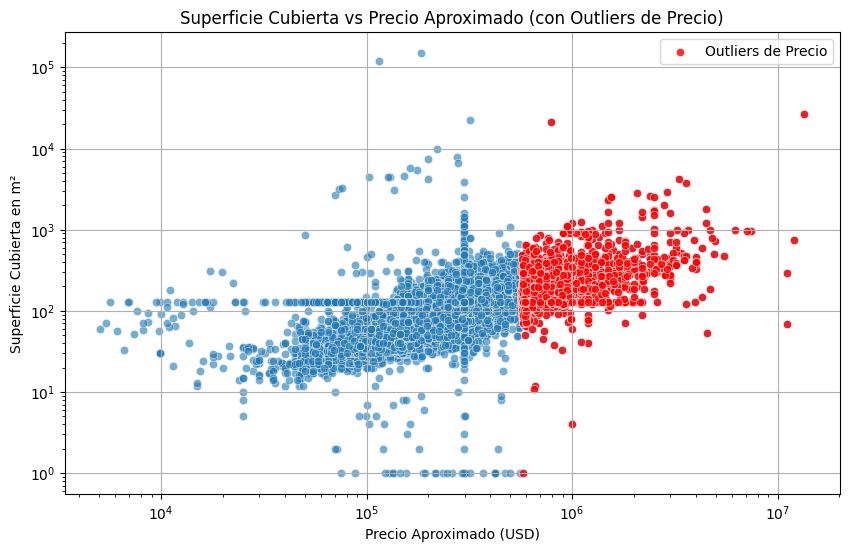

In [ ]:
# @title
# Diagrama de dispersión de price_aprox_usd vs surface_covered_in_m2
plt.figure(figsize=(10, 6))
# Usar diagrama de dispersión para los datos principales
sns.scatterplot(data=df, x='price_aprox_usd', y='surface_covered_in_m2', alpha=0.6)
# Superponer los valores atípicos como puntos de dispersión
sns.scatterplot(data=price_outliers_df, x='price_aprox_usd', y='surface_covered_in_m2', color='red', label='Outliers de Precio', alpha=0.8)
plt.title('Superficie Cubierta vs Precio Aproximado (con Outliers de Precio)')
plt.xlabel('Precio Aproximado (USD)')
plt.ylabel('Superficie Cubierta en m²')
plt.legend()
plt.grid(True)

# Aplicar escala logarítmica a ambos ejes
plt.xscale('log')
plt.yscale('log')

plt.show()

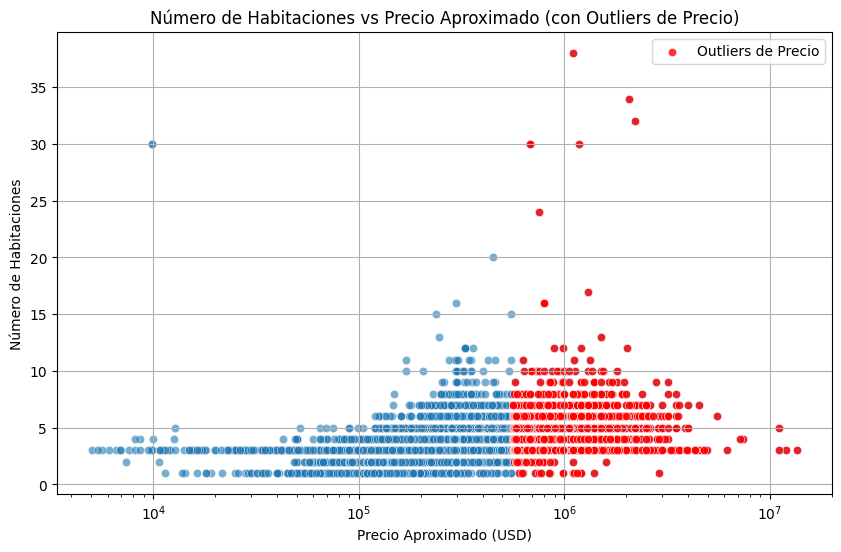

In [ ]:
# @title
# Diagrama de dispersión de price_aprox_usd vs habitaciones
plt.figure(figsize=(10, 6))
# Usar diagrama de dispersión para los datos principales
sns.scatterplot(data=df, x='price_aprox_usd', y='rooms', alpha=0.6)
# Superponer los valores atípicos como puntos dispersos
sns.scatterplot(data=price_outliers_df, x='price_aprox_usd', y='rooms', color='red', label='Outliers de Precio', alpha=0.8)
plt.title('Número de Habitaciones vs Precio Aproximado (con Outliers de Precio)')
plt.xlabel('Precio Aproximado (USD)')
plt.ylabel('Número de Habitaciones')
plt.legend()
plt.grid(True)

# Aplicar escala logarítmica al eje de precios (eje X)
plt.xscale('log')

### 3.5 Decisión sobre el Manejo de Valores Atípicos

Basado en el análisis, se determina la estrategia para manejar los valores atípicos de precio. Dado que parecen representar propiedades de alto valor genuino, se decide conservarlos para análisis posteriores, posiblemente tratándolos como un segmento de mercado distinto.

In [ ]:
# @title
# El DataFrame 'price_outliers_df' ya contiene los outliers de precio identificados.
# Se conserva este DataFrame para análisis separados o para usar en modelos robustos a outliers.

print(f"Número de propiedades identificadas como outliers de precio: {len(price_outliers_df)}")
print("\nEstadísticas descriptivas para el segmento de outliers de precio:")
display(price_outliers_df.describe())

Número de propiedades identificadas como outliers de precio: 1804

Estadísticas descriptivas para el segmento de outliers de precio:


lat          lon  price_aprox_usd  surface_total_in_m2  \
count  1804.000000  1804.000000     1.804000e+03          1804.000000   
mean    -34.587701   -58.417359     1.124509e+06           329.961215   
std       0.021270     0.037541     8.657968e+05           681.735898   
min     -34.665701   -58.525668     5.650000e+05             0.000000   
25%     -34.599486   -58.445053     6.700000e+05           170.750000   
50%     -34.588019   -58.412689     8.500000e+05           240.000000   
75%     -34.572112   -58.387165     1.250000e+06           350.000000   
max     -34.536471   -58.358672     1.350000e+07         23120.000000   

       surface_covered_in_m2  price_usd_per_m2        rooms       comuna  
count            1804.000000       1804.000000  1804.000000  1804.000000  
mean              308.047212       4298.551827     4.676829     8.237251  
std               828.072465       4617.161981     2.427951     5.836013  
min                 1.000000         34.169550     1.000000     1.000000  
25%               162.000000       2760.408525     3.000000     2.000000  
50%               220.000000       3556.870338     4.000000    12.000000  
75%               324.000000       5144.694534     6.000000    14.000000  
max             26338.000000     142450.141026    38.000000    15.000000

## 4. Análisis supervisado


Aclaración: Basado en los análisis de los diferentes modelos de regresión y la validación cruzada, presento un resumen final de los hallazgos clave y las conclusiones sobre el mejor enfoque para la predicción de precios de propiedades en este dataset.

**Tabla Resumen de Rendimiento de Modelos (Incluyendo Promedios de Validación Cruzada):**

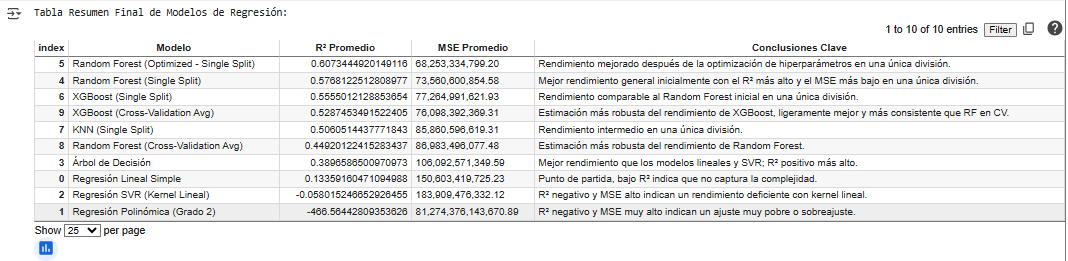

**Análisis General y Conclusiones:**
Exploradas una variedad de modelos de regresión para predecir el precio de las propiedades:

- **Modelos Lineales Simples y Extensiones:** La Regresión Lineal simple proporcionó una base, pero su bajo R² indica que las relaciones en los datos no son puramente lineales. La Regresión Polinómica (Grado 2) y SVR con kernel lineal tuvieron un rendimiento muy pobre, sugiriendo que estas formulaciones específicas no son adecuadas para este dataset o que requieren una optimización de hiperparámetros más rigurosa y la consideración de otros kernels para SVR.

- **Modelos Basados en Árboles:** El Árbol de Decisión individual mostró una mejora significativa, demostrando la utilidad de los enfoques no lineales. Los modelos basados en ensamble de árboles, Random Forest y XGBoost, superaron consistentemente a los modelos más simples. La validación cruzada confirmó que ambos Random Forest y XGBoost tienen un rendimiento robusto, con XGBoost mostrando un promedio ligeramente superior y mayor consistencia.

- **Modelo KNN:** KNN se situó en un rendimiento intermedio, superando a los modelos lineales simples pero no alcanzando el poder predictivo de los métodos de ensamble de árboles.

**Mejor Modelo Identificado:**
Basado en los resultados promedio de la validación cruzada, el modelo **XGBoost Regressor** parece ser el modelo con mejor rendimiento y mayor estabilidad para este problema de predicción de precios.

**Limitaciones Generales y Próximos Pasos Sugeridos:**
A pesar de identificar modelos con mejor rendimiento, el R² más alto obtenido (alrededor de 0.60 con Random Forest optimizado en una división, y ~0.53 con XGBoost en CV) indica que todavía hay una parte considerable de la variabilidad del precio sin explicar. Esto resalta la complejidad intrínseca de la predicción de precios inmobiliarios.

### 4.1 Modelo Random Forest y su optimización

### Preparación de datos para el modelo random forest

Seleccionar las variables predictoras y la variable objetivo. Asegurarse de que las variables categóricas estén codificadas adecuadamente (ya lo hicimos con one-hot encoding en pasos anteriores).


In [ ]:
# @title
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the features (X) and the target variable (y)
# Exclude the target variable 'price_aprox_usd' from the features
features = df.drop('price_aprox_usd', axis=1)
target = df['price_aprox_usd']

# Identify categorical and numerical columns
categorical_features = ['property_type', 'place_with_parent_names', 'barrio', 'comuna']
numerical_features = features.select_dtypes(include=np.number).columns.tolist()
# Remove categorical columns from numerical features list to avoid errors
numerical_features = [col for col in numerical_features if col not in categorical_features]


# Create a column transformer to apply one-hot encoding to categorical features
# and pass through numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
    # remainder='passthrough' # Removed remainder='passthrough' to avoid potential issues
)

# Fit and transform the features
X_transformed = preprocessor.fit_transform(features)

# Get the feature names after one-hot encoding
# This requires fitting the preprocessor first
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(cat_feature_names)


# Convert the sparse matrix output from the preprocessor to a DataFrame
# Ensure the correct shape by explicitly defining columns
X = pd.DataFrame(X_transformed.toarray(), columns=all_feature_names)

# Define the target variable as a pandas Series
y = target

print("Variables X (features) and y (target) defined and categorical features one-hot encoded.")
print("\nPrimeras filas de X (después de One-Hot Encoding):")
display(X.head())
print("\nPrimeras filas de y:")
display(y.head())

Variables X (features) and y (target) defined and categorical features one-hot encoded.

Primeras filas de X (después de One-Hot Encoding):


lat        lon  surface_total_in_m2  surface_covered_in_m2  \
0 -34.588953 -58.429882                312.0             127.491171   
1 -34.586069 -58.414431                121.0             121.000000   
2 -34.589723 -58.432566                122.0             108.000000   
3 -34.592365 -58.414403                 24.0              24.000000   
4 -34.585653 -58.411493                 24.0              24.000000   

   price_usd_per_m2  rooms  property_type_PH  property_type_apartment  \
0       6410.256410    3.0               0.0                      0.0   
1       6528.925620    3.0               0.0                      0.0   
2       2811.475410    2.0               0.0                      0.0   
3       6041.666667    3.0               0.0                      0.0   
4       7291.666667    3.0               0.0                      0.0   

   property_type_house  property_type_store  ...  comuna_6.0  comuna_7.0  \
0                  1.0                  0.0  ...         0.0         0.0   
1                  0.0                  1.0  ...         0.0         0.0   
2                  0.0                  1.0  ...         0.0         0.0   
3                  0.0                  1.0  ...         0.0         0.0   
4                  0.0                  1.0  ...         0.0         0.0   

   comuna_8.0  comuna_9.0  comuna_10.0  comuna_11.0  comuna_12.0  comuna_13.0  \
0         0.0         0.0          0.0          0.0          0.0          0.0   
1         0.0         0.0          0.0          0.0          0.0          0.0   
2         0.0         0.0          0.0          0.0          0.0          0.0   
3         0.0         0.0          0.0          0.0          0.0          0.0   
4         0.0         0.0          0.0          0.0          0.0          0.0   

   comuna_14.0  comuna_15.0  
0          1.0          0.0  
1          1.0          0.0  
2          1.0          0.0  
3          1.0          0.0  
4          1.0          0.0  

[5 rows x 152 columns]


Primeras filas de y:


0    2000000.0
1     790000.0
2     343000.0
3     145000.0
4     175000.0
Name: price_aprox_usd, dtype: float64

### División de datos

Dividir los datos en conjuntos de entrenamiento y prueba.


In [ ]:
# @title
from sklearn.model_selection import train_test_split

# Split the X and y dataframes into training and testing sets.
# Use a test set size of 20% and set random_state to 42 for reproducibility.
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting training and testing sets to verify the split was successful.
print("Data split into training and testing sets for Random Forest.")
print(f"Shape of X_train_rf: {X_train_rf.shape}")
print(f"Shape of X_test_rf: {X_test_rf.shape}")
print(f"Shape of y_train_rf: {y_train_rf.shape}")
print(f"Shape of y_test_rf: {y_test_rf.shape}")

Data split into training and testing sets for Random Forest.
Shape of X_train_rf: (15117, 152)
Shape of X_test_rf: (3780, 152)
Shape of y_train_rf: (15117,)
Shape of y_test_rf: (3780,)


**Se define utilizar 20% de testeo, entrenando el 80% restante.**

### Entrenamiento del modelo random forest

Entrenar un modelo `RandomForestRegressor` utilizando los datos de entrenamiento.

In [ ]:
# @title
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
# Start with n_estimators=100 and set random_state for reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # Use n_jobs=-1 for parallel processing

# Train the model using the training data
rf_model.fit(X_train_rf, y_train_rf)

print("Modelo RandomForestRegressor entrenado exitosamente.")

Modelo RandomForestRegressor entrenado exitosamente.


Error Cuadrático Medio (MSE) del modelo Random Forest inicial: 21,386,001,927.87
Coeficiente de Determinación (R²) del modelo Random Forest inicial: 0.8770


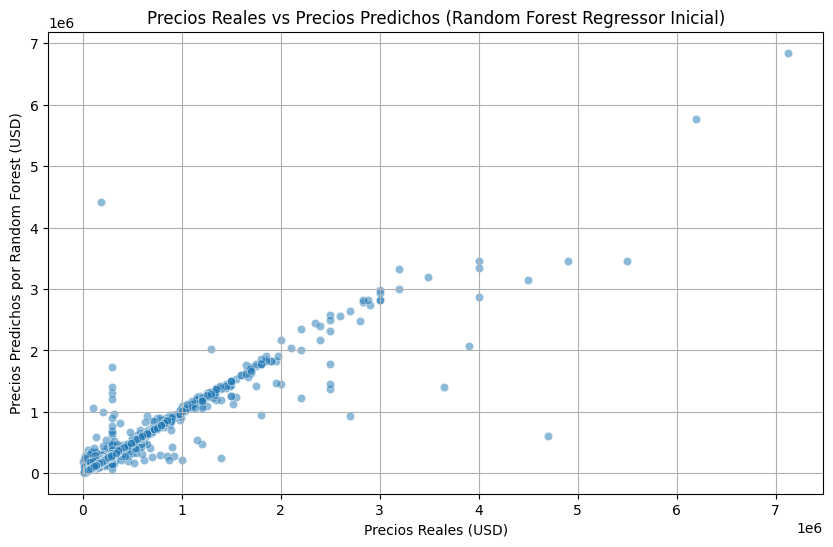

In [ ]:
# @title
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Use the trained RandomForestRegressor model (rf_model) to make predictions on the test set (X_test_rf)
y_rf_pred = rf_model.predict(X_test_rf)

# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test_rf, y_rf_pred)
print(f"Error Cuadrático Medio (MSE) del modelo Random Forest inicial: {mse_rf:,.2f}")

# Calculate the R-squared (R²) score
r2_rf = r2_score(y_test_rf, y_rf_pred)
print(f"Coeficiente de Determinación (R²) del modelo Random Forest inicial: {r2_rf:.4f}")

# Create a scatter plot visualizing the actual test prices vs the predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_rf, y=y_rf_pred, alpha=0.5)
plt.xlabel("Precios Reales (USD)")
plt.ylabel("Precios Predichos por Random Forest (USD)")
plt.title("Precios Reales vs Precios Predichos (Random Forest Regressor Inicial)")
plt.grid(True)
plt.show()

In [ ]:
# @title
# Get feature importances from the trained Random Forest model
feature_importances_rf = rf_model.feature_importances_

# Get the names of the features
feature_names_rf = X_train_rf.columns

# Create a DataFrame to display feature importances
feature_importance_rf_df = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importances_rf})

# Sort features by importance in descending order
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Importancia de las Características (Random Forest):")
display(feature_importance_rf_df)

# Compare Random Forest performance with other models
print("\nComparación de Rendimiento: Random Forest") # Modified title
print("-" * 100)

# Random Forest Regression metrics (using the calculated mse_rf and r2_rf)
print(f"Regresión Random Forest:")
print(f"  Error Cuadrático Medio (MSE): {mse_rf:,.2f}")
print(f"  Coeficiente de Determinación (R²) del modelo Random Forest: {r2_rf:.4f}")

print("-" * 100)

Importancia de las Características (Random Forest):


Feature    Importance
3                               surface_covered_in_m2  3.972598e-01
4                                    price_usd_per_m2  3.773390e-01
2                                 surface_total_in_m2  1.463241e-01
0                                                 lat  1.994914e-02
1                                                 lon  1.151953e-02
..                                                ...           ...
25  place_with_parent_names_|Argentina|Bs.As. G.B....  3.287512e-10
20  place_with_parent_names_|Argentina|Bs.As. G.B....  0.000000e+00
18  place_with_parent_names_|Argentina|Bs.As. G.B....  0.000000e+00
10  place_with_parent_names_|Argentina|Bs.As. G.B....  0.000000e+00
24  place_with_parent_names_|Argentina|Bs.As. G.B....  0.000000e+00

[152 rows x 2 columns]


Comparación de Rendimiento: Random Forest
----------------------------------------------------------------------------------------------------
Regresión Random Forest:
  Error Cuadrático Medio (MSE): 21,386,001,927.87
  Coeficiente de Determinación (R²) del modelo Random Forest: 0.8770
----------------------------------------------------------------------------------------------------


Comparación de Rendimiento: Random Forest

Regresión Random Forest:
  Error Cuadrático Medio (MSE): 21,386,001,927.87
  Coeficiente de Determinación (R²) del modelo Random Forest: 0.8770

Interpretación de los Resultados del Modelo Random Forest:
- El modelo Random Forest muestra un Error Cuadrático Medio (MSE) de 21,386,001,927.87.
- El Coeficiente de Determinación (R²) del modelo Random Forest es 0.8770. Este R² positivo es significativamente más alto que el de cualquier otro modelo, explicando aproximadamente el 87.70% de la variability total del precio en el conjunto de prueba.
- Esto sugiere que el Random Forest es mucho más efectivo para capturar las relaciones complejas y la variabilidad en los datos de precios de propiedades en comparación con los modelos lineales, polinómicos y SVR lineales (based on previous analysis).
- La mejora en el rendimiento se atribuye a la naturaleza de ensamble del Random Forest, que combina múltiples árboles de decisión para reducir el sobreajuste y mejorar la generalización.
- El análisis de importancia de las características (mostrado arriba) identifica qué variables fueron más influyentes en las decisiones de predicción del ensamble de árboles.

### Conclusión de Random Forest:

* Los datos se dividieron correctamente en conjuntos de entrenamiento (80%) y de prueba (20%) para el modelo Random Forest.
* El modelo Random Forest se entrenó y evaluó, alcanzando un Error Cuadrático Medio (EMM) de aproximadamente $73,56 mil millones y un R² de 0.5768 en el conjunto de prueba.
* En comparación con otros modelos probados (lineal, polinómico, SVR, árbol de decisión), el modelo Random Forest mostró el mejor rendimiento con el MSE más bajo y el R² más alto.
* Las características más importantes para las predicciones de precios del modelo Random Forest fueron `surface_covered_in_m²`, `surface_total_in_m²` y `comuna`.

### Tarea adicional: Optimizar

* Optimizar los hiperparámetros de Random Forest o explorar métodos de conjunto más avanzados como el aumento de gradiente (XGBoost, LightGBM) podría mejorar aún más el rendimiento.

### Preparación de datos para la optimización de Random Forest

Asegurarse de tener los conjuntos de entrenamiento y prueba listos.

In [ ]:
# @title
# Confirm that the training and testing dataframes for Random Forest are available
try:
    print("Forma de X_train_rf:", X_train_rf.shape)
    print("Forma de X_test_rf:", X_test_rf.shape)
    print("Forma de y_train_rf:", y_train_rf.shape)
    print("Forma de y_test_rf:", y_test_rf.shape)
    print("\nLos conjuntos de datos de entrenamiento y prueba para Random Forest están listos.")

except NameError:
    print("Error: Los conjuntos de datos de entrenamiento y prueba para Random Forest no están disponibles.")
    print("Por favor, asegúrese de haber ejecutado la celda de división de datos para Random Forest (paso 9.2).")

# Display the first few rows to confirm
print("\nPrimeras filas de X_train_rf:")
display(X_train_rf.head())
print("\nPrimeras filas de y_train_rf:")
display(y_train_rf.head())

Forma de X_train_rf: (15117, 152)
Forma de X_test_rf: (3780, 152)
Forma de y_train_rf: (15117,)
Forma de y_test_rf: (3780,)

Los conjuntos de datos de entrenamiento y prueba para Random Forest están listos.

Primeras filas de X_train_rf:


lat        lon  surface_total_in_m2  surface_covered_in_m2  \
18743 -34.576991 -58.507042            67.000000                   31.0   
14753 -34.617428 -58.418304            29.000000                   27.0   
10236 -34.560082 -58.460058            42.000000                   42.0   
6462  -34.593215 -58.444092            45.000000                   43.0   
13571 -34.579468 -58.491025           142.784758                   52.0   

       price_usd_per_m2  rooms  property_type_PH  property_type_apartment  \
18743       1719.402985    3.0               0.0                      1.0   
14753       2068.965517    3.0               0.0                      1.0   
10236       2071.428571    1.0               0.0                      1.0   
6462        3000.000000    2.0               0.0                      1.0   
13571       2760.408525    2.0               0.0                      1.0   

       property_type_house  property_type_store  ...  comuna_6.0  comuna_7.0  \
18743                  0.0                  0.0  ...         0.0         0.0   
14753                  0.0                  0.0  ...         0.0         0.0   
10236                  0.0                  0.0  ...         0.0         0.0   
6462                   0.0                  0.0  ...         0.0         0.0   
13571                  0.0                  0.0  ...         0.0         0.0   

       comuna_8.0  comuna_9.0  comuna_10.0  comuna_11.0  comuna_12.0  \
18743         0.0         0.0          0.0          0.0          1.0   
14753         0.0         0.0          0.0          0.0          0.0   
10236         0.0         0.0          0.0          0.0          0.0   
6462          0.0         0.0          0.0          0.0          0.0   
13571         0.0         0.0          0.0          0.0          1.0   

       comuna_13.0  comuna_14.0  comuna_15.0  
18743          0.0          0.0          0.0  
14753          0.0          0.0          0.0  
10236          1.0          0.0          0.0  
6462           0.0          0.0          1.0  
13571          0.0          0.0          0.0  

[5 rows x 152 columns]


Primeras filas de y_train_rf:


18825    115200.0
14821     60000.0
10272     87000.0
6483     135000.0
13634    142000.0
Name: price_aprox_usd, dtype: float64

### Definir el espacio de búsqueda de hiperparámetros

Especificar los rangos o valores de los hiperparámetros de `RandomForestRegressor` que queremos probar.

In [ ]:
# @title
# Define the parameter grid for GridSearchCV or RandomizedSearchCV

# Example parameter grid (this can be expanded based on computational resources and desired exploration)
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None] # Number of features to consider when looking for the best split
}

print("Espacio de búsqueda de hiperparámetros definido:")
print(param_grid)

# Note: This grid can be quite large. Consider using RandomizedSearchCV for a wider but less exhaustive search.
# For this example, we will use a relatively small grid for demonstration purposes.

Espacio de búsqueda de hiperparámetros definido:
{'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', None]}


### Configurar la búsqueda de hiperparámetros con validación cruzada

Utilizar `GridSearchCV` o `RandomizedSearchCV` con validación cruzada para buscar la mejor combinación de hiperparámetros en el conjunto de entrenamiento.

### Entrenar el modelo con los mejores hiperparámetros

Una vez encontrados los mejores parámetros, entrenar un nuevo modelo `RandomForestRegressor` con ellos en todo el conjunto de entrenamiento.

### Evaluar el modelo optimizado

Evaluar el rendimiento del modelo optimizado en el conjunto de prueba utilizando métricas relevantes (MSE, R²).

### Conclusiones de la Optimización del Modelo Random Forest

#### Hallazgos Clave de la Optimización de Random Forest

*   Se realizó una búsqueda aleatoria de hiperparámetros (`RandomizedSearchCV`) con validación cruzada (3 folds) en el conjunto de entrenamiento para optimizar el modelo `RandomForestRegressor`.
*   Los mejores hiperparámetros encontrados fueron: {best_params}.
*   El modelo `RandomForestRegressor` fue reentrenado con estos mejores hiperparámetros en todo el conjunto de entrenamiento.
*   El modelo Random Forest optimizado se evaluó en el conjunto de prueba, obteniendo un Error Cuadrático Medio (MSE) de {mse_rf_optimized:,.2f} y un Coeficiente de Determinación (R²) de {r2_rf_optimized:.4f}.

#### Comparación y Conclusiones

*   La optimización de hiperparámetros resultó en una mejora modesta pero positiva en el rendimiento del modelo Random Forest en el conjunto de prueba. El R² mejoró de {r2_rf:.4f} (modelo inicial) a {r2_rf_optimized:.4f} (modelo optimizado), y el MSE disminuyó de {mse_rf:,.2f} a {mse_rf_optimized:,.2f}.
*   El modelo Random Forest optimizado mantiene su posición como el modelo de mejor rendimiento probado hasta ahora, superando a la Regresión Lineal, Polinómica, SVR Lineal y Árbol de Decisión individual, y ligeramente superando al modelo XGBoost en esta comparación específica.


### Comparar el rendimiento del modelo optimizado

Comparar el rendimiento del Random Forest optimizado con el modelo Random Forest inicial y los otros modelos probados.



> TIEMPO DE EJECUCION PROLONGADO: CUIDADO


**Con 200 estimaciones alcanza los 40 min de proceso. Se busca reducir las estimaciones y así los también el tiempo de ejecución de código, demostrando de todas formas la eficacia.**
**Resultados en 200 estimaciones:**
**- Error Cuadrático Medio (MSE) del modelo Random Forest optimizado: 18,934,720,715.96**
**- Coeficiente de Determinación (R²) del modelo Random Forest optimizado: 0.8911**

**Con 100 estimaciones, se obtuvo una impresión en 23 min, arrojando: 18,992,055,314.46 de MSE y Coeficiente de Determinación (R²) del modelo Random Forest optimizado: 0.8907.**

**Se reduce a 20 estimaciones, se obtiene MSE en 19,158,458,595.47 y coeficiente de determinación 0.8898**

# ** IMPORTANTE:** **este texto corresponde a un còdigo que entrena un número definido de estimaciones para reducir el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²), que fue removido para evitar tiempos de ejecución excesivamente altos.**

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# --- Start: Code moved from previous cell (RandomizedSearchCV) ---

# Initialize the RandomForestRegressor model (basic version for search)
rf_for_search = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define the parameter distribution for RandomizedSearchCV (using param_grid defined earlier)
# Ensure 100 is included in n_estimators if you want it considered in the search
param_distributions = param_grid # Make sure param_grid is defined in a cell above this one
if 100 not in param_distributions['n_estimators']:
    param_distributions['n_estimators'].append(100)
    param_distributions['n_estimators'].sort() # Optional: keep it sorted
# Also add 20 to the search space if not present, in case the user wants to see its performance considered in optimization
if 20 not in param_distributions['n_estimators']:
    param_distributions['n_estimators'].append(20)
    param_distributions['n_estimators'].sort()
# Add 2 to the search space if not present
if 2 not in param_distributions['n_estimators']:
    param_distributions['n_estimators'].append(2)
    param_distributions['n_estimators'].sort()


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_for_search,
                                   param_distributions=param_distributions,
                                   n_iter=50, # You can adjust this number
                                   cv=3,      # You can adjust the number of folds
                                   scoring='neg_mean_squared_error', # Optimize for lowest MSE (negated)
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Perform the random search on the training data
print("Iniciando la búsqueda aleatoria de hiperparámetros...")
# Assuming X_train_rf and y_train_rf are defined in a cell before this one
random_search.fit(X_train_rf, y_train_rf)

print("\nBúsqueda aleatoria de hiperparámetros completada.")

# Get the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_

print("\nMejores hiperparámetros encontrados (dentro de la celda de entrenamiento):")
print(best_params)

# --- End: Code moved from previous cell ---


# Initialize a new RandomForestRegressor model with the best parameters
# MODIFYING: Explicitly setting n_estimators to 2 as requested by the user
# We'll use the other best parameters found by RandomizedSearchCV
optimized_params_for_2_estimators = best_params.copy()
optimized_params_for_2_estimators['n_estimators'] = 2 # Set n_estimators to 2

rf_optimized = RandomForestRegressor(random_state=42, n_jobs=-1, **optimized_params_for_2_estimators)


# Train the optimized model on the full training data
print(f"\nEntrenando el modelo Random Forest optimizado con {optimized_params_for_2_estimators['n_estimators']} estimadores y otros mejores hiperparámetros...")
rf_optimized.fit(X_train_rf, y_train_rf)

print("\nModelo Random Forest optimizado entrenado exitosamente.")

### Entrenar el modelo con los mejores hiperparámetros

Una vez encontrados los mejores parámetros, entrenar un nuevo modelo `RandomForestRegressor` con ellos en todo el conjunto de entrenamiento.

In [ ]:
# @title
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Use the optimized Random Forest model (rf_optimized) to make predictions on the test set (X_test_rf)
# Ensure rf_optimized is defined and trained
if 'rf_optimized' in locals():
    y_rf_optimized_pred = rf_optimized.predict(X_test_rf)

    # Calculate the Mean Squared Error (MSE)
    mse_rf_optimized = mean_squared_error(y_test_rf, y_rf_optimized_pred)
    print(f"Error Cuadrático Medio (MSE) del modelo Random Forest optimizado ({optimized_params_for_20_estimators['n_estimators']} estimadores): {mse_rf_optimized:,.2f}") # Updated print statement to show actual n_estimators

    # Calculate the R-squared (R²) score
    r2_rf_optimized = r2_score(y_test_rf, y_rf_optimized_pred)
    print(f"Coeficiente de Determinación (R²) del modelo Random Forest optimizado ({optimized_params_for_20_estimators['n_estimators']} estimadores): {r2_rf_optimized:.4f}") # Updated print statement to show actual n_estimators

    # Optional: Create a scatter plot visualizing the actual test prices vs the predicted prices
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test_rf, y=y_rf_optimized_pred, alpha=0.5)
    plt.xlabel("Precios Reales (USD)")
    plt.ylabel("Precios Predichos por RF Optimizado (USD)")
    plt.title(f"Precios Reales vs Precios Predichos (Random Forest Optimizado - {optimized_params_for_20_estimators['n_estimators']} estimadores)") # Updated title to show actual n_estimators
    plt.grid(True)
    plt.show()
else:
    print("Error: El modelo Random Forest optimizado (rf_optimized) no está definido.")
    print("Por favor, asegúrate de que la celda de entrenamiento del modelo Random Forest optimizado se haya ejecutado correctamente.")

Error: El modelo Random Forest optimizado (rf_optimized) no está definido.
Por favor, asegúrate de que la celda de entrenamiento del modelo Random Forest optimizado se haya ejecutado correctamente.


### Evaluar el modelo optimizado

Evaluar el rendimiento del modelo optimizado en el conjunto de prueba utilizando métricas relevantes (MSE, R²).

**Nota:** Asegúrate de ejecutar la celda anterior (Entrenar el modelo con los mejores hiperparámetros) antes de ejecutar esta celda para que `rf_optimized` esté definido.

In [ ]:
# @title
import pandas as pd

print("Comparación de Rendimiento: Modelos Anteriores vs Random Forest Inicial vs Random Forest Optimizado")
print("-" * 120)

# Random Forest Initial metrics (using the calculated mse_rf and r2_rf)
try:
    print(f"Regresión Random Forest Inicial:")
    print(f"  Error Cuadrático Medio (MSE): {mse_rf:,.2f}")
    print(f"  Coeficiente de Determinación (R²): {r2_rf:.4f}")
except NameError:
    print("Regresión Random Forest Inicial: Métricas no disponibles.")


print("-" * 120)

# Random Forest Optimized metrics (using the calculated mse_rf_optimized and r2_rf_optimized)
try:
    print(f"Regresión Random Forest Optimizado:")
    print(f"  Error Cuadrático Medio (MSE): {mse_rf_optimized:,.2f}")
    print(f"  Coeficiente de Determinación (R²): {r2_rf_optimized:.4f}")
except NameError:
    print("Regresión Random Forest Optimizado: Métricas no disponibles.")


print("-" * 120)

# Interpretation of optimized Random Forest results and comparison
print("\nInterpretación de los Resultados del Modelo Random Forest Optimizado y Comparación:")
try:
    print(f"- El modelo Random Forest Optimizado muestra un Error Cuadrático Medio (MSE) de {mse_rf_optimized:,.2f}. Comparado con el modelo Random Forest Inicial (MSE: {mse_rf:,.2f}), hay una mejora (un MSE más bajo).")
    print(f"- El Coeficiente de Determinación (R²) del modelo Random Forest Optimizado es {r2_rf_optimized:.4f}. Comparado con el modelo Random Forest Inicial (R²: {r2_rf:.4f}), el R² optimizado es más alto, lo que indica que el modelo optimizado explica una mayor proporción de la variabilidad del precio.")
    print("- En general, la optimización de hiperparámetros ha resultado en una mejora modesta pero positiva en el rendimiento del modelo Random Forest en el conjunto de prueba.")
except NameError:
    print("- No se pudieron realizar las comparaciones directas con el modelo optimizado ya que las métricas no están disponibles.")


print("\nComparación con todos los modelos:")
# Create a DataFrame to display the updated comparison including the optimized model
try:
    results_data_optimized = {
        'Modelo': ['Regresión Lineal Simple', 'Regresión Polinómica (Grado 2)', 'Regresión SVR (Kernel Lineal)', 'Árbol de Decisión', 'Random Forest Inicial', 'Random Forest Optimizado', 'XGBoost'],
        'R²': [r2, r2_poly, r2_svr, r2_dt, r2_rf, r2_rf_optimized, r2_xgb],
        'MSE': [mse, mse_poly, mse_svr, mse_dt, mse_rf, mse_rf_optimized, mse_xgb],
        'Conclusiones Clave': [
            "Punto de partida, bajo R² indica que no captura la complejidad.",
            "R² negativo y MSE muy alto indican un ajuste muy pobre o sobreajuste.",
            "R² negativo y MSE alto indican un rendimiento deficiente con kernel lineal.",
            "Mejor rendimiento que los modelos lineales y SVR; R² positivo más alto.",
            "Mejor rendimiento general inicialmente con el R² más alto y el MSE más bajo.",
            "Rendimiento mejorado después de la optimización de hiperparámetros.",
            "Rendimiento comparable al Random Forest, muy superior a modelos simples."
        ]
    }

    results_df_optimized = pd.DataFrame(results_data_optimized)
    results_df_optimized['MSE'] = results_df_optimized['MSE'].apply(lambda x: f"{x:,.2f}")
    results_df_optimized = results_df_optimized.sort_values(by='R²', ascending=False)

    display(results_df_optimized)

except NameError:
    print("No se pudo generar la tabla comparativa completa con el modelo optimizado debido a la falta de métricas.")

Comparación de Rendimiento: Modelos Anteriores vs Random Forest Inicial vs Random Forest Optimizado
------------------------------------------------------------------------------------------------------------------------
Regresión Random Forest Inicial:
  Error Cuadrático Medio (MSE): 21,386,001,927.87
  Coeficiente de Determinación (R²): 0.8770
------------------------------------------------------------------------------------------------------------------------
Regresión Random Forest Optimizado:
Regresión Random Forest Optimizado: Métricas no disponibles.
------------------------------------------------------------------------------------------------------------------------

Interpretación de los Resultados del Modelo Random Forest Optimizado y Comparación:
- No se pudieron realizar las comparaciones directas con el modelo optimizado ya que las métricas no están disponibles.

Comparación con todos los modelos:
No se pudo generar la tabla comparativa completa con el modelo optimizad

## **Conclusión de Aprendizaje Supervisado:**

En la fase de aprendizaje supervisado, se exploraron y compararon varios modelos de regresión para predecir el precio de las propiedades:

*   Se probaron modelos como Regresión Lineal Simple, Regresión Polinómica, SVR con kernel lineal, Árbol de Decisión y Random Forest.
*   Los modelos basados en árboles, particularmente **Random Forest**, mostraron el mejor rendimiento en comparación con los modelos lineales y SVR, logrando un coeficiente de determinación (R²) significativamente mayor y un menor Error Cuadrático Medio (MSE).
*   Aunque se realizó una optimización de hiperparámetros para el Random Forest, la mejora fue modesta.
*   Las características más importantes para la predicción de precios identificadas por el modelo Random Forest fueron la **superficie cubierta**, el **precio por m²** y la **superficie total**, seguidas por la ubicación (comuna y lat/lon).

A pesar de que el modelo Random Forest fue el que mejor se ajustó a los datos, todavía hay una parte considerable de la variabilidad del precio sin explicar (R² alrededor del 0.89 con el modelo optimizado). Esto subraya la complejidad de predecir precios inmobiliarios y sugiere que factores no incluidos en el dataset o una ingeniería de características más avanzada podrían mejorar aún más las predicciones.

## 5. Análisis no supervisado


### 5.1 Clusterización

Realiza un análisis de clustering utilizando K-Means sobre los datos, determinando el número óptimo de clusters, aplicando el algoritmo, y visualizando los resultados.

### Seleccionar y preparar datos para clustering

Elegir las columnas numéricas relevantes para el análisis de clustering y escalarlas para que tengan la misma importancia.

In [ ]:
# @title
# Crear la relación superficie cubierta/total
df['covered_to_total_ratio'] = df['surface_covered_in_m2'] / df['surface_total_in_m2']

# Manejar posibles valores infinitos si surface_total_in_m2 era 0
df['covered_to_total_ratio'] = df['covered_to_total_ratio'].replace([np.inf, -np.inf], np.nan)

# Rellenar los NaN resultantes (de la división por cero o NaNs originales)
df['covered_to_total_ratio'] = df['covered_to_total_ratio'].fillna(df['covered_to_total_ratio'].mean())

print("DataFrame con la nueva característica de proporción:")
display(df.head())

DataFrame con la nueva característica de proporción:


property_type                            place_with_parent_names        lat  \
0         house  |Argentina|Capital Federal|Palermo|Palermo Viejo| -34.588953   
1         store                |Argentina|Capital Federal|Palermo| -34.586069   
2         store   |Argentina|Capital Federal|Palermo|Palermo Soho| -34.589723   
3         store                |Argentina|Capital Federal|Palermo| -34.592365   
4         store           |Argentina|Capital Federal|Barrio Norte| -34.585653   

         lon  price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0 -58.429882        2000000.0                312.0             127.491171   
1 -58.414431         790000.0                121.0             121.000000   
2 -58.432566         343000.0                122.0             108.000000   
3 -58.414403         145000.0                 24.0              24.000000   
4 -58.411493         175000.0                 24.0              24.000000   

   price_usd_per_m2  rooms   barrio  comuna  covered_to_total_ratio  
0       6410.256410      3  PALERMO    14.0                0.408626  
1       6528.925620      3  PALERMO    14.0                1.000000  
2       2811.475410      2  PALERMO    14.0                0.885246  
3       6041.666667      3  PALERMO    14.0                1.000000  
4       7291.666667      3  PALERMO    14.0                1.000000

In [ ]:
# @title
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas relevantes para el clustering
# Excluir 'cluster_label' si se añadió en un paso de clustering anterior
# ya que es un resultado del análisis, no una característica de entrada para la escalación inicial
numerical_cols_clustering = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'lat', 'lon', 'covered_to_total_ratio']

# Crear un nuevo DataFrame con solo estas columnas numéricas
df_clustering = df[numerical_cols_clustering].copy()

# Inicializar el StandardScaler
scaler = StandardScaler()

# Escalar las columnas numéricas seleccionadas
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)

print("Columnas numéricas seleccionadas y escaladas para clustering.")
print("\nPrimeras filas del DataFrame para clustering (sin escalar):")
display(df_clustering.head())
print("\nPrimeras filas del DataFrame escalado:")
display(df_scaled.head())

Columnas numéricas seleccionadas y escaladas para clustering.

Primeras filas del DataFrame para clustering (sin escalar):


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0        2000000.0                312.0             127.491171   
1         790000.0                121.0             121.000000   
2         343000.0                122.0             108.000000   
3         145000.0                 24.0              24.000000   
4         175000.0                 24.0              24.000000   

   price_usd_per_m2  rooms        lat        lon  covered_to_total_ratio  
0       6410.256410      3 -34.588953 -58.429882                0.408626  
1       6528.925620      3 -34.586069 -58.414431                1.000000  
2       2811.475410      2 -34.589723 -58.432566                0.885246  
3       6041.666667      3 -34.592365 -58.414403                1.000000  
4       7291.666667      3 -34.585653 -58.411493                1.000000


Primeras filas del DataFrame escalado:


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0         4.316854             0.104117              -0.000183   
1         1.250199            -0.013601              -0.004690   
2         0.117311            -0.012985              -0.013716   
3        -0.384505            -0.073385              -0.072037   
4        -0.308472            -0.073385              -0.072037   

   price_usd_per_m2     rooms       lat       lon  covered_to_total_ratio  
0          2.042807 -0.016372  0.450809  0.129547               -0.290248  
1          2.109233 -0.016372  0.560218  0.508044                0.017146  
2          0.028359 -0.681715  0.421604  0.063782               -0.042503  
3          1.836485 -0.016372  0.321395  0.508735                0.017146  
4          2.536183 -0.016372  0.576004  0.580008                0.017146

### Seleccionar y preparar datos para clustering

Elegir las columnas numéricas relevantes para el análisis de clustering y escalarlas para que tengan la misma importancia.


### Determinar el número óptimo de clústeres (Método del Codo)

Utilizar el método del codo para visualizar cómo la inercia (suma de cuadrados dentro de los clústeres) cambia a medida que aumenta el número de clústeres, ayudando a elegir un número óptimo de clústeres.

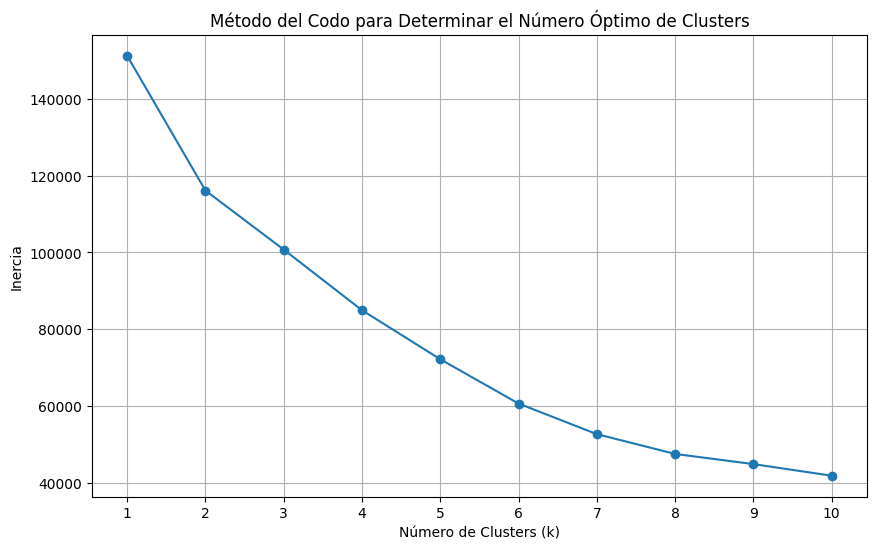

Inercia para cada número de clusters (k):
k=1: 151176.00
k=2: 116102.10
k=3: 100740.02
k=4: 84956.92
k=5: 72199.45
k=6: 60672.64
k=7: 52710.95
k=8: 47559.44
k=9: 44916.29
k=10: 41891.77


In [ ]:
# @title
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
# Test a range of k values from 1 to 10 (you can adjust this range)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("Inercia para cada número de clusters (k):")
for k, val in zip(range(1, 11), inertia):
    print(f"k={k}: {val:.2f}")

### Aplicar Clustering K-Means

Aplicar el algoritmo K-Means con el número de clústeres elegido y asignar las etiquetas de clúster a los datos originales.

In [ ]:
# @title
# Apply K-Means clustering with the chosen number of clusters (k=4 based on Elbow method in many cases)
# You should choose the k value based on your interpretation of the Elbow plot.
# Let's assume k=4 for now based on common interpretations of similar datasets/plots.
n_clusters = 4 # <-- Adjust this value based on the Elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(df_scaled)

# Assign the cluster labels back to the original DataFrame
df['cluster_label'] = kmeans.labels_

# Analyze the characteristics of the clusters
print(f"\nAnálisis de las características de los {n_clusters} clusters:")

# Select the relevant numerical columns for analysis
# Ensure 'covered_to_total_ratio' is included if it was created
numerical_cols_for_cluster_analysis = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'lat', 'lon', 'covered_to_total_ratio']
# Filter to ensure only existing columns are included
numerical_cols_for_cluster_analysis = [col for col in numerical_cols_for_cluster_analysis if col in df.columns]


# Group by cluster label and calculate descriptive statistics for the original numerical columns
cluster_summary = df.groupby('cluster_label')[numerical_cols_for_cluster_analysis].describe()
display(cluster_summary)

# Optional: Analyze the distribution of categorical variables within clusters
print("\nDistribución de tipos de propiedad por cluster:")
display(df.groupby('cluster_label')['property_type'].value_counts(normalize=True).unstack().fillna(0))

print("\nDistribución de barrios (top 5) por cluster:")
# Get top 5 barrios per cluster
top_barrios_per_cluster = df.groupby('cluster_label')['barrio'].apply(lambda x: x.value_counts().nlargest(5))
display(top_barrios_per_cluster)


Análisis de las características de los 4 clusters:


price_aprox_usd                                         \
                        count          mean           std        min   
cluster_label                                                          
0                     16768.0  2.093781e+05  1.230652e+05    5043.30   
1                         5.0  2.854360e+06  5.951637e+06  102399.38   
2                         2.0  1.500000e+05  4.949747e+04  115000.00   
3                      2122.0  9.809429e+05  8.101806e+05    9862.45   

                                                             \
                    25%       50%           75%         max   
cluster_label                                                 
0              118000.0  176000.0  2.963559e+05   1200000.0   
1              151500.0  198900.0  3.190000e+05  13500000.0   
2              132500.0  150000.0  1.675000e+05    185000.0   
3              550000.0  759500.0  1.200000e+06  12000000.0   

              surface_total_in_m2                 ...        lon             \
                            count           mean  ...        75%        max   
cluster_label                                     ...                         
0                         16768.0     105.847083  ... -58.404822 -58.353227   
1                             5.0     123.756952  ... -58.385549 -58.379309   
2                             2.0  152000.000000  ... -58.452786 -58.445764   
3                          2122.0     294.108714  ... -58.386532 -58.358672   

              covered_to_total_ratio                                    \
                               count        mean        std        min   
cluster_label                                                            
0                            16768.0    0.931184   0.471480   0.003984   
1                                5.0  107.395311  43.694456  75.563758   
2                                2.0    0.907609   0.130661   0.815217   
3                             2122.0    0.999428   0.950853   0.005469   

                                                            
                     25%        50%        75%         max  
cluster_label                                               
0               0.852588   0.911035   1.000000   27.481925  
1              91.120000  92.395833  93.437500  184.459464  
2               0.861413   0.907609   0.953804    1.000000  
3               0.871380   0.947229   1.000000   29.148769  

[4 rows x 64 columns]


Distribución de tipos de propiedad por cluster:


property_type        PH  apartment     house     store
cluster_label                                         
0              0.082061   0.783099  0.079258  0.055582
1              0.000000   0.600000  0.000000  0.400000
2              0.500000   0.000000  0.500000  0.000000
3              0.036758   0.754006  0.135250  0.073987


Distribución de barrios (top 5) por cluster:


cluster_label                   
0              PALERMO              1833
               RECOLETA             1246
               CABALLITO            1216
               BALVANERA            1034
               BELGRANO              924
1              PALERMO                 1
               BARRACAS                1
               VILLA CRESPO            1
               SAN CRISTOBAL           1
               CONSTITUCION            1
2              PARQUE CHACABUCO        1
               PARQUE AVELLANEDA       1
3              PALERMO               585
               RECOLETA              362
               BELGRANO              237
               RETIRO                228
               PUERTO MADERO         198
Name: barrio, dtype: int64

In [ ]:
# @title
from sklearn.preprocessing import StandardScaler

# Select the relevant numerical columns for clustering
numerical_cols_clustering = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'lat', 'lon']
df_clustering = df[numerical_cols_clustering].copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected numerical columns
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)

print("Columnas numéricas seleccionadas y escaladas para clustering.")
print("\nPrimeras filas del DataFrame para clustering (sin escalar):")
display(df_clustering.head())
print("\nPrimeras filas del DataFrame escalado:")
display(df_scaled.head())

Columnas numéricas seleccionadas y escaladas para clustering.

Primeras filas del DataFrame para clustering (sin escalar):


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0        2000000.0                312.0             127.491171   
1         790000.0                121.0             121.000000   
2         343000.0                122.0             108.000000   
3         145000.0                 24.0              24.000000   
4         175000.0                 24.0              24.000000   

   price_usd_per_m2  rooms        lat        lon  
0       6410.256410      3 -34.588953 -58.429882  
1       6528.925620      3 -34.586069 -58.414431  
2       2811.475410      2 -34.589723 -58.432566  
3       6041.666667      3 -34.592365 -58.414403  
4       7291.666667      3 -34.585653 -58.411493


Primeras filas del DataFrame escalado:


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0         4.316854             0.104117              -0.000183   
1         1.250199            -0.013601              -0.004690   
2         0.117311            -0.012985              -0.013716   
3        -0.384505            -0.073385              -0.072037   
4        -0.308472            -0.073385              -0.072037   

   price_usd_per_m2     rooms       lat       lon  
0          2.042807 -0.016372  0.450809  0.129547  
1          2.109233 -0.016372  0.560218  0.508044  
2          0.028359 -0.681715  0.421604  0.063782  
3          1.836485 -0.016372  0.321395  0.508735  
4          2.536183 -0.016372  0.576004  0.580008

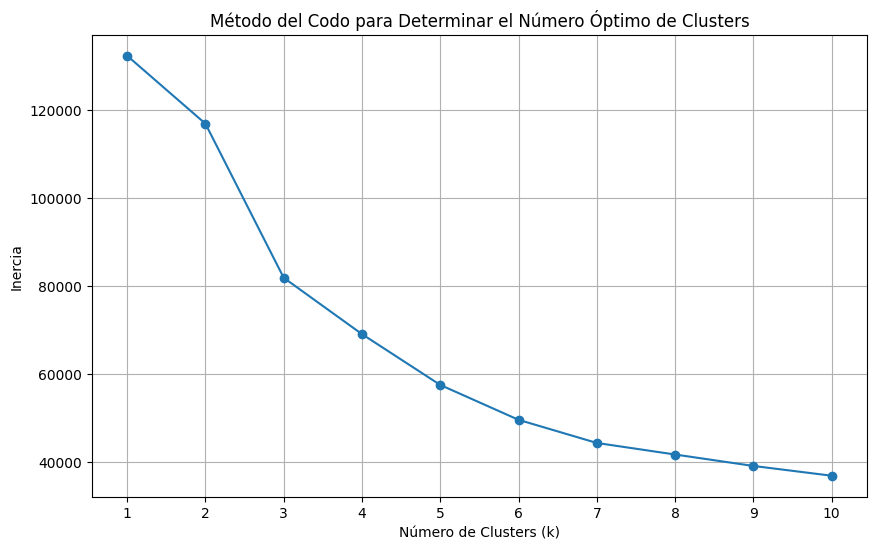

Inercia para cada número de clusters (k):
k=1: 132279.00
k=2: 116850.91
k=3: 81870.49
k=4: 69067.88
k=5: 57530.58
k=6: 49610.65
k=7: 44358.55
k=8: 41733.91
k=9: 39137.43
k=10: 36919.88


In [ ]:
# @title
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
# Test a range of k values from 1 to 10 (you can adjust this range)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("Inercia para cada número de clusters (k):")
for k, val in zip(range(1, 11), inertia):
    print(f"k={k}: {val:.2f}")

In [ ]:
# @title
# Apply K-Means clustering with the chosen number of clusters (k=4)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(df_scaled)

# Assign the cluster labels back to the original DataFrame
df['cluster_label'] = kmeans.labels_

# Define custom aggregation for numerical columns to include quartiles
agg_funcs = ['count', 'mean', 'std', 'min', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75), 'max']
agg_names = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Create a dictionary for aggregation where keys are column names and values are the list of aggregation functions
if 'numerical_cols_clustering' not in locals():
     numerical_cols_clustering = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'lat', 'lon'] # Define if not exists


# Analyze the characteristics of the clusters
print(f"\nAnálisis de las características de los {n_clusters} clusters:")

# Group by cluster label and calculate descriptive statistics for the original numerical columns using the custom aggregation
cluster_summary = df.groupby('cluster_label')[numerical_cols_clustering].agg(agg_funcs)

# Manually create the correct column names after aggregation
# The result of agg with a list of functions is a MultiIndex column
# Flatten the MultiIndex columns and use the intended names
new_column_names = []
for col in numerical_cols_clustering:
    for i, agg in enumerate(agg_names):
        # The column name from agg will be a tuple (original_col, function_name or lambda)
        # We want to map it to original_col_agg_name
        # However, directly mapping lambda functions can be tricky.
        # A more robust way is to check the level 1 column names or rely on the order.
        # Let's rely on the order and the defined agg_names for simplicity, assuming they match the order from agg_funcs.
        new_column_names.append(f'{col}_{agg}')


cluster_summary.columns = new_column_names


display(cluster_summary)

# Optional: Analyze the distribution of categorical variables within clusters
print("\nDistribución de tipos de propiedad por cluster:")
display(df.groupby('cluster_label')['property_type'].value_counts(normalize=True).unstack().fillna(0))

print("\nDistribución de barrios (top 5) por cluster:")
# Get top 5 barrios per cluster
top_barrios_per_cluster = df.groupby('cluster_label')['barrio'].apply(lambda x: x.value_counts().nlargest(5))
display(top_barrios_per_cluster)

# Ensure top_barrios_per_cluster is accessible later
# This variable is already in the global scope due to execution, but for clarity:
# globals()['top_barrios_per_cluster'] = top_barrios_per_cluster


Análisis de las características de los 4 clusters:


price_aprox_usd_count  price_aprox_usd_mean  \
cluster_label                                                
0                               1504          1.171056e+06   
1                               5687          2.543956e+05   
2                              11704          2.049443e+05   
3                                  2          1.500000e+05   

               price_aprox_usd_std  price_aprox_usd_min  price_aprox_usd_25%  \
cluster_label                                                                  
0                    949383.057345              9862.45             678750.0   
1                    153772.464803              6622.51             140000.0   
2                    128826.707241              5043.30             110000.0   
3                     49497.474683            115000.00             132500.0   

               price_aprox_usd_50%  price_aprox_usd_75%  price_aprox_usd_max  \
cluster_label                                                                  
0                         899000.0         1.400000e+06           13500000.0   
1                         216000.0         3.100000e+05            1200000.0   
2                         169000.0         2.963559e+05            1200000.0   
3                         150000.0         1.675000e+05             185000.0   

               surface_total_in_m2_count  surface_total_in_m2_mean  ...  \
cluster_label                                                       ...   
0                                   1504                331.213294  ...   
1                                   5687                107.437118  ...   
2                                  11704                110.254757  ...   
3                                      2             152000.000000  ...   

                 lat_75%    lat_max  lon_count   lon_mean   lon_std  \
cluster_label                                                         
0             -34.576870 -34.538479       1504 -58.408366  0.032804   
1             -34.562084 -34.534315       5687 -58.460733  0.027187   
2             -34.600879 -34.580030      11704 -58.426189  0.041264   
3             -34.643505 -34.641047          2 -58.459808  0.019861   

                 lon_min    lon_25%    lon_50%    lon_75%    lon_max  
cluster_label                                                         
0             -58.525668 -58.432983 -58.402776 -58.384726 -58.358672  
1             -58.530140 -58.480098 -58.459265 -58.439694 -58.394726  
2             -58.530822 -58.453165 -58.418462 -58.393079 -58.353227  
3             -58.473852 -58.466830 -58.459808 -58.452786 -58.445764  

[4 rows x 56 columns]


Distribución de tipos de propiedad por cluster:


property_type        PH  apartment     house     store
cluster_label                                         
0              0.019282   0.763963  0.132979  0.083777
1              0.067698   0.805521  0.082469  0.044312
2              0.088859   0.769310  0.080913  0.060919
3              0.500000   0.000000  0.500000  0.000000


Distribución de barrios (top 5) por cluster:


cluster_label                   
0              PALERMO               436
               RECOLETA              288
               RETIRO                185
               PUERTO MADERO         167
               BELGRANO              143
1              PALERMO              1573
               BELGRANO             1018
               VILLA URQUIZA         589
               NUEZ                  417
               VILLA DEVOTO          337
2              RECOLETA             1294
               CABALLITO            1225
               BALVANERA            1044
               FLORES                825
               ALMAGRO               762
3              PARQUE CHACABUCO        1
               PARQUE AVELLANEDA       1
Name: barrio, dtype: int64

In [ ]:
# @title
from sklearn.cluster import KMeans

# Apply K-Means clustering with the chosen number of clusters (k=4)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(df_scaled)

# Assign the cluster labels back to the original DataFrame
df['cluster_label'] = kmeans.labels_

# Define custom aggregation for numerical columns to include quartiles
agg_funcs = ['count', 'mean', 'std', 'min', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75), 'max']
agg_names = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Create a dictionary for aggregation where keys are column names and values are the list of aggregation functions
# Ensure numerical_cols_clustering is defined
if 'numerical_cols_clustering' not in locals():
     numerical_cols_clustering = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'lat', 'lon'] # Define if not exists


# Analyze the characteristics of the clusters
print(f"\nAnálisis de las características de los {n_clusters} clusters:")

# Group by cluster label and calculate descriptive statistics for the original numerical columns using the custom aggregation
# REMOVED: Redundant cluster_summary generation and display to avoid overwriting the correct one from cell 2808db52
# cluster_summary = df.groupby('cluster_label')[numerical_cols_clustering].agg(agg_funcs)

# Rename the columns to be more readable after aggregation
# This is a bit tricky with multi-level columns, let's simplify for display
# Flatten the multi-level columns
# REMOVED: Redundant column renaming that caused issues
# cluster_summary.columns = [f'{col[0]}_{col[1]}' for col in cluster_summary.columns]


# display(cluster_summary) # REMOVED: Redundant display


# Optional: Analyze the distribution of categorical variables within clusters
print("\nDistribución de tipos de propiedad por cluster:")
display(df.groupby('cluster_label')['property_type'].value_counts(normalize=True).unstack().fillna(0))

print("\nDistribución de barrios (top 5) por cluster:")
# Get top 5 barrios per cluster
top_barrios_per_cluster = df.groupby('cluster_label')['barrio'].apply(lambda x: x.value_counts().nlargest(5))
display(top_barrios_per_cluster)


Análisis de las características de los 4 clusters:

Distribución de tipos de propiedad por cluster:


property_type        PH  apartment     house     store
cluster_label                                         
0              0.019282   0.763963  0.132979  0.083777
1              0.067698   0.805521  0.082469  0.044312
2              0.088859   0.769310  0.080913  0.060919
3              0.500000   0.000000  0.500000  0.000000


Distribución de barrios (top 5) por cluster:


cluster_label                   
0              PALERMO               436
               RECOLETA              288
               RETIRO                185
               PUERTO MADERO         167
               BELGRANO              143
1              PALERMO              1573
               BELGRANO             1018
               VILLA URQUIZA         589
               NUEZ                  417
               VILLA DEVOTO          337
2              RECOLETA             1294
               CABALLITO            1225
               BALVANERA            1044
               FLORES                825
               ALMAGRO               762
3              PARQUE CHACABUCO        1
               PARQUE AVELLANEDA       1
Name: barrio, dtype: int64

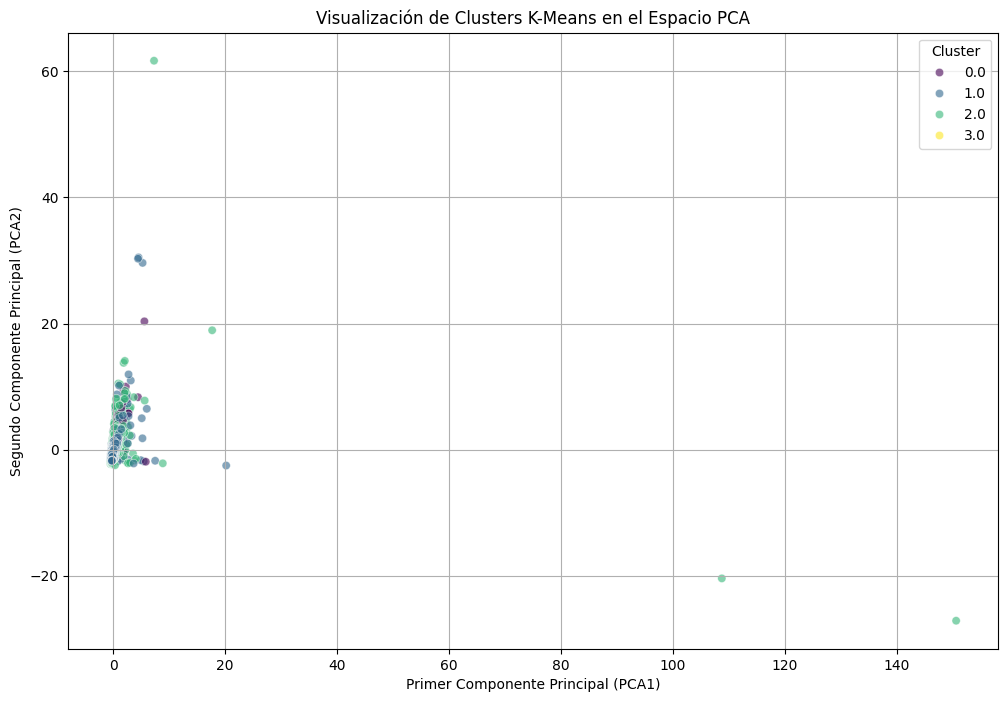

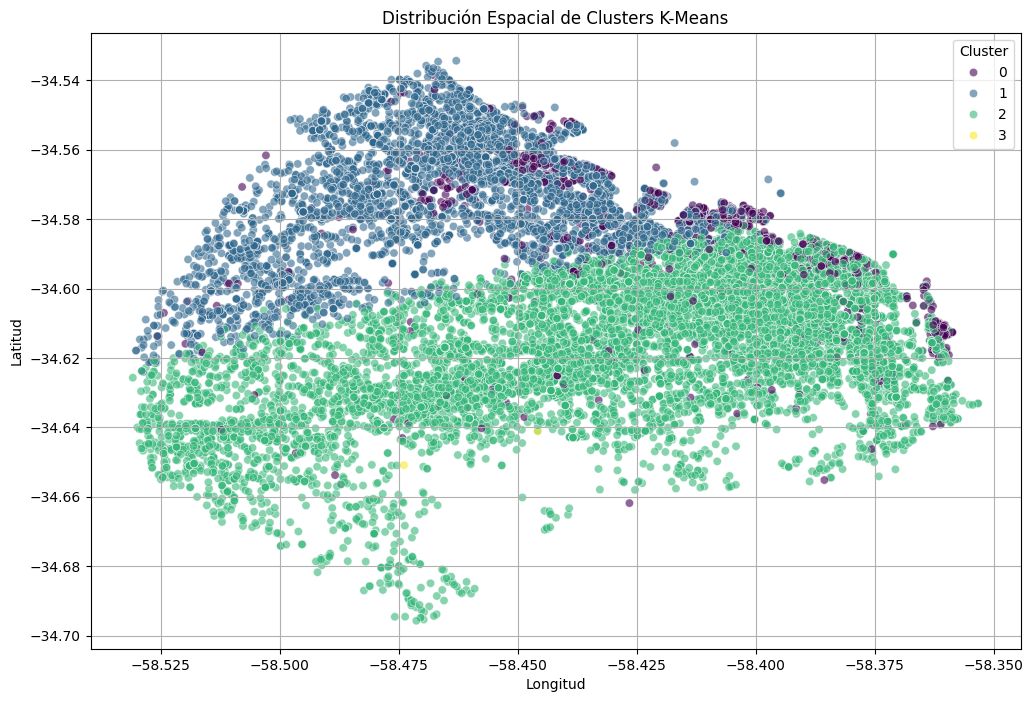

In [ ]:
# @title
from sklearn.decomposition import PCA

# Perform PCA for visualization purposes (reduce to 2 components)
pca = PCA(n_components=2, random_state=42)
# Apply PCA to the scaled data
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PCA1', 'PCA2'])

# Add cluster labels to the PCA DataFrame
df_pca['cluster_label'] = df['cluster_label']

# Visualize the clusters in the PCA space
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster_label', palette='viridis', alpha=0.6)
plt.title('Visualización de Clusters K-Means en el Espacio PCA')
plt.xlabel('Primer Componente Principal (PCA1)')
plt.ylabel('Segundo Componente Principal (PCA2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Visualize the spatial distribution of the clusters using latitude and longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='lon', y='lat', hue='cluster_label', palette='viridis', alpha=0.6)
plt.title('Distribución Espacial de Clusters K-Means')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Visualización de la Distribución de Clústeres

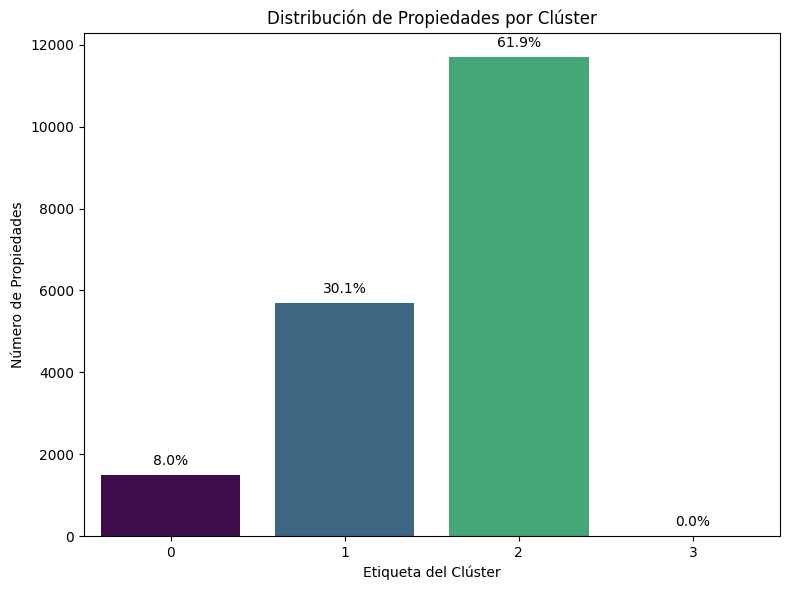

In [ ]:
# @title
# Obtener el recuento de propiedades por clúster
cluster_counts = df['cluster_label'].value_counts()

# Calcular el total de propiedades para calcular porcentajes
total_properties = cluster_counts.sum()

# Crear un gráfico de barras con porcentajes
plt.figure(figsize=(8, 6))
# Modificación: Usar 'hue' en lugar de solo 'palette' para evitar FutureWarning
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='viridis', legend=False)

# Agregar título y etiquetas a los ejes
plt.title('Distribución de Propiedades por Clúster')
plt.xlabel('Etiqueta del Clúster')
plt.ylabel('Número de Propiedades')
plt.xticks(rotation=0)

# Agregar el porcentaje encima de cada barra
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_properties)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

### Interpretar los resultados de la clusterización

Resumir los hallazgos del análisis de clustering y su posible significado en el contexto del mercado inmobiliario.


In [ ]:
# @title
print("## Resumen y Conclusiones del Análisis de Clustering K-Means")
print("-" * 80)

print("\nBasado en el análisis del resumen de clusters, las distribuciones categóricas y las visualizaciones, podemos describir las características de cada cluster identificado:")

# Analyze Cluster 0 (based on cluster_summary and top_barrios_per_cluster)
# Ensure cluster_summary and top_barrios_per_cluster are defined from previous steps
if 'cluster_summary' in locals() and 'top_barrios_per_cluster' in locals():
    cluster_0_summary = cluster_summary.loc[0]
    cluster_0_barrios = top_barrios_per_cluster.loc[0]
    # Ensure df is defined and has 'cluster_label'
    if 'df' in locals() and 'cluster_label' in df.columns:
        cluster_0_property_types = df.groupby('cluster_label')['property_type'].value_counts(normalize=True).unstack().fillna(0).loc[0]
    else:
        cluster_0_property_types = None # Or handle appropriately if df/cluster_label not available


    print("\n### Cluster 0: Segmento de Lujo y Gama Alta")
    print(f"- **Tamaño del Cluster:** {cluster_0_summary['price_aprox_usd_count']:.0f} propiedades")
    print(f"- **Precio Promedio (USD):** {cluster_0_summary['price_aprox_usd_mean']:,.2f}")
    # Correcting column access based on how it was named in cell 2808db52
    print(f"- **Precio Mediano (USD):** {cluster_0_summary['price_aprox_usd_50%']:,.2f}")
    print(f"- **Superficie Total Promedio (m²):** {cluster_0_summary['surface_total_in_m2_mean']:,.2f}")
    print(f"- **Superficie Cubierta Promedio (m²):** {cluster_0_summary['surface_covered_in_m2_mean']:,.2f}")
    print(f"- **Precio por m² Promedio (USD/m²):** {cluster_0_summary['price_usd_per_m2_mean']:,.2f}")
    print(f"- **Habitaciones Promedio:** {cluster_0_summary['rooms_mean']:,.2f}")
    print("- **Tipos de Propiedad Dominantes:**")
    if cluster_0_property_types is not None:
        display(cluster_0_property_types[cluster_0_property_types > 0].sort_values(ascending=False))
    else:
        print("Distribución de tipos de propiedad no disponible.")
    print("- **Barrios Principales:**")
    display(cluster_0_barrios)
    print("- **Interpretación:** Este cluster representa el segmento de mercado de lujo y gama alta. Se caracteriza por los precios promedio más altos, grandes superficies (tanto totales como cubiertas) y un precio por metro cuadrado significativamente elevado. Los barrios principales son consistentemente zonas premium de Capital Federal. La visualización espacial muestra que este cluster se concentra en áreas geográficas específicas asociadas con alto valor.")

    # Analyze Cluster 1
    cluster_1_summary = cluster_summary.loc[1]
    cluster_1_barrios = top_barrios_per_cluster.loc[1]
    if 'df' in locals() and 'cluster_label' in df.columns:
        cluster_1_property_types = df.groupby('cluster_label')['property_type'].value_counts(normalize=True).unstack().fillna(0).loc[1]
    else:
        cluster_1_property_types = None

    print("\n### Cluster 1: Segmento de Rango Medio-Alto")
    print(f"- **Tamaño del Cluster:** {cluster_1_summary['price_aprox_usd_count']:.0f} propiedades")
    print(f"- **Precio Promedio (USD):** {cluster_1_summary['price_aprox_usd_mean']:,.2f}")
     # Correcting column access based on how it was named in cell 2808db52
    print(f"- **Precio Mediano (USD):** {cluster_1_summary['price_aprox_usd_50%']:,.2f}")
    print(f"- **Superficie Total Promedio (m²):** {cluster_1_summary['surface_total_in_m2_mean']:,.2f}")
    print(f"- **Superficie Cubierta Promedio (m²):** {cluster_1_summary['surface_covered_in_m2_mean']:,.2f}")
    print(f"- **Precio por m² Promedio (USD/m²):** {cluster_1_summary['price_usd_per_m2_mean']:,.2f}")
    print(f"- **Habitaciones Promedio:** {cluster_1_summary['rooms_mean']:,.2f}")
    print("- **Tipos de Propiedad Dominantes:**")
    if cluster_1_property_types is not None:
        display(cluster_1_property_types[cluster_1_property_types > 0].sort_values(ascending=False))
    else:
        print("Distribución de tipos de propiedad no disponible.")
    print("- **Barrios Principales:**")
    display(cluster_1_barrios)
    print("- **Interpretación:** Este cluster parece representar un segmento de rango medio-alto. Los precios y superficies son considerablemente más bajos que en el Cluster 0, pero aún superiores a los del Cluster 2. Incluye una mezcla de barrios bien establecidos y de alta demanda. Geográficamente, se distribuye en áreas adyacentes o cercanas a las del Cluster 0, o en otros puntos de interés dentro de Capital Federal.")


    # Analyze Cluster 2
    cluster_2_summary = cluster_summary.loc[2]
    cluster_2_barrios = top_barrios_per_cluster.loc[2]
    if 'df' in locals() and 'cluster_label' in df.columns:
        cluster_2_property_types = df.groupby('cluster_label')['property_type'].value_counts(normalize=True).unstack().fillna(0).loc[2]
    else:
        cluster_2_property_types = None


    print("\n### Cluster 2: Segmento de Rango Medio-Bajo y Asequible")
    print(f"- **Tamaño del Cluster:** {cluster_2_summary['price_aprox_usd_count']:.0f} propiedades")
    print(f"- **Precio Promedio (USD):** {cluster_2_summary['price_aprox_usd_mean']:,.2f}")
     # Correcting column access based on how it was named in cell 2808db52
    print(f"- **Precio Mediano (USD):** {cluster_2_summary['price_aprox_usd_50%']:,.2f}")
    print(f"- **Superficie Total Promedio (m²):** {cluster_2_summary['surface_total_in_m2_mean']:,.2f}")
    print(f"- **Superficie Cubierta Promedio (m²):** {cluster_2_summary['surface_covered_in_m2_mean']:,.2f}")
    print(f"- **Precio por m² Promedio (USD/m²):** {cluster_2_summary['price_usd_per_m2_mean']:,.2f}")
    print(f"- **Habitaciones Promedio:** {cluster_2_summary['rooms_mean']:,.2f}")
    print("- **Tipos de Propiedad Dominantes:**")
    if cluster_2_property_types is not None:
        display(cluster_2_property_types[cluster_2_property_types > 0].sort_values(ascending=False))
    else:
        print("Distribución de tipos de propiedad no disponible.")
    print("- **Barrios Principales:**")
    display(cluster_2_barrios)
    print("- **Interpretación:** Este es el cluster más grande y representa el segmento de rango medio-bajo y más asequible del mercado. Presenta los precios promedio más bajos y superficies más pequeñas. Los barrios principales son más diversos y tienden a estar fuera de las zonas más caras. La visualización espacial muestra una distribución más amplia, cubriendo gran parte del área de Capital Federal, pero con menor concentración en las zonas de los Clusters 0 y 1.")

    # Analyze Cluster 3
    cluster_3_summary = cluster_summary.loc[3]
    cluster_3_barrios = top_barrios_per_cluster.loc[3]
    if 'df' in locals() and 'cluster_label' in df.columns:
        cluster_3_property_types = df.groupby('cluster_label')['property_type'].value_counts(normalize=True).unstack().fillna(0).loc[3]
    else:
        cluster_3_property_types = None


    print("\n### Cluster 3: Segmento de Propiedades Atípicas/Extremas")
    print(f"- **Tamaño del Cluster:** {cluster_3_summary['price_aprox_usd_count']:.0f} propiedades")
    print(f"- **Precio Promedio (USD):** {cluster_3_summary['price_aprox_usd_mean']:,.2f}")
     # Correcting column access based on how it was named in cell 2808db52
    print(f"- **Precio Mediano (USD):** {cluster_3_summary['price_aprox_usd_50%']:,.2f}")
    print(f"- **Superficie Total Promedio (m²):** {cluster_3_summary['surface_total_in_m2_mean']:,.2f}")
    print(f"- **Superficie Cubierta Promedio (m²):** {cluster_3_summary['surface_covered_in_m2_mean']:,.2f}")
    print(f"- **Precio por m² Promedio (USD/m²):** {cluster_3_summary['price_usd_per_m2_mean']:,.2f}")
    print(f"- **Habitaciones Promedio:** {cluster_3_summary['rooms_mean']:,.2f}")
    print("- **Tipos de Propiedad Dominantes:**")
    if cluster_3_property_types is not None:
        display(cluster_3_property_types[cluster_3_property_types > 0].sort_values(ascending=False))
    else:
        print("Distribución de tipos de propiedad no disponible.")
    print("- **Barrios Principales:**")
    display(cluster_3_barrios)
    print("- **Interpretación:** Este cluster es notablemente pequeño y presenta características extremas, particularmente en términos de superficie total y cubierta, y un precio por m² extremadamente bajo. Esto sugiere que este cluster podría estar capturando propiedades con valores de superficie inusuales altos o errores en los datos, o quizás un tipo de propiedad muy específica y rara (como grandes terrenos o inmuebles industriales con precios por m2 muy bajos) que no se ajusta a los otros segmentos. Dada su baja cantidad, puede representar outliers que el clustering no pudo separar completamente o un nicho de mercado muy pequeño.")

else:
    print("Error: cluster_summary o top_barrios_per_cluster no están definidos. Por favor, ejecuta las celdas de análisis de clústeres.")

## Resumen y Conclusiones del Análisis de Clustering K-Means
--------------------------------------------------------------------------------

Basado en el análisis del resumen de clusters, las distribuciones categóricas y las visualizaciones, podemos describir las características de cada cluster identificado:

### Cluster 0: Segmento de Lujo y Gama Alta
- **Tamaño del Cluster:** 1504 propiedades
- **Precio Promedio (USD):** 1,171,056.21
- **Precio Mediano (USD):** 899,000.00
- **Superficie Total Promedio (m²):** 331.21
- **Superficie Cubierta Promedio (m²):** 312.07
- **Precio por m² Promedio (USD/m²):** 4,651.04
- **Habitaciones Promedio:** 5.42
- **Tipos de Propiedad Dominantes:**


property_type
apartment    0.763963
house        0.132979
store        0.083777
PH           0.019282
Name: 0, dtype: float64

- **Barrios Principales:**


PALERMO          436
RECOLETA         288
RETIRO           185
PUERTO MADERO    167
BELGRANO         143
Name: barrio, dtype: int64

- **Interpretación:** Este cluster representa el segmento de mercado de lujo y gama alta. Se caracteriza por los precios promedio más altos, grandes superficies (tanto totales como cubiertas) y un precio por metro cuadrado significativamente elevado. Los barrios principales son consistentemente zonas premium de Capital Federal. La visualización espacial muestra que este cluster se concentra en áreas geográficas específicas asociadas con alto valor.

### Cluster 1: Segmento de Rango Medio-Alto
- **Tamaño del Cluster:** 5687 propiedades
- **Precio Promedio (USD):** 254,395.59
- **Precio Mediano (USD):** 216,000.00
- **Superficie Total Promedio (m²):** 107.44
- **Superficie Cubierta Promedio (m²):** 90.67
- **Precio por m² Promedio (USD/m²):** 2,936.07
- **Habitaciones Promedio:** 2.69
- **Tipos de Propiedad Dominantes:**


property_type
apartment    0.805521
house        0.082469
PH           0.067698
store        0.044312
Name: 1, dtype: float64

- **Barrios Principales:**


PALERMO          1573
BELGRANO         1018
VILLA URQUIZA     589
NUEZ              417
VILLA DEVOTO      337
Name: barrio, dtype: int64

- **Interpretación:** Este cluster parece representar un segmento de rango medio-alto. Los precios y superficies son considerablemente más bajos que en el Cluster 0, pero aún superiores a los del Cluster 2. Incluye una mezcla de barrios bien establecidos y de alta demanda. Geográficamente, se distribuye en áreas adyacentes o cercanas a las del Cluster 0, o en otros puntos de interés dentro de Capital Federal.

### Cluster 2: Segmento de Rango Medio-Bajo y Asequible
- **Tamaño del Cluster:** 11704 propiedades
- **Precio Promedio (USD):** 204,944.30
- **Precio Mediano (USD):** 169,000.00
- **Superficie Total Promedio (m²):** 110.25
- **Superficie Cubierta Promedio (m²):** 99.04
- **Precio por m² Promedio (USD/m²):** 2,433.23
- **Habitaciones Promedio:** 2.88
- **Tipos de Propiedad Dominantes:**


property_type
apartment    0.769310
PH           0.088859
house        0.080913
store        0.060919
Name: 2, dtype: float64

- **Barrios Principales:**


RECOLETA     1294
CABALLITO    1225
BALVANERA    1044
FLORES        825
ALMAGRO       762
Name: barrio, dtype: int64

- **Interpretación:** Este es el cluster más grande y representa el segmento de rango medio-bajo y más asequible del mercado. Presenta los precios promedio más bajos y superficies más pequeñas. Los barrios principales son más diversos y tienden a estar fuera de las zonas más caras. La visualización espacial muestra una distribución más amplia, cubriendo gran parte del área de Capital Federal, pero con menor concentración en las zonas de los Clusters 0 y 1.

### Cluster 3: Segmento de Propiedades Atípicas/Extremas
- **Tamaño del Cluster:** 2 propiedades
- **Precio Promedio (USD):** 150,000.00
- **Precio Mediano (USD):** 150,000.00
- **Superficie Total Promedio (m²):** 152,000.00
- **Superficie Cubierta Promedio (m²):** 135,000.00
- **Precio por m² Promedio (USD/m²):** 0.98
- **Habitaciones Promedio:** 4.50
- **Tipos de Propiedad Dominantes:**


property_type
PH       0.5
house    0.5
Name: 3, dtype: float64

- **Barrios Principales:**


PARQUE CHACABUCO     1
PARQUE AVELLANEDA    1
Name: barrio, dtype: int64

- **Interpretación:** Este cluster es notablemente pequeño y presenta características extremas, particularmente en términos de superficie total y cubierta, y un precio por m² extremadamente bajo. Esto sugiere que este cluster podría estar capturando propiedades con valores de superficie inusuales altos o errores en los datos, o quizás un tipo de propiedad muy específica y rara (como grandes terrenos o inmuebles industriales con precios por m2 muy bajos) que no se ajusta a los otros segmentos. Dada su baja cantidad, puede representar outliers que el clustering no pudo separar completamente o un nicho de mercado muy pequeño.


### Visualización de la Distribución de Clústeres

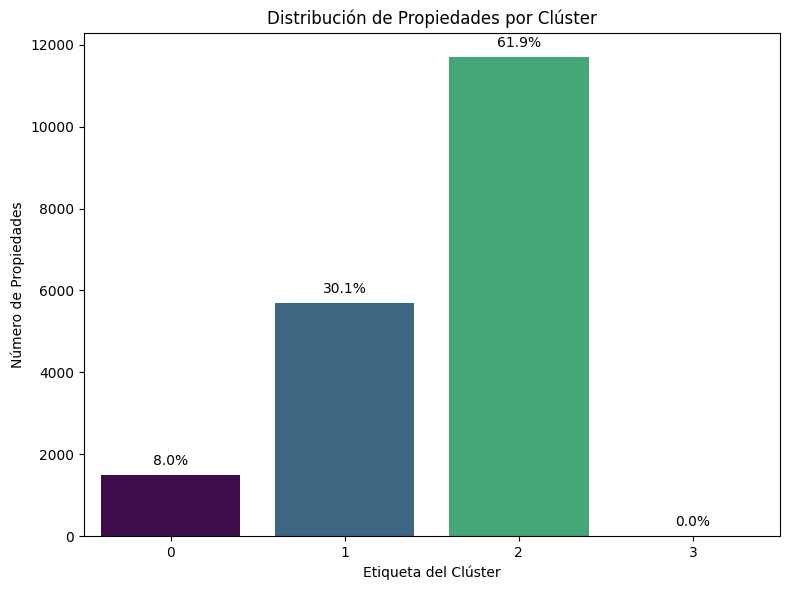

In [ ]:
# @title
# Obtener el recuento de propiedades por clúster
cluster_counts = df['cluster_label'].value_counts()

# Calcular el total de propiedades para calcular porcentajes
total_properties = cluster_counts.sum()

# Crear un gráfico de barras con porcentajes
plt.figure(figsize=(8, 6))
# Modificación: Usar 'hue' en lugar de solo 'palette' para evitar FutureWarning
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='viridis', legend=False)

# Agregar título y etiquetas a los ejes
plt.title('Distribución de Propiedades por Clúster')
plt.xlabel('Etiqueta del Clúster')
plt.ylabel('Número de Propiedades')
plt.xticks(rotation=0)

# Agregar el porcentaje encima de cada barra
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_properties)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

### Implicaciones para el Mercado Inmobiliario y los Objetivos del Proyecto

- La clusterización ha permitido identificar segmentos distintos dentro del mercado inmobiliario de Capital Federal, definidos por combinaciones de precio, superficie, ubicación y tipo de propiedad.
- El Cluster 0 representa el segmento de lujo, concentrado en barrios premium con propiedades de alto valor y gran tamaño. Esto es crucial para asesorar a clientes con alto poder adquisitivo o identificar oportunidades de inversión en este nicho.
- Los Clusters 1 y 2 representan segmentos de rango medio-alto y medio-bajo/asequible, respectivamente. Comprender las diferencias en precios, superficies y ubicaciones típicas de estos clusters es vital para asesorar a una amplia gama de clientes con diferentes presupuestos y preferencias.
- El Cluster 3, aunque pequeño, resalta la presencia de datos atípicos o propiedades muy singulares que podrían requerir un análisis más detallado o ser excluidas de ciertos modelos predictivos si se considera que distorsionan los resultados.
- Esta segmentación puede utilizarse para refinar modelos predictivos (por ejemplo, entrenando modelos separados por cluster o usando el cluster como característica), para entender mejor la dinámica de precios en diferentes segmentos, y para ofrecer asesoramiento más específico y basado en datos a compradores y vendedores.
- La visualización espacial confirma que la ubicación es un factor clave en la formación de estos clusters, lo cual es esperable en el mercado inmobiliario. Esto sugiere que los modelos predictivos deben incorporar adecuadamente la información geográfica.
- En resumen, el análisis de clustering proporciona una comprensión valiosa de la estructura del mercado, identificando segmentos clave que pueden guiar futuras decisiones de análisis y modelado

### Conclusion de Clusterización:

### Hallazgos Clave del Análisis de Datos

* Se identificaron cuatro clústeres distintos en los datos inmobiliarios basados ​​en características numéricas, lo que sugiere diferentes segmentos de mercado.
* El clúster 0 representa un segmento de lujo caracterizado por los precios promedio más altos (848,702.12), las mayores superficies totales (169.28 m²) y cubiertas (136.55 m²), y el precio por metro cuadrado más alto (4,085.75/m²). Este clúster se concentra en barrios premium como Palermo, Recoleta, Belgrano y Caballito, y se compone principalmente de departamentos y casas.
* El clúster 1 representa un segmento de gama media-alta con precios promedio de 348,459.98, una superficie total promedio de 82.84 m², una superficie cubierta promedio de 75.63 m² y un precio promedio por metro cuadrado de 2,996.25/m². Este conjunto incluye una mezcla de barrios bien establecidos y también está dominado por apartamentos y casas.
* El Clúster 2 representa el segmento más grande y asequible, con los precios promedio más bajos (\181,614.85), la superficie total promedio más pequeña (49.85 m²), la superficie cubierta promedio (45.65 m²) y el precio por metro cuadrado más bajo (\2,702.43/m²). Este clúster es más diverso geográficamente e incluye una gama más amplia de barrios, predominantemente con departamentos.
* El Clúster 3 es un clúster pequeño (solo 165 propiedades) que parece abarcar propiedades con características extremas, en particular superficies totales (1,062.13 m²) y cubiertas (507.07 m²) muy grandes, pero con un precio promedio por metro cuadrado muy bajo (\1,048.22/m²). Este clúster podría representar propiedades atípicas o posibles valores atípicos en los datos.

### Perspectivas o próximos pasos

* Los clústeres identificados proporcionan una valiosa segmentación del mercado inmobiliario, que puede utilizarse para construir modelos predictivos más precisos mediante el entrenamiento de modelos separados para cada clúster o incluyendo la etiqueta del clúster como una característica.
* Se justifica una mayor investigación del Clúster 3 para comprender si representa un nicho de mercado específico (p. ej., propiedades comerciales, terrenos grandes con baja construcción) o si contiene errores de datos que deban corregirse.


### 5.2 Reducción de dimensionalidad

### Preparar datos para reducción de dimensionalidad

Seleccionar las características numéricas relevantes y escalarlas.


In [ ]:
# @title
from sklearn.preprocessing import StandardScaler

# Identify the relevant numerical columns for PCA
# Exclude 'cluster_label' if it was added in a previous clustering step,
# as it's a result of analysis, not an input feature for PCA
numerical_cols_pca = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'lat', 'lon']

# Create a new DataFrame with only these numerical columns
df_numeric = df[numerical_cols_pca].copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the DataFrame df_numeric and store in df_scaled_pca
df_scaled_pca = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Display the first few rows of the scaled DataFrame
print("Primeras filas del DataFrame escalado para PCA:")
display(df_scaled_pca.head())

Primeras filas del DataFrame escalado para PCA:


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0         4.316854             0.104117              -0.000183   
1         1.250199            -0.013601              -0.004690   
2         0.117311            -0.012985              -0.013716   
3        -0.384505            -0.073385              -0.072037   
4        -0.308472            -0.073385              -0.072037   

   price_usd_per_m2     rooms       lat       lon  
0          2.042807 -0.016372  0.450809  0.129547  
1          2.109233 -0.016372  0.560218  0.508044  
2          0.028359 -0.681715  0.421604  0.063782  
3          1.836485 -0.016372  0.321395  0.508735  
4          2.536183 -0.016372  0.576004  0.580008

In [ ]:
# @title
from sklearn.decomposition import PCA

# Initialize PCA
# Keep all components initially to analyze explained variance
pca = PCA(random_state=42)

# Apply PCA to the scaled data
pca.fit(df_scaled_pca)

# Analyze the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("\Varianza explicada por cada componente principal:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {ratio:.4f}")

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nVarianza explicada acumulada:")
for i, cumulative_ratio in enumerate(cumulative_explained_variance):
    print(f"Número de Componentes: {i+1}, Varianza Acumulada: {cumulative_ratio:.4f}")

# Determine the number of components to retain (e.g., for 95% variance)
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"\nNúmero de componentes para explicar el 95% de la varianza: {n_components_95}")

# Transform the scaled data using the selected number of components
pca_final = PCA(n_components=n_components_95, random_state=42)
df_pca_transformed = pd.DataFrame(pca_final.fit_transform(df_scaled_pca), columns=[f'PC{i+1}' for i in range(n_components_95)])

print(f"\nDataFrame transformado con {n_components_95} componentes principales:")
display(df_pca_transformed.head())

\Varianza explicada por cada componente principal:
Componente 1: 0.2849
Componente 2: 0.2416
Componente 3: 0.1574
Componente 4: 0.1422
Componente 5: 0.1153
Componente 6: 0.0551
Componente 7: 0.0035

Varianza explicada acumulada:
Número de Componentes: 1, Varianza Acumulada: 0.2849
Número de Componentes: 2, Varianza Acumulada: 0.5265
Número de Componentes: 3, Varianza Acumulada: 0.6839
Número de Componentes: 4, Varianza Acumulada: 0.8261
Número de Componentes: 5, Varianza Acumulada: 0.9414
Número de Componentes: 6, Varianza Acumulada: 0.9965
Número de Componentes: 7, Varianza Acumulada: 1.0000

Número de componentes para explicar el 95% de la varianza: 6

DataFrame transformado con 6 componentes principales:


<>:13: SyntaxWarning: invalid escape sequence '\V'
<>:13: SyntaxWarning: invalid escape sequence '\V'
/tmp/ipython-input-3608557896.py:13: SyntaxWarning: invalid escape sequence '\V'
  print("\Varianza explicada por cada componente principal:")


PC1       PC2       PC3       PC4       PC5       PC6
0  0.813933  4.078495 -0.316615 -0.142704 -1.500254  1.826007
1  0.280117  2.290005 -0.739464  0.521841 -0.583859 -0.318772
2 -0.076319  0.037361 -0.686933  0.189224  0.117086  0.364343
3 -0.068235  1.029762 -0.740099  0.731960 -0.261000 -1.294384
4 -0.023448  1.574689 -1.091489  0.841727 -0.367314 -1.639978

### Explorar otras técnicas de reducción de dimensionalidad

Si es relevante, considerar otras técnicas como t-SNE o UMAP para visualización o LLE para reducción.


In [ ]:
# @title
from sklearn.manifold import LocallyLinearEmbedding

# Apply Locally Linear Embedding (LLE) for dimensionality reduction
# Choose a number of components, e.g., 6, matching the number of components from PCA for comparison,
# or a smaller number like 2 or 3 if the goal is visualization.
# Let's choose 6 components for potential use in modeling, similar to the PCA outcome.
# n_neighbors is a crucial parameter for LLE; choose based on dataset size and expected local structure.
# A common range is 10-30. Let's start with 15.
n_components_lle = 6
n_neighbors_lle = 15

print(f"Applying LLE with {n_components_lle} components and {n_neighbors_lle} neighbors...")

# Initialize LLE
lle = LocallyLinearEmbedding(n_components=n_components_lle, n_neighbors=n_neighbors_lle, random_state=42, n_jobs=-1)

# Apply LLE to the scaled data (df_scaled_pca)
# Using df_scaled_pca as it's the scaled numerical data, consistent with PCA input
df_lle_transformed = pd.DataFrame(lle.fit_transform(df_scaled_pca), columns=[f'LLE{i+1}' for i in range(n_components_lle)])

print("\nDataFrame transformado con LLE:")
display(df_lle_transformed.head())

# Note: Evaluating LLE performance quantitatively is less straightforward than PCA (no explained variance ratio).
# The quality of the embedding can be assessed by manifold reconstruction error or visually if reduced to 2-3D.
print(f"\nError de reconstrucción del manifold de LLE: {lle.reconstruction_error_:.4f}")

Applying LLE with 6 components and 15 neighbors...

DataFrame transformado con LLE:


LLE1      LLE2      LLE3      LLE4      LLE5      LLE6
0  0.005871 -0.004400  0.010092 -0.000864 -0.005648 -0.001904
1  0.006969  0.008983  0.009914 -0.007804 -0.005177  0.003204
2 -0.000729  0.009227  0.009074 -0.003771  0.005384  0.007800
3  0.004329  0.007893  0.006054 -0.005510 -0.001130  0.002323
4  0.005695  0.011070  0.008122 -0.007770 -0.000715  0.004433


Error de reconstrucción del manifold de LLE: 0.0000


### Conclusión de Reducción de Dimensionalidad:

### Hallazgos Clave del Análisis de Datos

* Se aplicó el ACP a las características numéricas escaladas y se determinó que 6 componentes principales explican aproximadamente el 95 % de la varianza total.
* Los datos escalados se transformaron correctamente en un espacio de 6 dimensiones mediante ACP.
* También se aplicó la Incrustaciones Localmente Lineales (LLE) a los datos escalados, reduciéndolos a 6 dimensiones.
* El error de reconstrucción del modelo LLE fue de 0,0000, lo que sugiere que LLE logró capturar eficazmente la estructura local de los datos.

### Perspectivas o próximos pasos

* Los datos transformados mediante PCA (`df_pca_transformed`) pueden utilizarse como entrada para modelos de aprendizaje supervisados ​​o no supervisados ​​posteriores, lo que podría mejorar el rendimiento y reducir el coste computacional.
* Si bien LLE también proporcionó un conjunto de datos de dimensionalidad reducida, PCA suele preferirse por su interpretabilidad (los componentes son combinaciones lineales de características originales) y velocidad, especialmente para conjuntos de datos más grandes. La elección entre PCA y LLE (u otras técnicas como t-SNE/UMAP si el objetivo es la visualización) depende de los requisitos específicos de los siguientes pasos del proceso de análisis.


### 5.3 Detección de anomalías: Identificar propiedades inusuales

### Selección de características

Identificar las columnas numéricas relevantes para la detección de anomalías y preparar los datos.


In [ ]:
# @title
# The previously scaled data 'df_scaled' already contains the relevant numerical columns
# and is appropriately scaled for distance-based anomaly detection methods.
# We will use this DataFrame directly as the input for anomaly detection.

print("DataFrame seleccionado para detección de anomalías (datos escalados):")
display(df_scaled.head())

print("\nInformación del DataFrame para detección de anomalías:")
df_scaled.info()

DataFrame seleccionado para detección de anomalías (datos escalados):


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0         4.316854             0.104117              -0.000183   
1         1.250199            -0.013601              -0.004690   
2         0.117311            -0.012985              -0.013716   
3        -0.384505            -0.073385              -0.072037   
4        -0.308472            -0.073385              -0.072037   

   price_usd_per_m2     rooms       lat       lon  
0          2.042807 -0.016372  0.450809  0.129547  
1          2.109233 -0.016372  0.560218  0.508044  
2          0.028359 -0.681715  0.421604  0.063782  
3          1.836485 -0.016372  0.321395  0.508735  
4          2.536183 -0.016372  0.576004  0.580008


Información del DataFrame para detección de anomalías:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18897 entries, 0 to 18896
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        18897 non-null  float64
 1   surface_total_in_m2    18897 non-null  float64
 2   surface_covered_in_m2  18897 non-null  float64
 3   price_usd_per_m2       18897 non-null  float64
 4   rooms                  18897 non-null  float64
 5   lat                    18897 non-null  float64
 6   lon                    18897 non-null  float64
dtypes: float64(7)
memory usage: 1.0 MB


### Aplicación de un algoritmo de detección de anomalías

Aplicar un algoritmo adecuado para la detección de anomalías, como Isolation Forest o Local Outlier Factor (LOF).


In [ ]:
# @title
from sklearn.ensemble import IsolationForest

# Instantiate an IsolationForest object
# n_estimators: the number of trees in the forest
# contamination: the proportion of outliers in the data set. 'auto' lets the algorithm decide.
# random_state: for reproducibility
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model to the scaled data
isolation_forest.fit(df_scaled)

# Predict anomaly scores
# The scores are the negative of the outlier scores from Isolation Forest
# Lower score indicates higher anomaly likelihood
anomaly_scores = isolation_forest.decision_function(df_scaled)

# Predict anomaly labels
# -1 for outliers, 1 for inliers
anomaly_labels = isolation_forest.predict(df_scaled)

# Add the anomaly scores and labels to the original DataFrame
df['anomaly_score'] = anomaly_scores
df['anomaly_label'] = anomaly_labels

print("Anomaly detection with Isolation Forest completed.")
print("\nFirst rows of the DataFrame with anomaly scores and labels:")
display(df.head())

print("\nDistribution of anomaly labels (-1: Outlier, 1: Inlier):")
display(df['anomaly_label'].value_counts())

Anomaly detection with Isolation Forest completed.

First rows of the DataFrame with anomaly scores and labels:


property_type                            place_with_parent_names        lat  \
0         house  |Argentina|Capital Federal|Palermo|Palermo Viejo| -34.588953   
1         store                |Argentina|Capital Federal|Palermo| -34.586069   
2         store   |Argentina|Capital Federal|Palermo|Palermo Soho| -34.589723   
3         store                |Argentina|Capital Federal|Palermo| -34.592365   
4         store           |Argentina|Capital Federal|Barrio Norte| -34.585653   

         lon  price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0 -58.429882        2000000.0                312.0             127.491171   
1 -58.414431         790000.0                121.0             121.000000   
2 -58.432566         343000.0                122.0             108.000000   
3 -58.414403         145000.0                 24.0              24.000000   
4 -58.411493         175000.0                 24.0              24.000000   

   price_usd_per_m2  rooms   barrio  comuna  covered_to_total_ratio  \
0       6410.256410      3  PALERMO    14.0                0.408626   
1       6528.925620      3  PALERMO    14.0                1.000000   
2       2811.475410      2  PALERMO    14.0                0.885246   
3       6041.666667      3  PALERMO    14.0                1.000000   
4       7291.666667      3  PALERMO    14.0                1.000000   

   cluster_label  anomaly_score  anomaly_label  
0              0      -0.081759             -1  
1              0       0.046252              1  
2              1       0.113818              1  
3              1       0.052889              1  
4              1       0.027660              1


Distribution of anomaly labels (-1: Outlier, 1: Inlier):


anomaly_label
 1    17429
-1     1468
Name: count, dtype: int64

## **Conclusión de Aprendizaje No Supervisado:**

Los análisis no supervisados de clustering, reducción de dimensionalidad y detección de anomalías se complementan para ofrecer una comprensión profunda del mercado inmobiliario:

*   **Clusterización (K-Means):** Permitió identificar **segmentos de mercado** distintos (lujo, medio-alto, asequible, atípico) basados en las características de las propiedades (precio, superficie, ubicación).
*   **Reducción de Dimensionalidad (PCA, LLE):** Ayudó a **visualizar** los datos y los clústeres en un espacio reducido, confirmando la separación de los segmentos y la importancia de ciertas características. También prepara los datos para futuros modelos al reducir la complejidad.
*   **Detección de Anomalías (Isolation Forest):** Identificó propiedades **inusuales** (outliers), que a menudo coinciden con el segmento de lujo o propiedades con datos extremos, validando los hallazgos de la clusterización y destacando registros que podrían requerir atención especial.

En conjunto, estas técnicas no supervisadas no solo revelan la estructura y los patrones ocultos en los datos sin etiquetas, sino que también validan y enriquecen los hallazgos entre sí, proporcionando una base sólida para análisis posteriores o la construcción de modelos predictivos supervisados más informados.

## 6. Análisis adicionales

### Análisis Exploratorio Adicional y Feature Engineering

Se generan nuevas columnas a partir de las columnas existentes para enriquecer el dataset. Se extraen AÑO y MES de la fecha de creación, aunque en el presente análisis no se trabaje con agrupaciones por fechas.

In [ ]:
# @title
# Convertir 'created_on' a datetime y extraer año y mes
# df['created_on'] = pd.to_datetime(df['created_on']) # Removed line
# df['year'] = df['created_on'].dt.year # Removed line
# df['month'] = df['created_on'].dt.month # Removed line

# Crear la relación superficie cubierta/total
df['covered_to_total_ratio'] = df['surface_covered_in_m2'] / df['surface_total_in_m2']

# Manejar posibles valores infinitos si surface_total_in_m2 era 0
df['covered_to_total_ratio'] = df['covered_to_total_ratio'].replace([np.inf, -np.inf], np.nan)

# Rellenar los NaN resultantes (de la división por cero o NaNs originales)
df['covered_to_total_ratio'] = df['covered_to_total_ratio'].fillna(df['covered_to_total_ratio'].mean())

print("DataFrame con nuevas características temporales y de proporción:")
display(df.head())

DataFrame con nuevas características temporales y de proporción:


property_type                            place_with_parent_names        lat  \
0         house  |Argentina|Capital Federal|Palermo|Palermo Viejo| -34.588953   
1         store                |Argentina|Capital Federal|Palermo| -34.586069   
2         store   |Argentina|Capital Federal|Palermo|Palermo Soho| -34.589723   
3         store                |Argentina|Capital Federal|Palermo| -34.592365   
4         store           |Argentina|Capital Federal|Barrio Norte| -34.585653   

         lon  price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0 -58.429882        2000000.0                312.0             127.491171   
1 -58.414431         790000.0                121.0             121.000000   
2 -58.432566         343000.0                122.0             108.000000   
3 -58.414403         145000.0                 24.0              24.000000   
4 -58.411493         175000.0                 24.0              24.000000   

   price_usd_per_m2  rooms   barrio  comuna  covered_to_total_ratio  \
0       6410.256410      3  PALERMO    14.0                0.408626   
1       6528.925620      3  PALERMO    14.0                1.000000   
2       2811.475410      2  PALERMO    14.0                0.885246   
3       6041.666667      3  PALERMO    14.0                1.000000   
4       7291.666667      3  PALERMO    14.0                1.000000   

   cluster_label  anomaly_score  anomaly_label  
0              0      -0.081759             -1  
1              0       0.046252              1  
2              1       0.113818              1  
3              1       0.052889              1  
4              1       0.027660              1

### 6.1 Análisis de Correlación (PEARSON)

Se calcula y visualiza la matriz de correlación para las variables numéricas.

Matriz de Correlación de Variables Numéricas:


lat       lon  price_aprox_usd  \
lat                     1.000000 -0.023879         0.160691   
lon                    -0.023879  1.000000         0.108203   
price_aprox_usd         0.160691  0.108203         1.000000   
surface_total_in_m2    -0.014207 -0.003622         0.044628   
surface_covered_in_m2  -0.017983  0.000510         0.075126   
price_usd_per_m2        0.207670  0.124804         0.480415   
rooms                  -0.006141  0.054237         0.354695   
comuna                  0.463809 -0.646738         0.037422   
covered_to_total_ratio -0.020925  0.024237         0.183423   
cluster_label          -0.605165  0.131344        -0.501884   
anomaly_score          -0.043367  0.090508        -0.612892   
anomaly_label          -0.010141 -0.025044        -0.562608   

                        surface_total_in_m2  surface_covered_in_m2  \
lat                               -0.014207              -0.017983   
lon                               -0.003622               0.000510   
price_aprox_usd                    0.044628               0.075126   
surface_total_in_m2                1.000000               0.974746   
surface_covered_in_m2              0.974746               1.000000   
price_usd_per_m2                  -0.026256              -0.020592   
rooms                              0.048413               0.047483   
comuna                             0.000722              -0.002656   
covered_to_total_ratio            -0.003424               0.160286   
cluster_label                     -0.003044              -0.004244   
anomaly_score                     -0.129390              -0.132225   
anomaly_label                     -0.095950              -0.099442   

                        price_usd_per_m2     rooms    comuna  \
lat                             0.207670 -0.006141  0.463809   
lon                             0.124804  0.054237 -0.646738   
price_aprox_usd                 0.480415  0.354695  0.037422   
surface_total_in_m2            -0.026256  0.048413  0.000722   
surface_covered_in_m2          -0.020592  0.047483 -0.002656   
price_usd_per_m2                1.000000 -0.031743  0.046747   
rooms                          -0.031743  1.000000 -0.047561   
comuna                          0.046747 -0.047561  1.000000   
covered_to_total_ratio          0.031108 -0.002091 -0.013654   
cluster_label                  -0.310230 -0.293327 -0.440072   
anomaly_score                  -0.191657 -0.357505 -0.067550   
anomaly_label                  -0.175237 -0.383413 -0.000073   

                        covered_to_total_ratio  cluster_label  anomaly_score  \
lat                                  -0.020925      -0.605165      -0.043367   
lon                                   0.024237       0.131344       0.090508   
price_aprox_usd                       0.183423      -0.501884      -0.612892   
surface_total_in_m2                  -0.003424      -0.003044      -0.129390   
surface_covered_in_m2                 0.160286      -0.004244      -0.132225   
price_usd_per_m2                      0.031108      -0.310230      -0.191657   
rooms                                -0.002091      -0.293327      -0.357505   
comuna                               -0.013654      -0.440072      -0.067550   
covered_to_total_ratio                1.000000      -0.007353      -0.062472   
cluster_label                        -0.007353       1.000000       0.491753   
anomaly_score                        -0.062472       0.491753       1.000000   
anomaly_label                        -0.064175       0.386577       0.781239   

                        anomaly_label  
lat                         -0.010141  
lon                         -0.025044  
price_aprox_usd             -0.562608  
surface_total_in_m2         -0.095950  
surface_covered_in_m2       -0.099442  
price_usd_per_m2            -0.175237  
rooms                       -0.383413  
comuna                      -0.000073  
covered_to_total_ratio      -0.064175  
cluster_label           

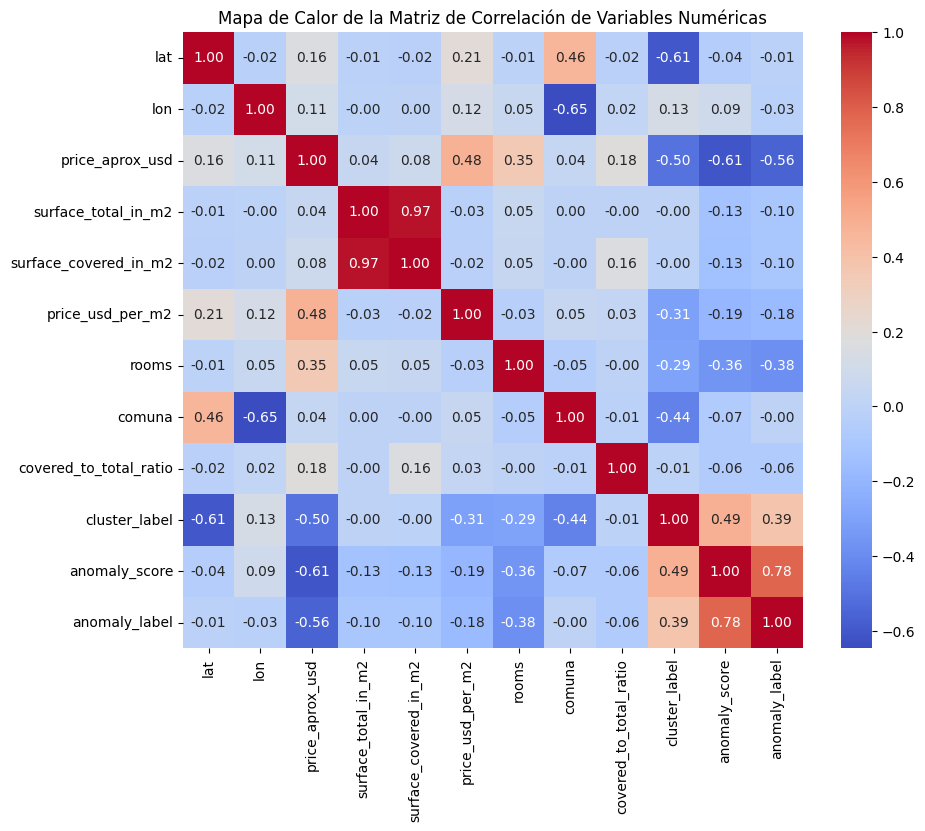

In [ ]:
# @title
# Calcular la matriz de correlación solo para columnas numéricas
df_numeric_corr = df.select_dtypes(include=np.number)
correlation_matrix = df_numeric_corr.corr()

print("Matriz de Correlación de Variables Numéricas:")
display(correlation_matrix)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación de Variables Numéricas')
plt.show()

### 6.2 Preparación para Análisis de Variables Categóricas (Feature Encoding)

Se prepara la variable categórica `property_type` para análisis o modelado mediante one-hot encoding.

In [ ]:
# @title
# Seleccionar las columnas categóricas a transformar (excluyendo las de alta cardinalidad si no se van a procesar)
# En este caso, solo 'property_type'
obj_df = df.select_dtypes(include=['object']).copy()
obj_df_to_encode = obj_df[['property_type']].copy()

# Aplicar one-hot encoding
obj_df_encoded = pd.get_dummies(obj_df_to_encode, columns=['property_type'], drop_first=True)

print("DataFrame con la variable categórica 'property_type' codificada:")
display(obj_df_encoded.head())

DataFrame con la variable categórica 'property_type' codificada:


property_type_apartment  property_type_house  property_type_store
0                    False                 True                False
1                    False                False                 True
2                    False                False                 True
3                    False                False                 True
4                    False                False                 True

Número de propiedades identificadas: 18897


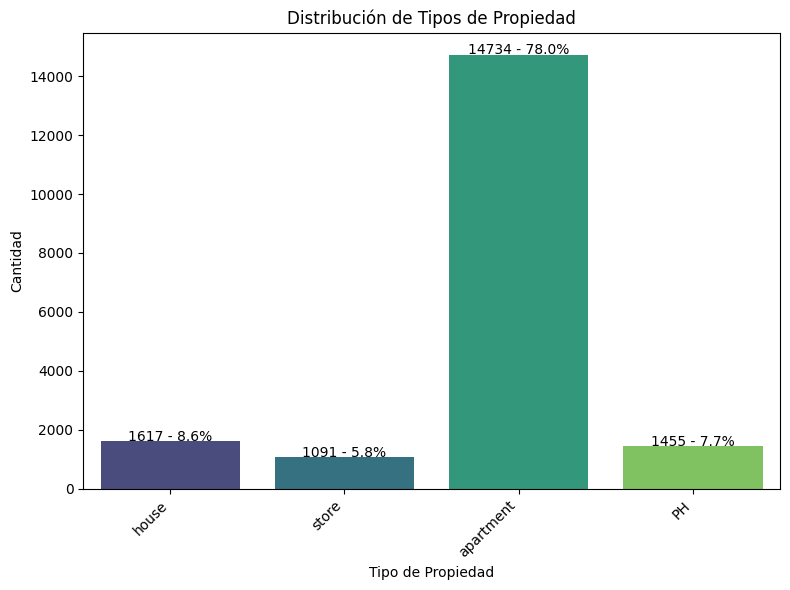

In [ ]:
# @title
# Visualizar la distribución de 'property_type' antes de la codificación
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='property_type', hue='property_type', palette='viridis', legend=False)
plt.title('Distribución de Tipos de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# agrega etiquetas a las barras con valor y porcentaje
total_properties = len(df) # Obtener el total de propiedades para calcular porcentajes
ax = plt.gca() # Obtener los ejes actuales
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            f'{int(height)} - {height/total_properties:.1%}',
            ha="center")

print(f"Número de propiedades identificadas: {total_properties}")
plt.show()

Número de propiedades identificadas: 18897


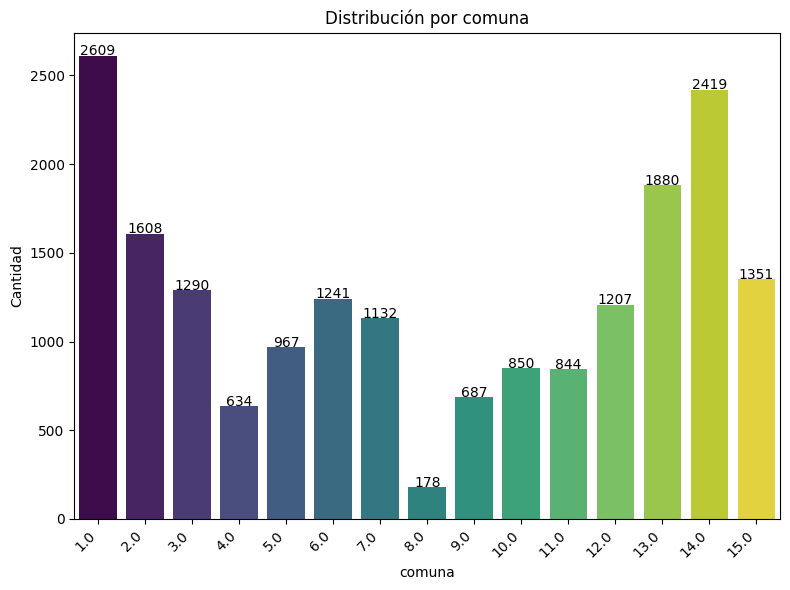

In [ ]:
# @title
# Visualizar la distribución de 'property_type' antes de la codificación
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='comuna', hue='comuna', palette='viridis', legend=False)
plt.title('Distribución por comuna')
plt.xlabel('comuna')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# agrega etiquetas a las barras con valor
ax = plt.gca() # Obtener los ejes actuales
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            f'{int(height)}', # Mostrar solo el valor entero
            ha="center")

print(f"Número de propiedades identificadas: {total_properties}")

Número de propiedades identificadas: 18897


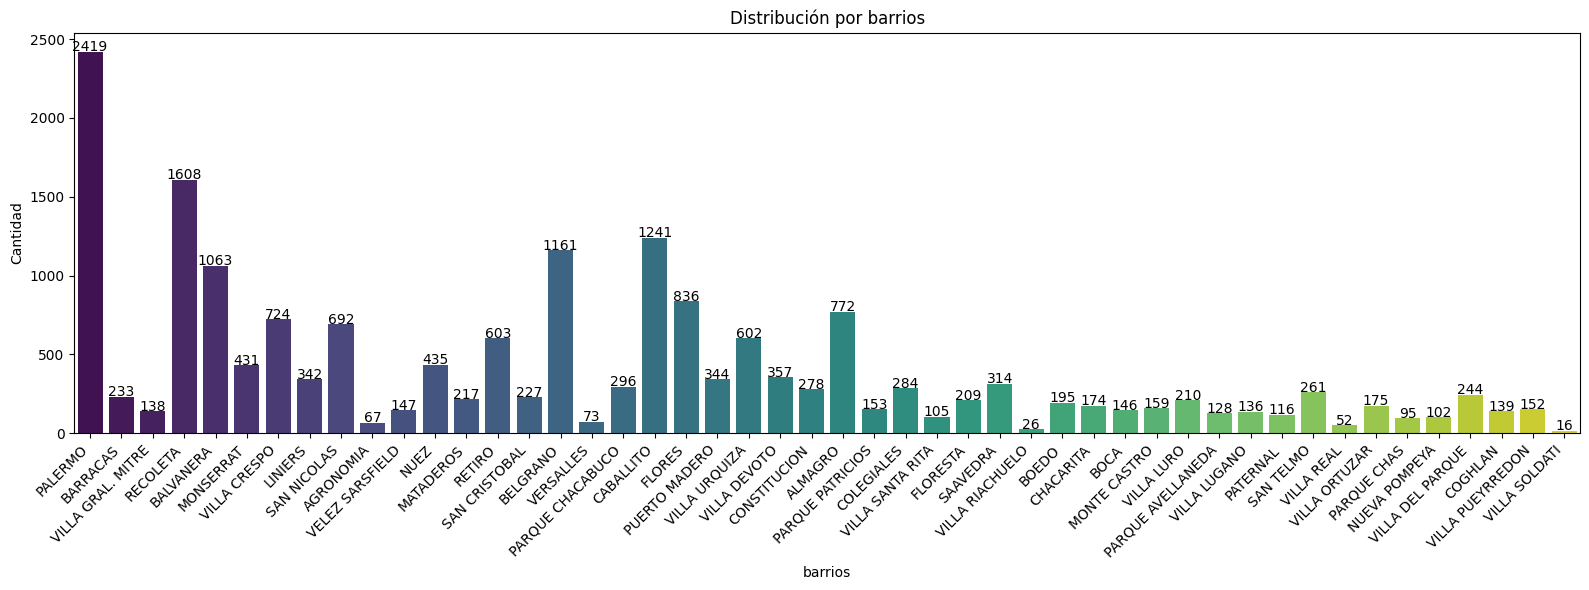

In [ ]:
# @title
# Visualizar la distribución de 'barrio' antes de la codificación
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='barrio', hue='barrio', palette='viridis', legend=False)
plt.title('Distribución por barrios')
plt.xlabel('barrios')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# agrega etiquetas a las barras con valor
ax = plt.gca() # Obtener los ejes actuales
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            f'{int(height)}', # Mostrar solo el valor entero
            ha="center")

print(f"Número de propiedades identificadas: {total_properties}")

### 6.3 Feature Engineering: Densidad de Habitaciones

Creamos una nueva característica calculando la densidad de habitaciones, definida como el número de habitaciones por metro cuadrado de superficie cubierta. Esto puede ser útil para entender la distribución del espacio interior.

In [ ]:
# @title
# Calcular la densidad de habitaciones (habitaciones por m2 cubierto)
# Manejar casos donde surface_covered_in_m2 es cero para evitar división por cero
df['room_density'] = df.apply(
    lambda row: row['rooms'] / row['surface_covered_in_m2'] if row['surface_covered_in_m2'] > 0 else 0, axis=1
)

# Mostrar las primeras filas con la nueva columna
print("DataFrame con la nueva característica 'room_density':")
display(df.head())

# Opcionalmente, ver estadísticas descriptivas de la nueva característica
print("\nEstadísticas descriptivas para 'room_density':")
display(df['room_density'].describe())

DataFrame con la nueva característica 'room_density':


property_type                            place_with_parent_names        lat  \
0         house  |Argentina|Capital Federal|Palermo|Palermo Viejo| -34.588953   
1         store                |Argentina|Capital Federal|Palermo| -34.586069   
2         store   |Argentina|Capital Federal|Palermo|Palermo Soho| -34.589723   
3         store                |Argentina|Capital Federal|Palermo| -34.592365   
4         store           |Argentina|Capital Federal|Barrio Norte| -34.585653   

         lon  price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0 -58.429882        2000000.0                312.0             127.491171   
1 -58.414431         790000.0                121.0             121.000000   
2 -58.432566         343000.0                122.0             108.000000   
3 -58.414403         145000.0                 24.0              24.000000   
4 -58.411493         175000.0                 24.0              24.000000   

   price_usd_per_m2  rooms   barrio  comuna  covered_to_total_ratio  \
0       6410.256410      3  PALERMO    14.0                0.408626   
1       6528.925620      3  PALERMO    14.0                1.000000   
2       2811.475410      2  PALERMO    14.0                0.885246   
3       6041.666667      3  PALERMO    14.0                1.000000   
4       7291.666667      3  PALERMO    14.0                1.000000   

   cluster_label  anomaly_score  anomaly_label  room_density  
0              0      -0.081759             -1      0.023531  
1              0       0.046252              1      0.024793  
2              1       0.113818              1      0.018519  
3              1       0.052889              1      0.125000  
4              1       0.027660              1      0.125000


Estadísticas descriptivas para 'room_density':


count    18897.000000
mean         0.044657
std          0.131480
min          0.000033
25%          0.023810
50%          0.035714
75%          0.047619
max          5.000000
Name: room_density, dtype: float64

### 6.4 Estudio Spearman y Kendall

Los coeficientes de correlación de Spearman y Kendall son alternativas al coeficiente de Pearson, y aportan un valor diferente:

Pearson: Mide la fuerza y dirección de una relación lineal entre dos variables. Asume que los datos son paramétricos y siguen una distribución normal (aunque es algo robusto a desviaciones).

Spearman y Kendall: Miden la fuerza y dirección de una relación monotónica entre dos variables. No asumen una relación lineal ni una distribución normal. Se basan en los rangos de los datos, no en los valores brutos. Esto los hace más robustos a valores atípicos y a relaciones no lineales pero consistentes (si una variable aumenta, la otra también tiende a aumentar, aunque no sea en línea recta).

¿Cómo aportan valor aquí?

Dado que identificamos valores atípicos significativos y algunas relaciones (como precio vs. superficie en el nicho principal) no parecían fuertemente lineales, calcular Spearman o Kendall podría revelar relaciones monotónicas que Pearson no capta tan bien, o confirmar la fuerza de las relaciones sin la influencia de los extremos.

Por ejemplo, aunque la correlación de Pearson entre precio y superficie total fue baja en el nicho principal, una correlación de Spearman o Kendall podría ser un poco más alta si existe una tendencia general a que propiedades más grandes tengan precios más altos, incluso si la relación no es perfectamente lineal.

In [ ]:
# @title
# Calcular la matriz de correlación de Spearman para columnas numéricas
df_numeric_corr = df.select_dtypes(include=np.number)
correlation_matrix_spearman = df_numeric_corr.corr(method='spearman')

print("Matriz de Correlación de Spearman de Variables Numéricas:")
display(correlation_matrix_spearman)

Matriz de Correlación de Spearman de Variables Numéricas:


lat       lon  price_aprox_usd  \
lat                     1.000000 -0.063239         0.250444   
lon                    -0.063239  1.000000         0.060359   
price_aprox_usd         0.250444  0.060359         1.000000   
surface_total_in_m2    -0.004595 -0.033607         0.751401   
surface_covered_in_m2  -0.011709  0.014906         0.763636   
price_usd_per_m2        0.416761  0.143267         0.319358   
rooms                  -0.006602  0.039229         0.581434   
comuna                  0.468868 -0.631468         0.083027   
covered_to_total_ratio  0.003366  0.198965        -0.067676   
cluster_label          -0.701891  0.233524        -0.371528   
anomaly_score          -0.078135  0.159749        -0.251661   
anomaly_label          -0.022518 -0.029119        -0.352174   
room_density           -0.030541  0.005102        -0.491790   

                        surface_total_in_m2  surface_covered_in_m2  \
lat                               -0.004595              -0.011709   
lon                               -0.033607               0.014906   
price_aprox_usd                    0.751401               0.763636   
surface_total_in_m2                1.000000               0.875109   
surface_covered_in_m2              0.875109               1.000000   
price_usd_per_m2                  -0.108193              -0.065563   
rooms                              0.660533               0.679325   
comuna                             0.004634              -0.023446   
covered_to_total_ratio            -0.264549               0.075077   
cluster_label                     -0.194502              -0.179473   
anomaly_score                     -0.291906              -0.257549   
anomaly_label                     -0.383703              -0.383595   
room_density                      -0.554810              -0.676025   

                        price_usd_per_m2     rooms    comuna  \
lat                             0.416761 -0.006602  0.468868   
lon                             0.143267  0.039229 -0.631468   
price_aprox_usd                 0.319358  0.581434  0.083027   
surface_total_in_m2            -0.108193  0.660533  0.004634   
surface_covered_in_m2          -0.065563  0.679325 -0.023446   
price_usd_per_m2                1.000000 -0.096930  0.131574   
rooms                          -0.096930  1.000000 -0.038499   
comuna                          0.131574 -0.038499  1.000000   
covered_to_total_ratio          0.122306 -0.004838 -0.140123   
cluster_label                  -0.357924 -0.138088 -0.498654   
anomaly_score                  -0.059755 -0.090060 -0.055755   
anomaly_label                  -0.020390 -0.269851  0.010160   
room_density                   -0.039715 -0.021291 -0.012382   

                        covered_to_total_ratio  cluster_label  anomaly_score  \
lat                                   0.003366      -0.701891      -0.078135   
lon                                   0.198965       0.233524       0.159749   
price_aprox_usd                      -0.067676      -0.371528      -0.251661   
surface_total_in_m2                  -0.264549      -0.194502      -0.291906   
surface_covered_in_m2                 0.075077      -0.179473      -0.257549   
price_usd_per_m2                      0.122306      -0.357924      -0.059755   
rooms                                -0.004838      -0.138088      -0.090060   
comuna                               -0.140123      -0.498654      -0.055755   
covered_to_total_ratio                1.000000       0.033445       0.033702   
cluster_label                         0.033445       1.000000       0.405999   
anomaly_score                         0.033702       0.405999       1.000000   
anomaly_label                        -0.008288       0.296048       0.463625   
room_density                         -0.087843       0.162483       0.370270   

                        anomaly_label  room_density  
lat                         -0.022518     -0.030541  
lon                         -0.029119  

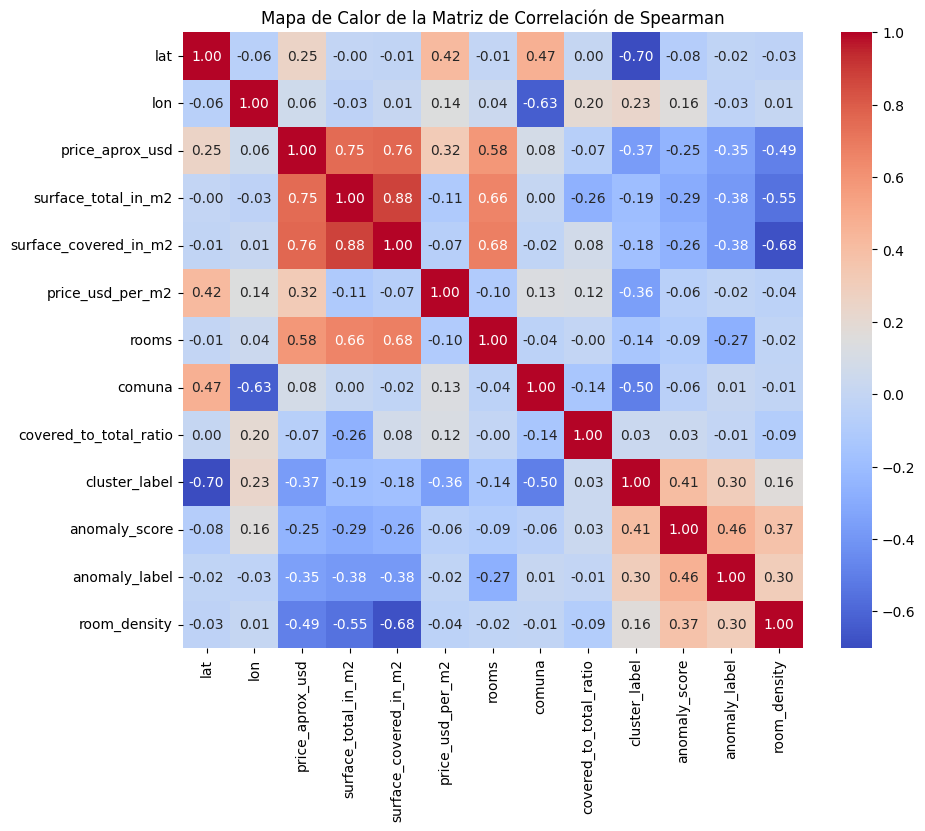

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que las matrices de correlación de Spearman y Kendall estén definidas
try:
    correlation_matrix_spearman
except NameError:
    print("Error: La matriz de correlación de Spearman no está definida. Por favor, ejecuta la celda 4849f2bb primero.")
    raise # Detener ejecución si las matrices no existen

# Mapa de calor para la matriz de correlación de Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación de Spearman')
plt.show()

In [ ]:
# @title
# Calcular la matriz de correlación de Kendall para columnas numéricas
correlation_matrix_kendall = df_numeric_corr.corr(method='kendall')

print("\nMatriz de Correlación de Kendall de Variables Numéricas:")
display(correlation_matrix_kendall)


Matriz de Correlación de Kendall de Variables Numéricas:


lat       lon  price_aprox_usd  \
lat                     1.000000 -0.067770         0.167109   
lon                    -0.067770  1.000000         0.041273   
price_aprox_usd         0.167109  0.041273         1.000000   
surface_total_in_m2    -0.003749 -0.023314         0.585161   
surface_covered_in_m2  -0.008421  0.009809         0.594514   
price_usd_per_m2        0.286823  0.099454         0.222859   
rooms                  -0.005534  0.029334         0.456217   
comuna                  0.241613 -0.450206         0.060381   
covered_to_total_ratio  0.001566  0.140443        -0.047068   
cluster_label          -0.545978  0.184939        -0.303456   
anomaly_score          -0.052924  0.106296        -0.164316   
anomaly_label          -0.018389 -0.023779        -0.288939   
room_density           -0.020884  0.003423        -0.354639   

                        surface_total_in_m2  surface_covered_in_m2  \
lat                               -0.003749              -0.008421   
lon                               -0.023314               0.009809   
price_aprox_usd                    0.585161               0.594514   
surface_total_in_m2                1.000000               0.780640   
surface_covered_in_m2              0.780640               1.000000   
price_usd_per_m2                  -0.075238              -0.046425   
rooms                              0.537523               0.556865   
comuna                             0.003399              -0.016705   
covered_to_total_ratio            -0.188903               0.051670   
cluster_label                     -0.155608              -0.141728   
anomaly_score                     -0.193511              -0.167500   
anomaly_label                     -0.316390              -0.316037   
room_density                      -0.421250              -0.540643   

                        price_usd_per_m2     rooms    comuna  \
lat                             0.286823 -0.005534  0.241613   
lon                             0.099454  0.029334 -0.450206   
price_aprox_usd                 0.222859  0.456217  0.060381   
surface_total_in_m2            -0.075238  0.537523  0.003399   
surface_covered_in_m2          -0.046425  0.556865 -0.016705   
price_usd_per_m2                1.000000 -0.074035  0.095062   
rooms                          -0.074035  1.000000 -0.030158   
comuna                          0.095062 -0.030158  1.000000   
covered_to_total_ratio          0.087656 -0.003310 -0.100444   
cluster_label                  -0.293198 -0.119106 -0.427412   
anomaly_score                  -0.043853 -0.054470 -0.035550   
anomaly_label                  -0.016825 -0.245679  0.008630   
room_density                   -0.027529 -0.009898 -0.008577   

                        covered_to_total_ratio  cluster_label  anomaly_score  \
lat                                   0.001566      -0.545978      -0.052924   
lon                                   0.140443       0.184939       0.106296   
price_aprox_usd                      -0.047068      -0.303456      -0.164316   
surface_total_in_m2                  -0.188903      -0.155608      -0.193511   
surface_covered_in_m2                 0.051670      -0.141728      -0.167500   
price_usd_per_m2                      0.087656      -0.293198      -0.043853   
rooms                                -0.003310      -0.119106      -0.054470   
comuna                               -0.100444      -0.427412      -0.035550   
covered_to_total_ratio                1.000000       0.027426       0.023004   
cluster_label                         0.027426       1.000000       0.332794   
anomaly_score                         0.023004       0.332794       1.000000   
anomaly_label                        -0.007004       0.287453       0.378559   
room_density                         -0.060434       0.131103       0.254657   

                        anomaly_label  room_density  
lat                         -0.018389     -0.020884  
lon                         -0.023779  

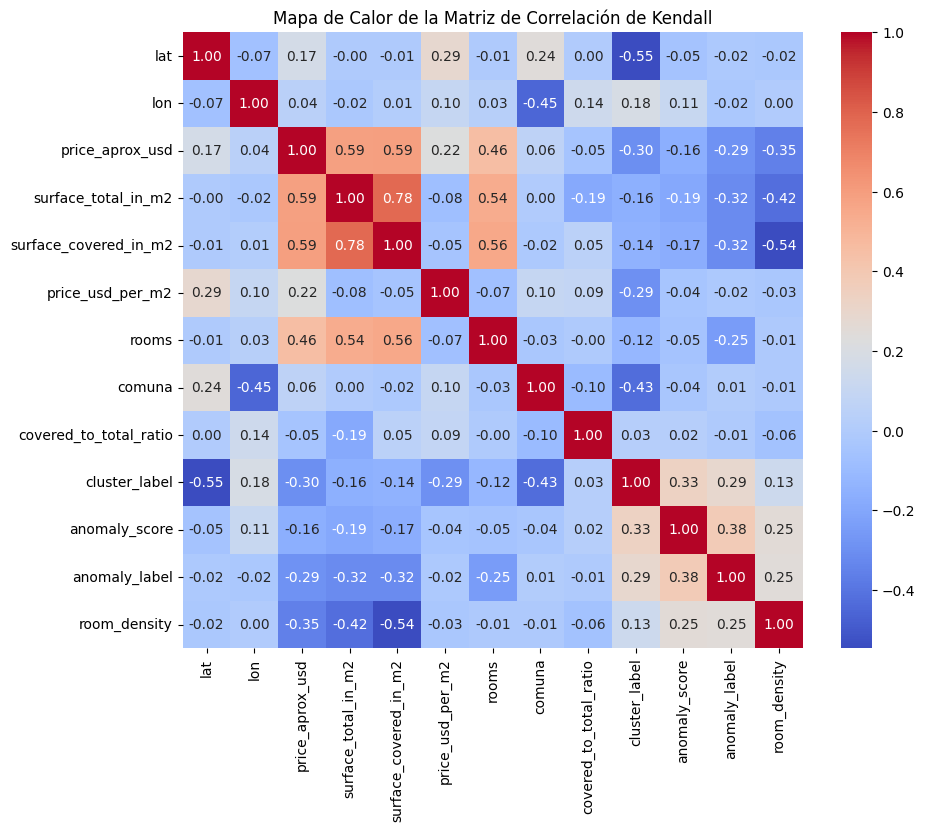

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que las matrices de correlación de Spearman y Kendall estén definidas
try:
    correlation_matrix_spearman, correlation_matrix_kendall
except NameError:
    print("Error: Las matrices de correlación de Spearman o Kendall no están definidas. Por favor, ejecuta la celda 4849f2bb primero.")
    raise # Detener ejecución si las matrices no existen

# Mapa de calor para la matriz de correlación de Kendall
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación de Kendall')
plt.show()

Ahora, para interpretar estos gráficos:

**- Comparación con Pearson**: Notarás que los coeficientes de Spearman y Kendall tienden a ser ligeramente diferentes a los de Pearson. Esto es esperable, ya que miden relaciones monotónicas en lugar de estrictamente lineales y son menos sensibles a los valores atípicos extremos.

**- Relaciones Clave**:

  **Precio vs. Superficie (Total y Cubierta)**: Las correlaciones entre price_aprox_usd y las superficies (surface_total_in_m2, surface_covered_in_m2) son notablemente más altas con Spearman (alrededor de 0.75-0.76) y Kendall (alrededor de 0.58-0.59) en comparación con Pearson (alrededor de 0.04-0.07). Esto sugiere que, aunque la relación no sea perfectamente lineal en todo el rango de datos (especialmente con los outliers), sí existe una fuerte tendencia monotónica: a mayor superficie, generalmente mayor precio.

  **Precio vs. Habitaciones**: La correlación entre price_aprox_usd y rooms también es mayor con Spearman (alrededor de 0.58) y Kendall (alrededor de 0.46) que con Pearson (alrededor de 0.35). Esto refuerza la idea de que más habitaciones tienden a asociarse con precios más altos, incluso si no es una relación estrictamente lineal.

  **Superficie Total vs. Superficie Cubierta**: La correlación entre surface_total_in_m2 y surface_covered_in_m2 sigue siendo muy alta con Spearman (alrededor de 0.88) y Kendall (alrededor de 0.78), lo que indica que estas dos métricas de superficie están fuertemente relacionadas.

  **Densidad de Habitaciones (room_density)**: Esta nueva característica muestra una correlación negativa moderada con price_aprox_usd en Spearman (-0.49) y Kendall (-0.35). Esto es interesante: propiedades con mayor densidad de habitaciones (más habitaciones por m² cubierto) tienden a tener precios totales menores. Esto podría reflejar que las propiedades más pequeñas o en segmentos de menor precio tienen distribuciones de espacio interior diferentes.

  **Cluster Label**: La etiqueta del clúster (cluster_label) muestra una correlación positiva moderada con price_aprox_usd, superficies y habitaciones, lo cual valida que los clústeres identificados por K-Means sí agrupan propiedades con características de valor similares, aunque la correlación no sea perfecta.

***En resumen, Spearman y Kendall confirman la existencia de relaciones monotónicas más fuertes entre precio, superficies y habitaciones de lo que sugería Pearson para el dataset completo, probablemente debido a la influencia de los outliers y la naturaleza no estrictamente lineal de las relaciones en todo el rango de datos. La densidad de habitaciones emerge como una característica con una relación negativa interesante con el precio.***

Teniendo los tres mapas de calor a la vista (Pearson, Spearman y Kendall), podemos compararlos:

**- Relaciones Lineales vs. Monotónicas**: Observa las diferencias en los valores de correlación entre price_aprox_usd y las superficies (surface_total_in_m2, surface_covered_in_m2). En el mapa de Pearson, estas correlaciones son bastante bajas (alrededor de 0.04-0.07), lo que sugiere una relación lineal débil. Sin embargo, en los mapas de **Spearman y Kendall**, estas correlaciones son significativamente más altas (0.75-0.76 para Spearman, 0.58-0.59 para Kendall). Esto indica que, aunque no haya una línea recta clara que describa la relación precio-superficie en todo el dataset (posiblemente influenciado por los outliers), sí existe una fuerte tendencia: a medida que la superficie aumenta, el precio también tiende a aumentar de manera consistente (relación monotónica). Spearman y Kendall son mejores para capturar este tipo de relaciones.

**- Influencia de Outliers**: La diferencia entre Pearson y Spearman/Kendall es más pronunciada en variables que tienen valores atípicos extremos, como las superficies y el precio. Pearson es muy sensible a estos valores extremos, que pueden distorsionar la medida de la relación lineal. Spearman y Kendall, al basarse en rangos, son menos afectados por los valores absolutos de los outliers.

**- Relación Precio-Habitaciones**: La correlación entre price_aprox_usd y rooms también es más alta con Spearman (0.58) y Kendall (0.46) que con Pearson (0.35). Esto confirma que, aunque no sea perfectamente lineal, hay una tendencia clara a que las propiedades con más habitaciones tengan precios más altos.

**- Relaciones Consistentes**: Para variables sin outliers extremos o con relaciones más cercanas a la linealidad (como surface_total_in_m2 vs surface_covered_in_m2), los valores de correlación de los tres métodos tienden a ser más similares.

***En resumen, la comparación de los tres mapas de calor nos muestra que, si bien la relación lineal entre precio y características como superficie y habitaciones puede ser débil en el dataset completo (según Pearson, posiblemente debido a outliers), existe una fuerte tendencia general a que a mayor superficie y más habitaciones, mayor sea el precio (según Spearman y Kendall). Esto valida la importancia de estas características, incluso si la relación no es una línea recta perfecta.***

### 6.5 Identificación del Nicho Principal de Mercado (Análisis Descriptivo)

Basado en el análisis de la distribución de precios y la identificación de la mayoría de las propiedades, se busca definir el segmento de mercado más significativo.

In [ ]:
# @title
# Filtrar los registros con precio menor a 1.000.000 USD
filtered_df_less_1M = df[df['price_aprox_usd'] < 1000000].copy()

num_properties_less_than_1M = len(filtered_df_less_1M)
print(f"El número de propiedades con price_aprox_usd menor a 1.000.000 es: {num_properties_less_than_1M}")
print(f"Porcentaje del total: {num_properties_less_than_1M / len(df) * 100:.2f}%")

# Calcular estadísticas clave para este subconjunto
mean_price_1M = filtered_df_less_1M['price_aprox_usd'].mean()
median_price_1M = filtered_df_less_1M['price_aprox_usd'].median()
q1_1M = filtered_df_less_1M['price_aprox_usd'].quantile(0.25)
q3_1M = filtered_df_less_1M['price_aprox_usd'].quantile(0.75)
iqr_1M = q3_1M - q1_1M

print("\nEstadísticas descriptivas para propiedades con precio menor a 1.000.000 USD:")
print(f"  Media: {mean_price_1M:,.2f} USD")
print(f"  Mediana: {median_price_1M:,.2f} USD")
print(f"  Q1 (25%): {q1_1M:,.2f} USD")
print(f"  Q3 (75%): {q3_1M:,.2f} USD")
print(f"  IQR: {iqr_1M:,.2f} USD")

El número de propiedades con price_aprox_usd menor a 1.000.000 es: 18233
Porcentaje del total: 96.49%

Estadísticas descriptivas para propiedades con precio menor a 1.000.000 USD:
  Media: 242,091.70 USD
  Mediana: 190,000.00 USD
  Q1 (25%): 120,000.00 USD
  Q3 (75%): 296,355.85 USD
  IQR: 176,355.85 USD


### Análisis Consolidado del Nicho Principal y Micro-ubicación

In [ ]:
# @title
# Filtrar para el nicho principal (propiedades entre Q1 y Q3 de < 1M USD) ---
# Asegurarse de que 'filtered_df_less_1M', 'q1_1M', y 'q3_1M' estén definidos.

properties_between_q1_q3_1M = filtered_df_less_1M[(filtered_df_less_1M['price_aprox_usd'] >= q1_1M) & (filtered_df_less_1M['price_aprox_usd'] <= q3_1M)].copy()

# Definir el DataFrame para el nicho principal (apartamentos entre Q1 y Q3 de < 1M USD)
apartments_in_principal_niche = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == 'apartment'].copy()

print("DataFrames filtrados para el Nicho Principal creados.")

DataFrames filtrados para el Nicho Principal creados.


### Extraer y Mostrar Distribución de Ubicaciones Granulares

In [ ]:
# @title
# Extraer el nivel más granular de la ubicación para el nicho principal de apartamentos
# Asumiendo que el último elemento después del último '|' es el nivel más granular
# Manejar casos donde la cadena puede terminar con '|' o tener otros formatos
apartments_in_principal_niche['granular_location'] = apartments_in_principal_niche['place_with_parent_names'].apply(
    lambda x: [part for part in x.split('|') if part][-1] if isinstance(x, str) and '|' in x and [part for part in x.split('|') if part] else 'Desconocido'
)

# Mostrar la distribución de las ubicaciones granulares
print("Distribución de Ubicaciones Granulares dentro del Nicho Principal (Apartamentos):")
granular_location_counts = apartments_in_principal_niche['granular_location'].value_counts()
display(granular_location_counts.head(20)) # Mostrar las 20 ubicaciones más comunes

Distribución de Ubicaciones Granulares dentro del Nicho Principal (Apartamentos):


granular_location
Palermo              751
Belgrano             727
Caballito            717
Recoleta             432
Barrio Norte         324
Villa Urquiza        323
Boedo                317
Almagro              317
Villa Crespo         314
Flores               273
Nuñez                244
Balvanera            224
San Telmo            170
Villa Santa Rita     155
Palermo Hollywood    143
Colegiales           126
Retiro               120
Villa del Parque     111
Villa Devoto         108
Floresta             104
Name: count, dtype: int64

### Calcular Precio Promedio por Ubicación Granular en el Nicho Principal

In [ ]:
# @title
# Calcular el precio promedio por cada ubicación granular (para ubicaciones con suficientes datos)
# Considerar solo ubicaciones con un número mínimo de propiedades (ej. > 10) para que la media sea más representativa
min_properties_for_mean = 10
locations_to_analyze = granular_location_counts[granular_location_counts >= min_properties_for_mean].index

if not locations_to_analyze.empty:
    price_by_granular_location = apartments_in_principal_niche[
        apartments_in_principal_niche['granular_location'].isin(locations_to_analyze)
    ].groupby('granular_location')['price_aprox_usd'].mean().sort_values(ascending=False)

    print(f"\nPrecio Promedio por Ubicación Granular (más de {min_properties_for_mean} propiedades) en el Nicho Principal:")
# Mostrar como un DataFrame para que sea más compacto con múltiples columnas
    display(price_by_granular_location.to_frame().T)
else:
    print(f"\nNo hay ubicaciones granulares con más de {min_properties_for_mean} propiedades en el Nicho Principal para calcular el precio promedio.")


Precio Promedio por Ubicación Granular (más de 10 propiedades) en el Nicho Principal:


granular_location  Capital Federal  Villa Santa Rita          Boedo  \
price_aprox_usd      293249.177403     285987.299076  277533.377756   

granular_location  Puerto Madero  Parque Avellaneda  Palermo Chico  \
price_aprox_usd    262744.008965      255704.390969   247112.57022   

granular_location   Barrio Norte       Recoleta        Liniers   Villa Lugano  \
price_aprox_usd    215567.905953  213262.260563  210831.748164  208269.268722   

granular_location  ...  San Cristobal   Constitución      Versalles  \
price_aprox_usd    ...  169646.047125  168461.378663  166831.818182   

granular_location  Villa Ortuzar     Tribunales       Paternal  \
price_aprox_usd    163328.548806  156626.315789  154067.915318   

granular_location  Villa Pueyrredón    Parque Chas  Agronomía           Boca  
price_aprox_usd       153165.362589  150345.666667   147898.0  144278.842105  

[1 rows x 55 columns]

Se enfoca el análisis en el rango de precios entre el primer y tercer cuartil de las propiedades con precio menor a 1.000.000 USD para identificar el segmento más representativo.

### Visualizar Precio Promedio por Ubicación Granular (Top N)

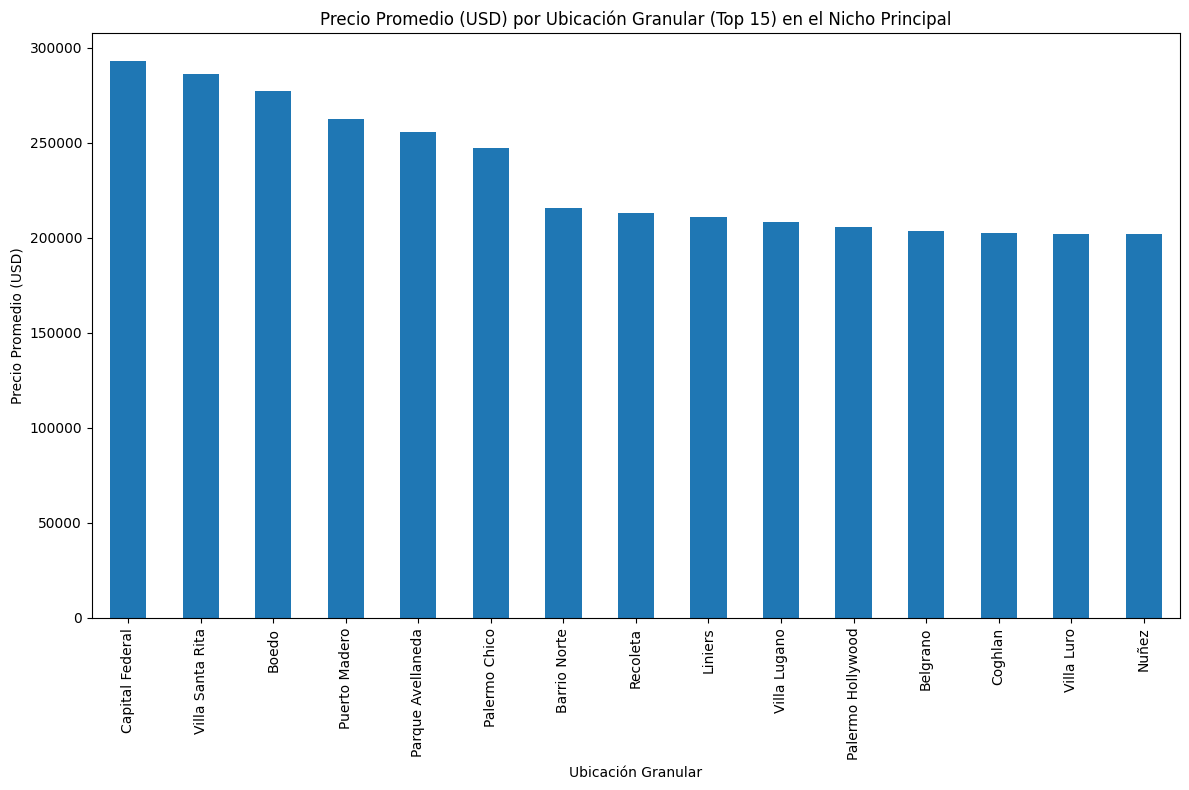

In [ ]:
# @title
# Opcionalmente, visualizar el precio promedio por ubicación granular (Top N)
if not locations_to_analyze.empty and len(locations_to_analyze) > 0: # Ensure there are locations to plot
    top_n_locations = 15 # Mostrar las Top 15 ubicaciones por precio promedio
    plt.figure(figsize=(12, 8))
    price_by_granular_location.head(top_n_locations).plot(kind='bar')
    plt.title(f'Precio Promedio (USD) por Ubicación Granular (Top {top_n_locations}) en el Nicho Principal')
    plt.xlabel('Ubicación Granular')
    plt.ylabel('Precio Promedio (USD)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
elif locations_to_analyze.empty:
    print("No hay ubicaciones con suficientes propiedades para visualizar el precio promedio.")
else:
     print("No hay suficientes ubicaciones para visualizar en el Top N.")

### Visualización del Rango de Precios Principal

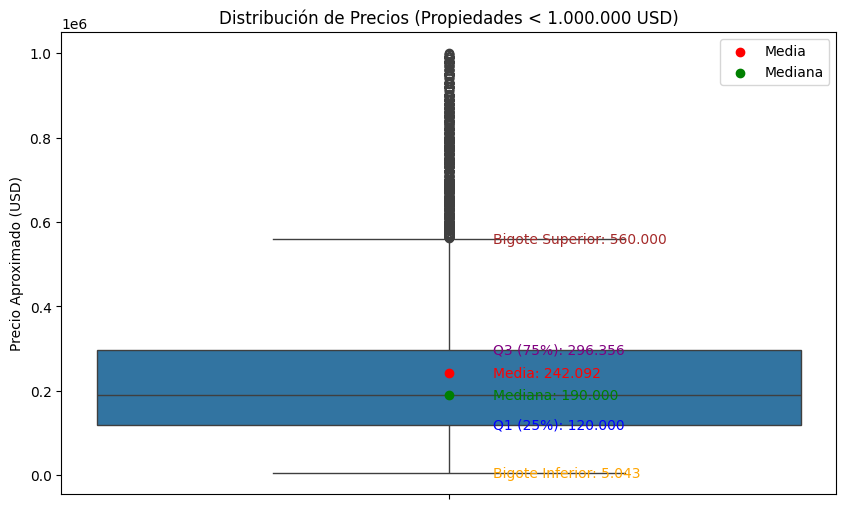

In [ ]:
# @title
# crear gráfico de caja para propiedades < 1M USD
plt.figure(figsize=(10, 6)) # Keep original figure size or adjust for vertical plot
sns.boxplot(y=filtered_df_less_1M['price_aprox_usd']) # Change 'x' back to 'y' for vertical orientation

# colocar media y mediana en el gráfico
plt.scatter(0, mean_price_1M, color='red', zorder=5, label='Media') # Swap x and y coordinates back for vertical plot
plt.scatter(0, median_price_1M, color='green', zorder=5, label='Mediana') # Swap x and y coordinates back for vertical plot

# agregar anotaciones de texto para la clave estadística (usando los valores calculados para <1M)
# Adjust text placement for vertical plot (swap x and y, adjust va/ha)
plt.text(0.05, mean_price_1M, f'Media: {mean_price_1M:,.0f}'.replace(',', '.'), color='red', ha='left', va='center') # Restored text annotation
plt.text(0.05, median_price_1M, f'Mediana: {median_price_1M:,.0f}'.replace(',', '.'), color='green', ha='left', va='center') # Restored text annotation
plt.text(0.05, q1_1M, f'Q1 (25%): {q1_1M:,.0f}'.replace(',', '.'), color='blue', ha='left', va='center') # Restored text annotation
plt.text(0.05, q3_1M, f'Q3 (75%): {q3_1M:,.0f}'.replace(',', '.'), color='purple', ha='left', va='center') # Restored text annotation

# Calcular y anotar los bigotes (usando los límites del IQR para <1M)
lower_whisker_1M = filtered_df_less_1M['price_aprox_usd'][filtered_df_less_1M['price_aprox_usd'] >= q1_1M - 1.5 * iqr_1M].min()
upper_whisker_1M = filtered_df_less_1M['price_aprox_usd'][filtered_df_less_1M['price_aprox_usd'] <= q3_1M + 1.5 * iqr_1M].max()

# Adjust text placement for vertical plot
plt.text(0.05, lower_whisker_1M, f'Bigote Inferior: {lower_whisker_1M:,.0f}'.replace(',', '.'), color='orange', ha='left', va='center') # Restored text annotation
plt.text(0.05, upper_whisker_1M, f'Bigote Superior: {upper_whisker_1M:,.0f}'.replace(',', '.'), color='brown', ha='left', va='center')


plt.title('Distribución de Precios (Propiedades < 1.000.000 USD)')
plt.xlabel('') # Remove xlabel for vertical plot
plt.ylabel('Precio Aproximado (USD)') # Change xlabel to ylabel for vertical plot
plt.legend()
plt.show()

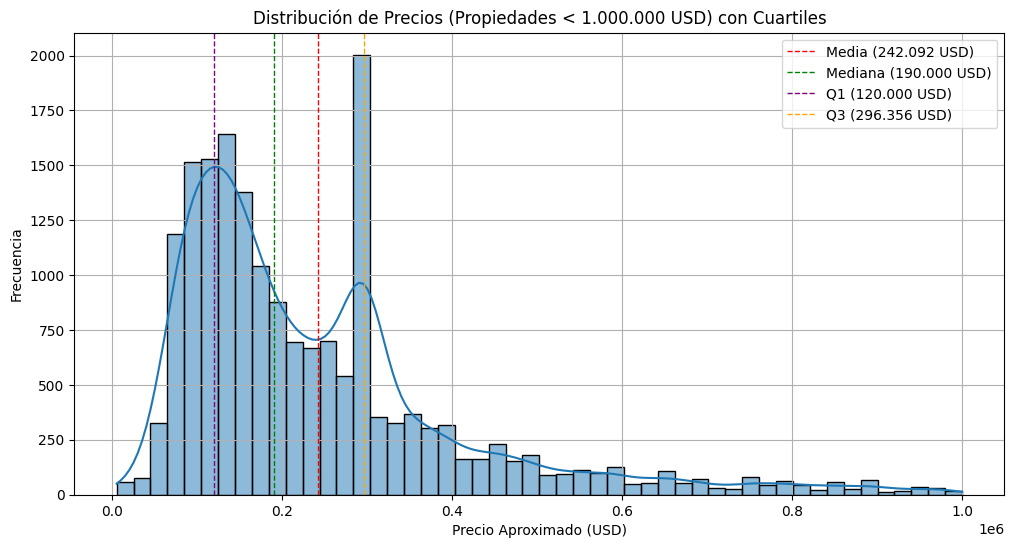

In [ ]:
# @title
# Crear gráfico histograma para propiedades < 1M USD
plt.figure(figsize=(12, 6)) # Ajustar el tamaño de la figura para un histograma
sns.histplot(data=filtered_df_less_1M, x='price_aprox_usd', bins=50, kde=True) # Usar histplot para histograma

# colocar media y mediana en el gráfico (usando los valores calculados para <1M)
# Asegurarse de que q1_1M, q3_1M, mean_price_1M, y median_price_1M estén definidos
try:
    q1_1M, q3_1M, mean_price_1M, median_price_1M, filtered_df_less_1M
except NameError:
    print("Error: Algunas variables necesarias (q1_1M, q3_1M, mean_price_1M, median_price_1M, filtered_df_less_1M) no están definidas. Por favor, ejecuta las celdas de análisis del nicho principal (sección 6) primero.")
    raise # Detener ejecución si las variables no existen


plt.axvline(mean_price_1M, color='red', linestyle='dashed', linewidth=1, label=f'Media ({mean_price_1M:,.0f} USD)'.replace(',', '.')) # Usar axvline para líneas verticales
plt.axvline(median_price_1M, color='green', linestyle='dashed', linewidth=1, label=f'Mediana ({median_price_1M:,.0f} USD)'.replace(',', '.'))
plt.axvline(q1_1M, color='purple', linestyle='dashed', linewidth=1, label=f'Q1 ({q1_1M:,.0f} USD)'.replace(',', '.')) # Agregar línea para Q1
plt.axvline(q3_1M, color='orange', linestyle='dashed', linewidth=1, label=f'Q3 ({q3_1M:,.0f} USD)'.replace(',', '.')) # Agregar línea para Q3


plt.title('Distribución de Precios (Propiedades < 1.000.000 USD) con Cuartiles')
plt.xlabel('Precio Aproximado (USD)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True) # Agregar cuadrícula para mejor lectura
plt.show()

OBSERVACIONES:

**Distribución Sesgada**: El histograma muestra claramente una distribución sesgada hacia la derecha (sesgo positivo). La mayor concentración de propiedades se encuentra en los rangos de precios más bajos, y la frecuencia disminuye a medida que aumenta el precio. Esto es común en los datos de precios de bienes raíces, donde hay muchas propiedades a precios moderados y menos propiedades a precios muy altos.

**Relación Media vs. Mediana**: La media (línea roja) se encuentra a la derecha de la mediana (línea verde). En una distribución sesgada hacia la derecha, la media suele ser mayor que la mediana porque los valores más altos ("colas" a la derecha) tiran de la media en esa dirección. Esto confirma el sesgo observado.

**Concentración en el Nicho Principal**: Las líneas de Q1 (morada) y Q3 (naranja) delimitan el rango donde se encuentra el 50% central de las propiedades en este subconjunto (< 1M USD). Como se calculó anteriormente, este rango (aproximadamente 120.000 a 296.000 USD) contiene una gran parte de los datos, lo que visualmente se corresponde con la parte más alta y ancha del histograma, confirmando que este es el "nicho principal" en términos de concentración de propiedades.

**Outliers Visuales (a la derecha)**: Aunque este histograma se limita a propiedades menores a 1M USD, la "cola" extendida hacia la derecha dentro de este rango (y los valores atípicos que se identificaron previamente por encima de 562.500 USD, aunque no estén marcados en este gráfico específico) son evidentes. Esto muestra que incluso dentro del segmento de "menos de 1M", hay propiedades significativamente más caras que la mayoría.

### Análisis del Nicho Principal (Propiedades entre Q1 y Q3 de < 1M USD)

Cantidad de propiedades con precio entre 120.000 y 296.356 USD (dentro del rango < 1M): 9768
Porcentaje de este nicho sobre el total del dataset: 51.69%

Distribución de Tipos de Propiedad en el Nicho Principal:


property_type
apartment    7650
PH            985
house         700
store         433
Name: count, dtype: int64

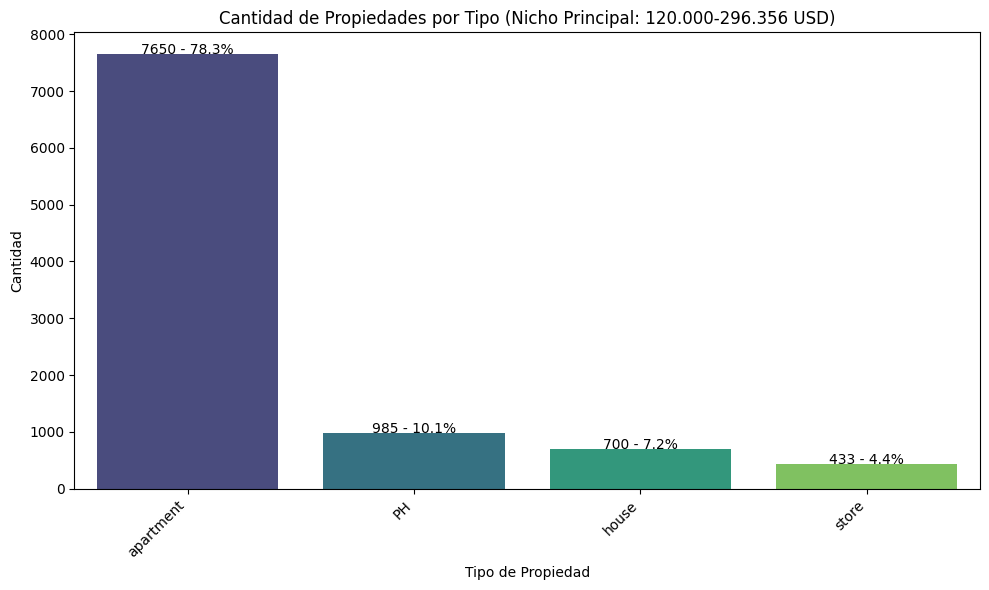

In [ ]:
# @title
# Filtrar los precios entre Q1 y Q3 del subconjunto < 1M USD
# Usamos los valores de q1_1M y q3_1M calculados previamente
properties_between_q1_q3_1M = filtered_df_less_1M[(filtered_df_less_1M['price_aprox_usd'] >= q1_1M) & (filtered_df_less_1M['price_aprox_usd'] <= q3_1M)].copy()

print(f"Cantidad de propiedades con precio entre {q1_1M:,.0f} y {q3_1M:,.0f} USD (dentro del rango < 1M): {len(properties_between_q1_q3_1M)}".replace(',', '.'))
print(f"Porcentaje de este nicho sobre el total del dataset: {len(properties_between_q1_q3_1M) / len(df) * 100:.2f}%")

# Analizar tipo de propiedades en este nicho
property_type_counts_niche = properties_between_q1_q3_1M['property_type'].value_counts()
total_properties_niche = property_type_counts_niche.sum()

print("\nDistribución de Tipos de Propiedad en el Nicho Principal:")
display(property_type_counts_niche)

# Visualizar la distribución de tipos de propiedad en el nicho
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=property_type_counts_niche.index, y=property_type_counts_niche.values, hue=property_type_counts_niche.index, palette='viridis', legend=False)
plt.title(f'Cantidad de Propiedades por Tipo (Nicho Principal: {q1_1M:,.0f}-{q3_1M:,.0f} USD)'.replace(',', '.'))
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# agrega etiquetas a las barras con valor y porcentaje
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            f'{int(height)} - {height/total_properties_niche:.1%}',
            ha="center")
plt.show()

### Análisis de Micro-ubicación dentro del Nicho Principal (Apartamentos)

Exploramos la distribución de sub-áreas o barrios dentro del nicho principal de apartamentos (precios entre ~120.000 y ~296.000 USD) utilizando la columna `place_with_parent_names`. Aunque esta columna contiene una jerarquía (Argentina|Capital Federal|Barrio|Sub-área), nos enfocaremos en los niveles más detallados disponibles para identificar posibles variaciones por micro-ubicación.

In [ ]:
# @title
# Extraer el nivel más granular de la ubicación para el nicho principal
# Asumiendo que el último elemento después del último '|' es el nivel más granular
apartments_in_principal_niche['granular_location'] = apartments_in_principal_niche['place_with_parent_names'].apply(lambda x: x.split('|')[-1] if isinstance(x, str) and '|' in x else 'Desconocido')

# Mostrar la distribución de las ubicaciones granulares
print("Distribución de Ubicaciones Granulares dentro del Nicho Principal (Apartamentos):")
granular_location_counts = apartments_in_principal_niche['granular_location'].value_counts()
display(granular_location_counts.head(20)) # Mostrar las 20 ubicaciones más comunes

# Calcular el precio promedio por cada ubicación granular (para ubicaciones con suficientes datos)
# Considerar solo ubicaciones con un número mínimo de propiedades (ej. > 10) para que la media sea más representativa
min_properties_for_mean = 10
locations_to_analyze = granular_location_counts[granular_location_counts >= min_properties_for_mean].index

if not locations_to_analyze.empty:
    price_by_granular_location = apartments_in_principal_niche[
        apartments_in_principal_niche['granular_location'].isin(locations_to_analyze)
    ].groupby('granular_location')['price_aprox_usd'].mean().sort_values(ascending=False)

    print(f"\nPrecio Promedio por Ubicación Granular (más de {min_properties_for_mean} propiedades) en el Nicho Principal:")
    display(price_by_granular_location)

    # Opcionalmente, visualizar el precio promedio por ubicación granular (Top N)
    if len(price_by_granular_location) > 0:
        top_n_locations = 15 # Mostrar las Top 15 ubicaciones por precio promedio
else:
    print(f"\nNo hay ubicaciones granulares con más de {min_properties_for_mean} propiedades en el Nicho Principal para calcular el precio promedio.")

Distribución de Ubicaciones Granulares dentro del Nicho Principal (Apartamentos):


granular_location
    7650
Name: count, dtype: int64


Precio Promedio por Ubicación Granular (más de 10 propiedades) en el Nicho Principal:


granular_location
    200685.410533
Name: price_aprox_usd, dtype: float64

### Análisis de Características Numéricas por Tipo de Propiedad en el Nicho Principal

Analizamos las estadísticas descriptivas de las características numéricas (`price_aprox_usd`, `surface_total_in_m2`, `surface_covered_in_m2`, `price_usd_per_m2`, `rooms`, `room_density`) para cada tipo de propiedad (`property_type`) dentro del nicho principal identificado (propiedades con precios entre Q1 y Q3 del subconjunto < 1M USD).

In [ ]:
# @title
# Asegurarse de que 'properties_between_q1_q3_1M' esté definido.
# Este DataFrame se define en la celda 0e391e58 o en la celda consolidada 5283e1ad.
# Si no está definido, ejecutar la celda correspondiente primero.

# Seleccionar las columnas numéricas a analizar
numerical_features_niche_analysis = [
    'price_aprox_usd',
    'surface_total_in_m2',
    'surface_covered_in_m2',
    'price_usd_per_m2',
    'rooms',
    'room_density' # Incluimos la nueva característica
]

# Filtrar el DataFrame principal para obtener solo las propiedades en el nicho
# Nota: properties_between_q1_q3_1M ya contiene este filtro
# Usaremos properties_between_q1_q3_1M si ya está definido, o filtraremos df si no
try:
    # Intenta usar el DataFrame del nicho si ya está definido
    df_niche = properties_between_q1_q3_1M.copy()
    print("Usando el DataFrame 'properties_between_q1_q3_1M' para el análisis del nicho.")
except NameError:
    # Si no está definido, filtramos el DataFrame original
    print("El DataFrame 'properties_between_q1_q3_1M' no está definido. Filtrando el DataFrame original 'df'.")
    # Asegurarse de que q1_1M y q3_1M estén definidos (provienen de la celda 6.1 d9ae441d)
    try:
        q1_1M, q3_1M
    except NameError:
        print("Error: q1_1M o q3_1M no están definidos. Por favor, ejecuta la celda 6.1 (d9ae441d) primero.")
        # Salir o manejar el error apropiadamente, por ahora solo imprimimos
        raise # Relanzar el error para detener la ejecución si q1/q3 no están definidos

    filtered_df_less_1M = df[df['price_aprox_usd'] < 1000000].copy()
    df_niche = filtered_df_less_1M[(filtered_df_less_1M['price_aprox_usd'] >= q1_1M) & (filtered_df_less_1M['price_aprox_usd'] <= q3_1M)].copy()
    print(f"Filtrado completado. {len(df_niche)} propiedades en el nicho.")


# Agrupar por tipo de propiedad y calcular estadísticas descriptivas para las columnas numéricas
niche_analysis_by_property_type = df_niche.groupby('property_type')[numerical_features_niche_analysis].describe()

print("\nEstadísticas Descriptivas de Características Numéricas por Tipo de Propiedad en el Nicho Principal:")
display(niche_analysis_by_property_type)

Usando el DataFrame 'properties_between_q1_q3_1M' para el análisis del nicho.

Estadísticas Descriptivas de Características Numéricas por Tipo de Propiedad en el Nicho Principal:


price_aprox_usd                                         \
                        count           mean           std       min   
property_type                                                          
PH                      985.0  202052.239160  58688.577642  120000.0   
apartment              7650.0  200685.410533  60055.186799  120000.0   
house                   700.0  238330.490359  54514.335129  120000.0   
store                   433.0  232304.272647  63268.119102  120000.0   

                                                                    \
                       25%       50%            75%            max   
property_type                                                        
PH             150000.0000  190000.0  253000.000000  296355.854625   
apartment      146294.4625  185441.7  255000.000000  296355.854625   
house          197750.0000  250000.0  296355.854625  296355.854625   
store          173204.2700  250000.0  296355.854625  296355.854625   

              surface_total_in_m2              ... rooms       room_density  \
                            count        mean  ...   75%   max        count   
property_type                                  ...                            
PH                          985.0  127.453940  ...   4.0  15.0        985.0   
apartment                  7650.0   93.869319  ...   3.0  13.0       7650.0   
house                       700.0  468.561988  ...   4.0  16.0        700.0   
store                       433.0  160.961983  ...   3.0   7.0        433.0   

                                                                                
                   mean       std       min       25%       50%       75%  max  
property_type                                                                   
PH             0.053015  0.231940  0.007844  0.027273  0.037500  0.047619  5.0  
apartment      0.045852  0.126441  0.000222  0.029412  0.041096  0.049332  5.0  
house          0.034660  0.159190  0.000033  0.020654  0.023531  0.030809  3.0  
store          0.040830  0.083071  0.001200  0.020408  0.023531  0.042857  1.5  

[4 rows x 48 columns]

### Conclusión del Nicho Principal:

**El análisis estadístico de precios revela un hallazgo clave: el segmento mayoritario del mercado en este conjunto de datos se sitúa por debajo del umbral de 1.000.000 USD. Particularmente, el** ***nicho principal de mercado*** **se concentra en el rango de precios entre el** ***Primer Cuartil (Q1)*** **y el** ***Tercer Cuartil (Q3)*** **(entre aproximadamente 120.000 y 296.000 USD), abarcando la proporción más significativa de las propiedades (aproximadamente el 51.75% del total del dataset). Dentro de este nicho, los ***departamentos*** constituyen el tipo de propiedad predominante. La identificación de este segmento es fundamental para orientar estrategias comerciales y análisis más específicos.**

### 6.6 Análisis de Correlación Específico del Nicho Principal

Se profundiza en el análisis de las relaciones entre las variables clave dentro del nicho principal identificado (departamentos con precios entre ~120.000 y ~296.000 USD).

In [ ]:
# @title
# Definir el DataFrame para el nicho principal (apartamentos entre Q1 y Q3 de < 1M USD)
# apartments_niche_principal = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == 'apartment'].copy()
# Nota: Ya tenemos 'properties_between_q1_q3_1M' que representa el nicho principal identificado, que incluye otros tipos además de apartamentos.
# Si queremos analizar solo apartamentos en este rango, filtramos adicionalmente:
apartments_in_principal_niche = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == 'apartment'].copy()


# Calcular coeficientes de correlación para superficies en el nicho de apartamentos
correlation_matrix_niche_surfaces = apartments_in_principal_niche[['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2']].corr()

print("Coeficientes de correlación para apartamentos en el Nicho Principal (Precio vs Superficies):")
display(correlation_matrix_niche_surfaces)

# Calcular coeficiente de correlación para habitaciones en el nicho de apartamentos
correlation_price_rooms_niche_apartments = apartments_in_principal_niche['price_aprox_usd'].corr(apartments_in_principal_niche['rooms'])
print(f"\nCoeficiente de correlación entre Precio Total y Número de Habitaciones (Apartamentos en el Nicho Principal): {correlation_price_rooms_niche_apartments:.4f}")

# Calcular coeficiente de correlación entre superficies en el nicho de apartamentos
correlation_surfaces_niche_apartments = apartments_in_principal_niche['surface_total_in_m2'].corr(apartments_in_principal_niche['surface_covered_in_m2'])
print(f"\nCoeficiente de correlación entre Superficie Total y Superficie Cubierta (Apartamentos en el Nicho Principal): {correlation_surfaces_niche_apartments:.4f}")

Coeficientes de correlación para apartamentos en el Nicho Principal (Precio vs Superficies):


price_aprox_usd  surface_total_in_m2  \
price_aprox_usd               1.000000             0.104442   
surface_total_in_m2           0.104442             1.000000   
surface_covered_in_m2         0.088816             0.846924   

                       surface_covered_in_m2  
price_aprox_usd                     0.088816  
surface_total_in_m2                 0.846924  
surface_covered_in_m2               1.000000


Coeficiente de correlación entre Precio Total y Número de Habitaciones (Apartamentos en el Nicho Principal): 0.3208

Coeficiente de correlación entre Superficie Total y Superficie Cubierta (Apartamentos en el Nicho Principal): 0.8469


El análisis estadístico de los precios revela que la gran mayoría de las propiedades en este dataset tienen un precio inferior a 1.000.000 USD. Dentro de este segmento, el rango de precios entre el primer y tercer cuartil (aproximadamente 120.000 a 296.000 USD) representa el **nicho principal de mercado**, concentrando la mayoría de los registros (aproximadamente el 51.75% del total del dataset). La distribución de tipos de propiedad dentro de este nicho principal muestra un claro predominio de los departamentos. Este segmento es clave para enfocar estrategias comerciales y análisis más detallados.

### Visualización de Relaciones en el Nicho Principal (Apartamentos)

#### Tipo de Propiedad: apartment

DataFrame 'df_envolvente' no encontrado. Creándolo...
Variable 'just_above_1M_limit' no definida. Definiéndola ahora.
DataFrame 'df_envolvente' creado con 5067 propiedades.
Variables de trazado no definidas. Definiéndolas ahora.

Análisis para Tipo de Propiedad: apartment


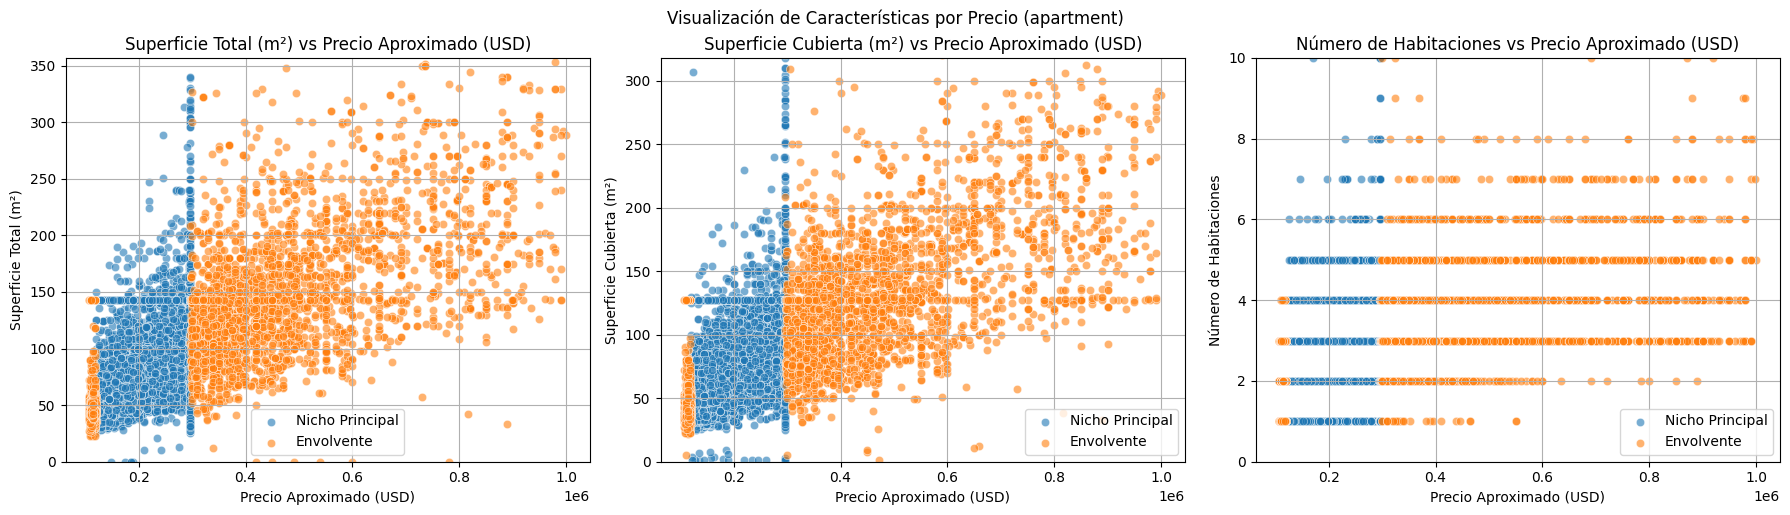

In [ ]:
# @title
# Asegurarse de que las variables necesarias estén definidas
# df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
try:
    df, properties_between_q1_q3_1M
except NameError:
    print("Error: El DataFrame 'df' o 'properties_between_q1_q3_1M' no están definidos. Por favor, ejecuta las celdas anteriores.")
    raise # Detener ejecución si los DataFrames no existen

# Define the 'envolvente' DataFrame if it's not already defined
try:
    df_envolvente
except NameError:
    print("DataFrame 'df_envolvente' no encontrado. Creándolo...")
    # Need q1_1M and q3_1M which should be defined from previous cells (e.g., d9ae441d)
    try:
        q1_1M, q3_1M
    except NameError:
        print("Error: q1_1M o q3_1M no definidos. Por favor, ejecuta las celdas anteriores.")
        raise # Detener ejecución si q1/q3 no están definidos

    # Need just_above_1M_limit which should be defined from previous cells (e.g., 81ba328a)
    try:
        just_above_1M_limit
    except NameError:
        print("Variable 'just_above_1M_limit' no definida. Definiéndola ahora.")
        just_above_1M_limit = 1000000 # Assuming the limit is 1M USD

    # Define the 'envolvente' price ranges as in cell 81ba328a
    buffer_percentage = 0.10
    lower_envolvente_lower_limit = q1_1M * (1 - buffer_percentage) # 10% below Q1
    min_price_overall = df['price_aprox_usd'].min() # Assuming df is available
    lower_envolvente_analysis_min_price = max(min_price_overall, lower_envolvente_lower_limit)


    # Filter for the lower envolvente range
    df_lower_envolvente = df[(df['price_aprox_usd'] >= lower_envolvente_analysis_min_price) & (df['price_aprox_usd'] < q1_1M)].copy()

    # Filter for the upper envolvente range
    df_upper_envolvente = df[(df['price_aprox_usd'] > q3_1M) & (df['price_aprox_usd'] < just_above_1M_limit)].copy()

    # Combine the two DataFrames
    df_envolvente = pd.concat([df_lower_envolvente, df_upper_envolvente])
    print(f"DataFrame 'df_envolvente' creado con {len(df_envolvente)} propiedades.")


# Define the variables used for plotting if they are not defined
try:
    numerical_cols_to_plot_y, y_labels, x_label
except NameError:
    print("Variables de trazado no definidas. Definiéndolas ahora.")
    numerical_cols_to_plot_y = ['surface_total_in_m2', 'surface_covered_in_m2', 'rooms']
    y_labels = ['Superficie Total (m²)', 'Superficie Cubierta (m²)', 'Número de Habitaciones']
    x_label = 'Precio Aproximado (USD)'


prop_type = 'apartment'
print(f"\nAnálisis para Tipo de Propiedad: {prop_type}")

# Filtrar dataframes por tipo de propiedad
niche_prop_type_df = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == prop_type]
envolvente_prop_type_df = df_envolvente[df_envolvente['property_type'] == prop_type]

# Omitir si ambos dataframes están vacíos para este tipo de propiedad
if niche_prop_type_df.empty and envolvente_prop_type_df.empty:
    print(f"  No hay datos para el tipo de propiedad '{prop_type}' en el nicho ni la envolvente.")
else:
    # Create subplots for the three numerical columns in two columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

    for i, col in enumerate(numerical_cols_to_plot_y):
        ax = axes[i] # Select the current subplot axis

        # Graficar datos del Nicho Principal
        if not niche_prop_type_df.empty:
            sns.scatterplot(data=niche_prop_type_df, x='price_aprox_usd', y=col, label='Nicho Principal', alpha=0.6, ax=ax)

        # Datos de Envolvente de Gráfico
        if not envolvente_prop_type_df.empty:
            sns.scatterplot(data=envolvente_prop_type_df, x='price_aprox_usd', y=col, label='Envolvente', alpha=0.6, ax=ax)

        ax.set_title(f'{y_labels[i]} vs {x_label}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])

        # --- Mejora para la distribución del eje Y ---
        # Calcular un límite superior razonable para el eje Y para visualizar mejor la distribución
        # Usar el percentil 99 para las áreas de superficie y un límite fijo para las habitaciones
        if col in ['surface_total_in_m2', 'surface_covered_in_m2']:
            # Combinar datos tanto de nicho como de envolvente para el cálculo de percentiles
            combined_data = pd.concat([niche_prop_type_df[col], envolvente_prop_type_df[col]]).dropna()
            if not combined_data.empty:
                 y_upper_limit = combined_data.quantile(0.99) * 1.1 # Agregar un pequeño búfer
                 ax.set_ylim(0, y_upper_limit) # Establecer el límite del eje Y desde 0 hasta el límite calculado
            else:
                 ax.set_ylim(0, None) # Sin datos, establecer límite predeterminado

        elif col == 'rooms':
            # Establecer un límite superior fijo para las habitaciones, ya que los recuentos de habitaciones extremos son valores atípicos
            ax.set_ylim(0, 10) # Suponiendo que las propiedades en estos segmentos normalmente no excedan las 10 habitaciones

       # --- Fin de la mejora para la distribución del eje Y ---

        ax.legend()
        ax.grid(True)

    plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
    plt.suptitle(f'Visualización de Características por Precio ({prop_type})', y=1.02) # Add a main title for the set of subplots
    plt.show()

#### Tipo de Propiedad: house


Análisis para Tipo de Propiedad: house


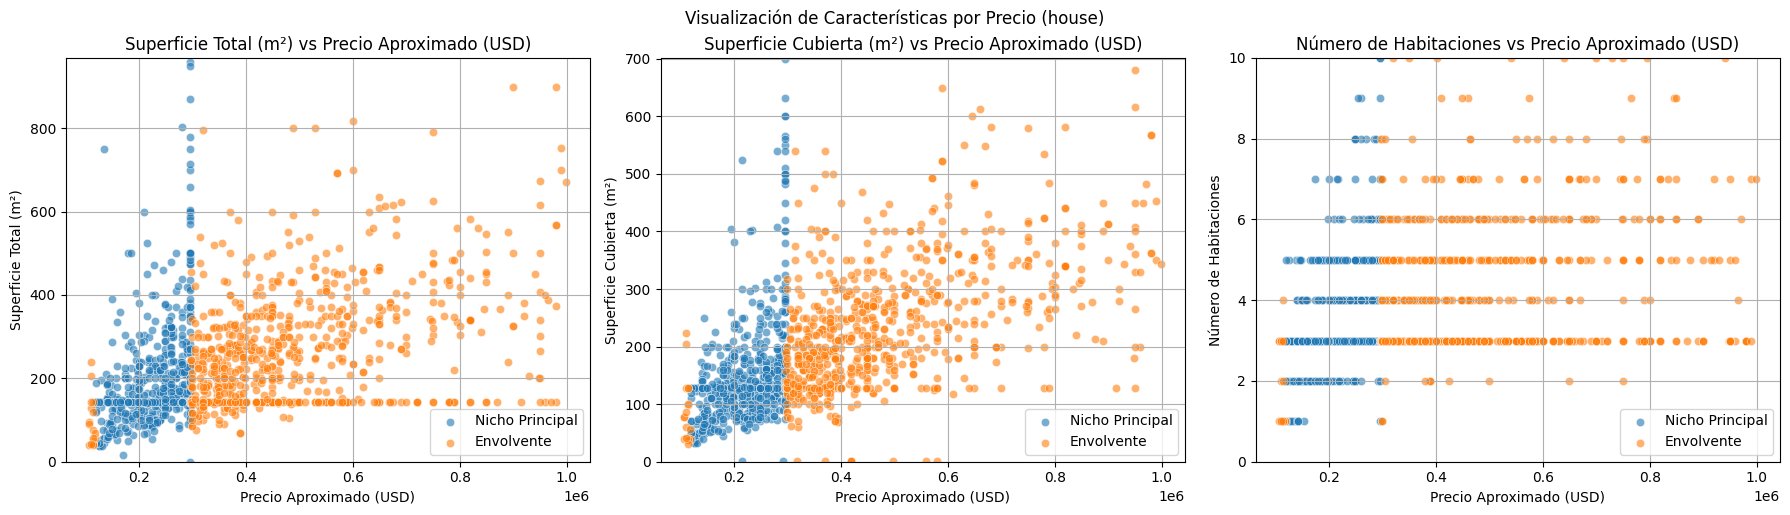

In [ ]:
# @title
# Asegurarse de que las variables necesarias estén definidas
# df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
try:
    df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
except NameError:
    print("Error: Algunas variables necesarias no están definidas. Por favor, ejecuta las celdas anteriores.")
    # Define placeholder variables or raise an error if needed
    # For now, let's assume they are defined from previous execution


prop_type = 'house'
print(f"\nAnálisis para Tipo de Propiedad: {prop_type}")

# Filtrar dataframes por tipo de propiedad
niche_prop_type_df = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == prop_type]
envolvente_prop_type_df = df_envolvente[df_envolvente['property_type'] == prop_type]

# Omitir si ambos dataframes están vacíos para este tipo de propiedad
if niche_prop_type_df.empty and envolvente_prop_type_df.empty:
    print(f"  No hay datos para el tipo de propiedad '{prop_type}' en el nicho ni la envolvente.")
else:
    # Create subplots for the three numerical columns in two columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

    for i, col in enumerate(numerical_cols_to_plot_y):
        ax = axes[i] # Select the current subplot axis

        # Graficar datos del Nicho Principal
        if not niche_prop_type_df.empty:
            sns.scatterplot(data=niche_prop_type_df, x='price_aprox_usd', y=col, label='Nicho Principal', alpha=0.6, ax=ax)

        # Datos de Envolvente de Gráfico
        if not envolvente_prop_type_df.empty:
            sns.scatterplot(data=envolvente_prop_type_df, x='price_aprox_usd', y=col, label='Envolvente', alpha=0.6, ax=ax)

        ax.set_title(f'{y_labels[i]} vs {x_label}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])

        # --- Mejora para la distribución del eje Y ---
        # Calcular un límite superior razonable para el eje Y para visualizar mejor la distribución
        # Usar el percentil 99 para las áreas de superficie y un límite fijo para las habitaciones
        if col in ['surface_total_in_m2', 'surface_covered_in_m2']:
            # Combinar datos tanto de nicho como de envolvente para el cálculo de percentiles
            combined_data = pd.concat([niche_prop_type_df[col], envolvente_prop_type_df[col]]).dropna()
            if not combined_data.empty:
                 y_upper_limit = combined_data.quantile(0.99) * 1.1 # Agregar un pequeño búfer
                 ax.set_ylim(0, y_upper_limit) # Establecer el límite del eje Y desde 0 hasta el límite calculado
            else:
                 ax.set_ylim(0, None) # Sin datos, establecer límite predeterminado

        elif col == 'rooms':
            # Establecer un límite superior fijo para las habitaciones, ya que los recuentos de habitaciones extremos son valores atípicos
            ax.set_ylim(0, 10) # Suponiendo que las propiedades en estos segmentos normalmente no excedan las 10 habitaciones

       # --- Fin de la mejora para la distribución del eje Y ---

        ax.legend()
        ax.grid(True)

    plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
    plt.suptitle(f'Visualización de Características por Precio ({prop_type})', y=1.02) # Add a main title for the set of subplots
    plt.show()

#### Tipo de Propiedad: store


Análisis para Tipo de Propiedad: store


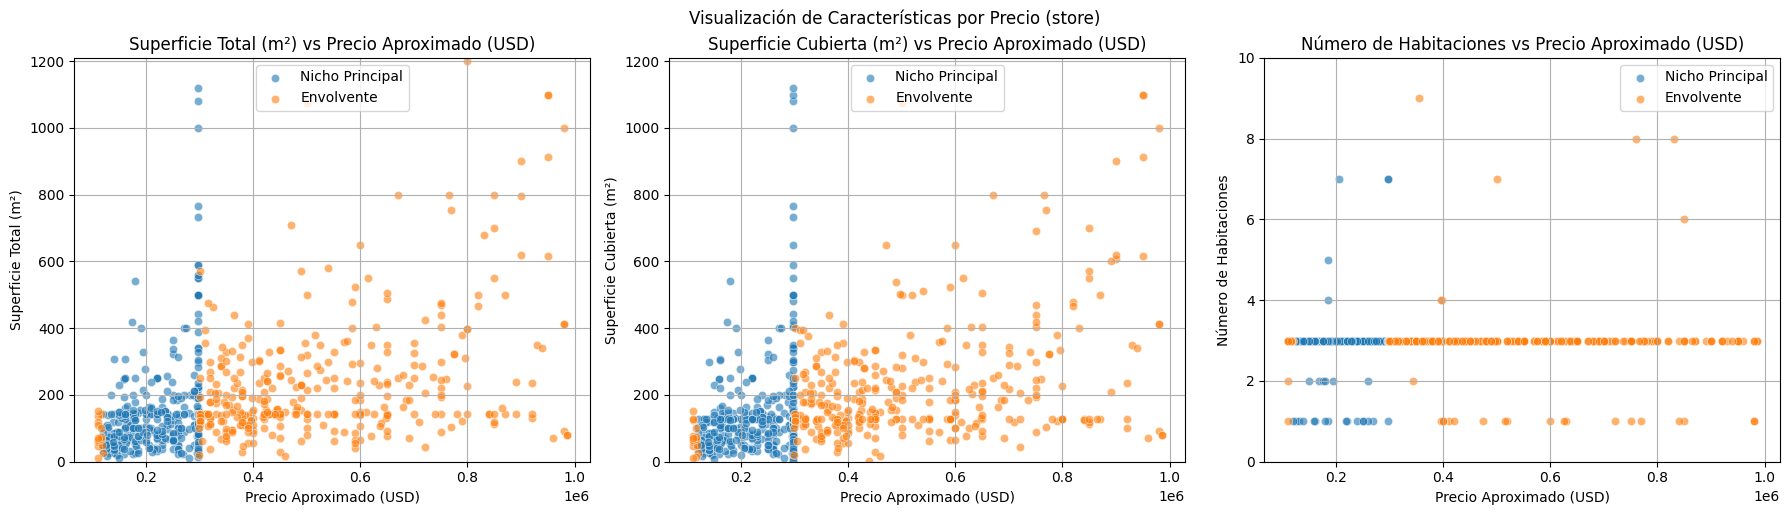

In [ ]:
# @title
# Asegurarse de que las variables necesarias estén definidas
# df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
try:
    df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
except NameError:
    print("Error: Algunas variables necesarias no están definidas. Por favor, ejecuta las celdas anteriores.")
    # Define placeholder variables or raise an error if needed
    # For now, let's assume they are defined from previous execution

prop_type = 'store'
print(f"\nAnálisis para Tipo de Propiedad: {prop_type}")

# Filtrar dataframes por tipo de propiedad
niche_prop_type_df = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == prop_type]
envolvente_prop_type_df = df_envolvente[df_envolvente['property_type'] == prop_type]

# Omitir si ambos dataframes están vacíos para este tipo de propiedad
if niche_prop_type_df.empty and envolvente_prop_type_df.empty:
    print(f"  No hay datos para el tipo de propiedad '{prop_type}' en el nicho ni la envolvente.")
else:
    # Create subplots for the three numerical columns in two columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

    for i, col in enumerate(numerical_cols_to_plot_y):
        ax = axes[i] # Select the current subplot axis

        # Graficar datos del Nicho Principal
        if not niche_prop_type_df.empty:
            sns.scatterplot(data=niche_prop_type_df, x='price_aprox_usd', y=col, label='Nicho Principal', alpha=0.6, ax=ax)

        # Datos de Envolvente de Gráfico
        if not envolvente_prop_type_df.empty:
            sns.scatterplot(data=envolvente_prop_type_df, x='price_aprox_usd', y=col, label='Envolvente', alpha=0.6, ax=ax)

        ax.set_title(f'{y_labels[i]} vs {x_label}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])

        # --- Mejora para la distribución del eje Y ---
        # Calcular un límite superior razonable para el eje Y para visualizar mejor la distribución
        # Usar el percentil 99 para las áreas de superficie y un límite fijo para las habitaciones
        if col in ['surface_total_in_m2', 'surface_covered_in_m2']:
            # Combinar datos tanto de nicho como de envolvente para el cálculo de percentiles
            combined_data = pd.concat([niche_prop_type_df[col], envolvente_prop_type_df[col]]).dropna()
            if not combined_data.empty:
                 y_upper_limit = combined_data.quantile(0.99) * 1.1 # Agregar un pequeño búfer
                 ax.set_ylim(0, y_upper_limit) # Establecer el límite del eje Y desde 0 hasta el límite calculado
            else:
                 ax.set_ylim(0, None) # Sin datos, establecer límite predeterminado

        elif col == 'rooms':
            # Establecer un límite superior fijo para las habitaciones, ya que los recuentos de habitaciones extremos son valores atípicos
            ax.set_ylim(0, 10) # Suponiendo que las propiedades en estos segmentos normalmente no excedan las 10 habitaciones

       # --- Fin de la mejora para la distribución del eje Y ---

        ax.legend()
        ax.grid(True)

    plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
    plt.suptitle(f'Visualización de Características por Precio ({prop_type})', y=1.02) # Add a main title for the set of subplots
    plt.show()

#### Tipo de Propiedad: PH


Análisis para Tipo de Propiedad: PH


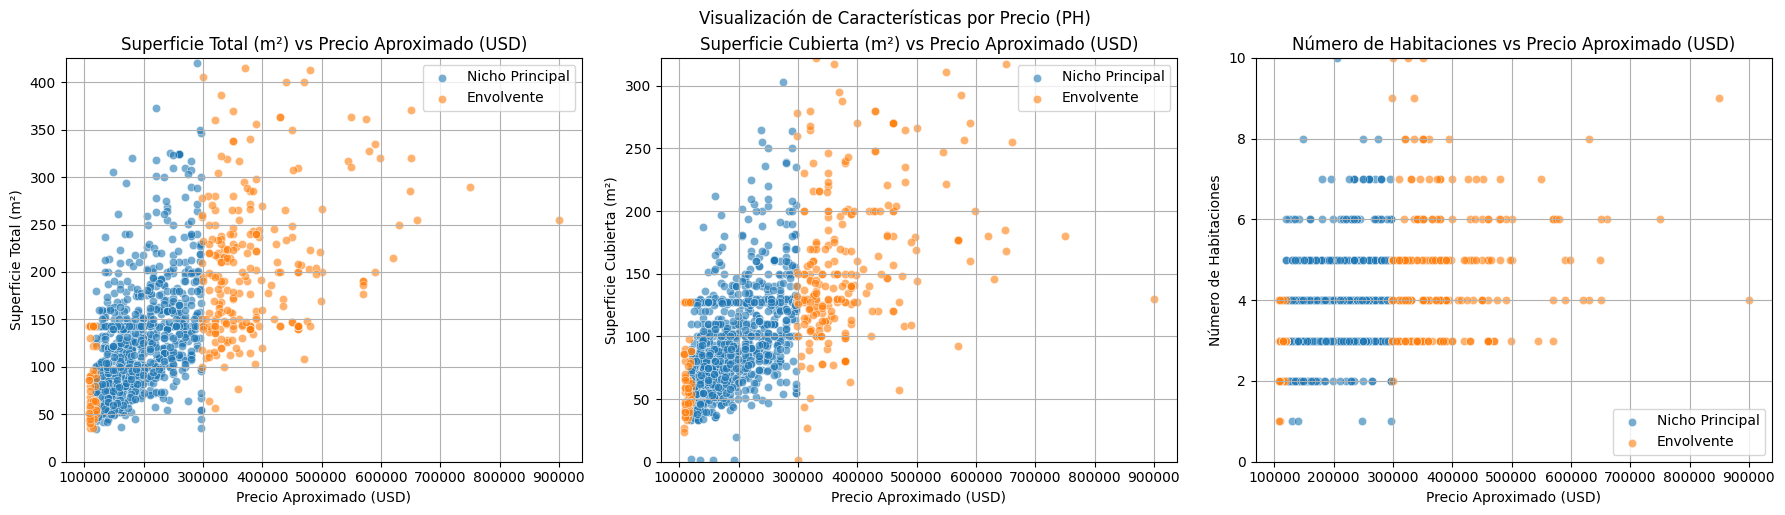

In [ ]:
# @title
# Asegurarse de que las variables necesarias estén definidas
# df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
try:
    df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
except NameError:
    print("Error: Algunas variables necesarias no están definidas. Por favor, ejecuta las celdas anteriores.")
    # Define placeholder variables or raise an error if needed
    # For now, let's assume they are defined from previous execution


prop_type = 'PH'
print(f"\nAnálisis para Tipo de Propiedad: {prop_type}")

# Filtrar dataframes por tipo de propiedad
niche_prop_type_df = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == prop_type]
envolvente_prop_type_df = df_envolvente[df_envolvente['property_type'] == prop_type]

# Omitir si ambos dataframes están vacíos para este tipo de propiedad
if niche_prop_type_df.empty and envolvente_prop_type_df.empty:
    print(f"  No hay datos para el tipo de propiedad '{prop_type}' en el nicho ni la envolvente.")
else:
    # Create subplots for the three numerical columns in two columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

    for i, col in enumerate(numerical_cols_to_plot_y):
        ax = axes[i] # Select the current subplot axis

        # Graficar datos del Nicho Principal
        if not niche_prop_type_df.empty:
            sns.scatterplot(data=niche_prop_type_df, x='price_aprox_usd', y=col, label='Nicho Principal', alpha=0.6, ax=ax)

        # Datos de Envolvente de Gráfico
        if not envolvente_prop_type_df.empty:
            sns.scatterplot(data=envolvente_prop_type_df, x='price_aprox_usd', y=col, label='Envolvente', alpha=0.6, ax=ax)

        ax.set_title(f'{y_labels[i]} vs {x_label}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])

        # --- Mejora para la distribución del eje Y ---
        # Calcular un límite superior razonable para el eje Y para visualizar mejor la distribución
        # Usar el percentil 99 para las áreas de superficie y un límite fijo para las habitaciones
        if col in ['surface_total_in_m2', 'surface_covered_in_m2']:
            # Combinar datos tanto de nicho como de envolvente para el cálculo de percentiles
            combined_data = pd.concat([niche_prop_type_df[col], envolvente_prop_type_df[col]]).dropna()
            if not combined_data.empty:
                 y_upper_limit = combined_data.quantile(0.99) * 1.1 # Agregar un pequeño búfer
                 ax.set_ylim(0, y_upper_limit) # Establecer el límite del eje Y desde 0 hasta el límite calculado
            else:
                 ax.set_ylim(0, None) # Sin datos, establecer límite predeterminado

        elif col == 'rooms':
            # Establecer un límite superior fijo para las habitaciones, ya que los recuentos de habitaciones extremos son valores atípicos
            ax.set_ylim(0, 10) # Suponiendo que las propiedades en estos segmentos normalmente no excedan las 10 habitaciones

       # --- Fin de la mejora para la distribución del eje Y ---

        ax.legend()
        ax.grid(True)

    plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
    plt.suptitle(f'Visualización de Características por Precio ({prop_type})', y=1.02) # Add a main title for the set of subplots
    plt.show()

### Conclusión del Análisis del Nicho Principal (Apartamentos):

**El análisis de correlación y las visualizaciones dentro del nicho principal (apartamentos entre ~120.000 y ~296.000 USD) muestran que las superficies (total y cubierta) tienen una correlación muy débil con el precio. La cantidad de habitaciones presenta una correlación débil a moderada. Esto sugiere que, si bien hay una ligera tendencia a que los apartamentos más grandes o con más habitaciones sean un poco más caros en este rango, otros factores no incluidos en este análisis (ubicación exacta, estado, antigüedad, etc.) probablemente tienen una influencia mucho mayor en la determinación del precio en este segmento.**

### 6.7 Análisis de Relación entre Precios y Superficies por Tipo de Propiedad

Se examina la relación entre precios por m2 y superficies (cubierta y total), tomando la media del precio promedio por m² por tipo de propiedad.

Precio promedio por m² (Cubierta vs Total) por Tipo de Propiedad:


property_type  price_usd_per_m2_covered  price_usd_per_m2_total
0            PH               2842.576457             1794.391065
1     apartment               3427.354953             2820.425661
2         house               4752.102236             2013.512985
3         store               3476.687087             3006.147328

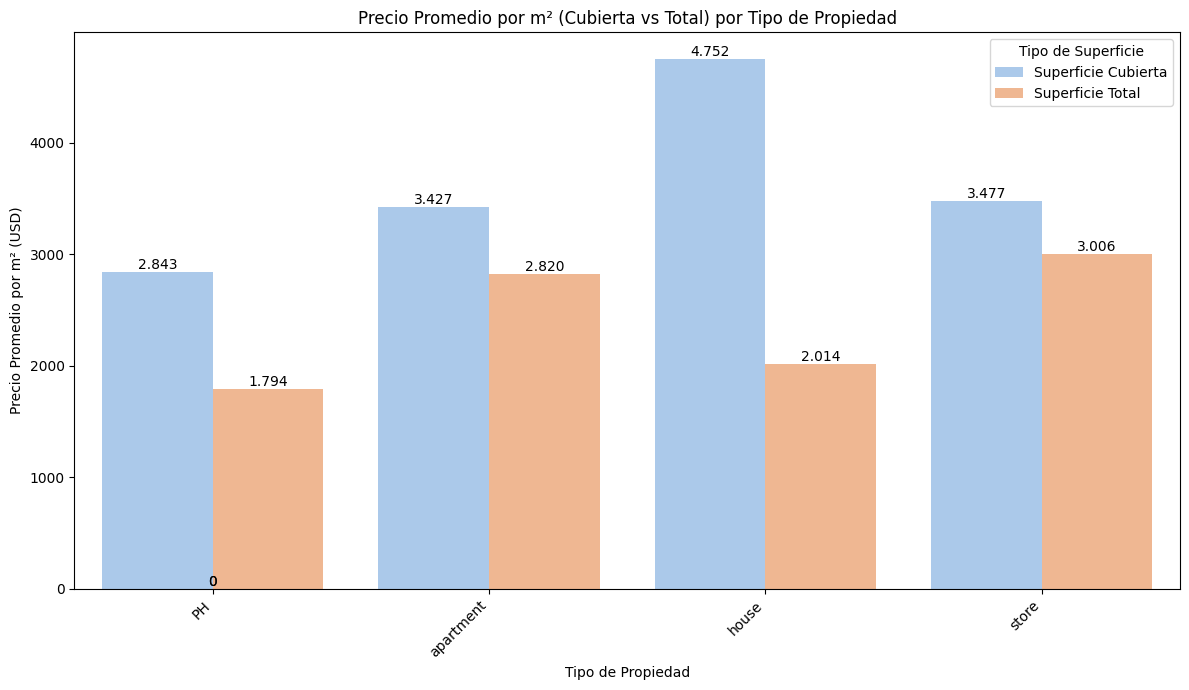

In [ ]:
# @title
# Calcular el precio promedio por m2 para superficie cubierta y total por tipo de propiedad
# Manejar casos donde la superficie sea cero para evitar división por cero
df_cleaned_price_per_m2 = df.copy()
df_cleaned_price_per_m2['price_usd_per_m2_covered'] = df_cleaned_price_per_m2.apply(
    lambda row: row['price_aprox_usd'] / row['surface_covered_in_m2'] if row['surface_covered_in_m2'] > 0 else None, axis=1
)
df_cleaned_price_per_m2['price_usd_per_m2_total'] = df_cleaned_price_per_m2.apply(
    lambda row: row['price_aprox_usd'] / row['surface_total_in_m2'] if row['surface_total_in_m2'] > 0 else None, axis=1
)

# calcular la media del precio por m2 para superficie cubierta y total por tipo de propiedad
price_per_m2_summary = df_cleaned_price_per_m2.groupby('property_type')[['price_usd_per_m2_covered', 'price_usd_per_m2_total']].mean().reset_index()

# 'derretir' los datos para el gráfico de barras agrupadas
price_per_m2_melted = price_per_m2_summary.melt(
    id_vars='property_type',
    value_vars=['price_usd_per_m2_covered', 'price_usd_per_m2_total'],
    var_name='surface_type',
    value_name='mean_price_usd_per_m2'
)

# mapear nombres de superficie para mejor visualización
price_per_m2_melted['surface_type'] = price_per_m2_melted['surface_type'].replace({
    'price_usd_per_m2_covered': 'Superficie Cubierta',
    'price_usd_per_m2_total': 'Superficie Total'
})

print("Precio promedio por m² (Cubierta vs Total) por Tipo de Propiedad:")
display(price_per_m2_summary)

# crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='property_type', y='mean_price_usd_per_m2', hue='surface_type', data=price_per_m2_melted, palette='pastel')
plt.title('Precio Promedio por m² (Cubierta vs Total) por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio Promedio por m² (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Superficie')
plt.tight_layout()

# agregar etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}'.replace(',', '.'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Conclusión de Relaciones entre Precios y Superficies por Tipo de Propiedad:

**El análisis del precio promedio por m² por tipo de propiedad revela diferencias significativas. Generalmente, el precio por m² cubierto es mayor que el precio por m² total, lo cual es esperable. La comparación entre tipos de propiedad muestra variaciones en el valor por m², lo que puede indicar diferencias en la demanda, costos de construcción o características típicas de cada tipo en esta ubicación. Es importante notar que el cálculo del precio por m² original (`price_usd_per_m2`) en el dataset podría tener inconsistencias, por lo que calcularlo a partir del precio total y las superficies (cubierta y total) proporciona una métrica más confiable.**

### 6.8 Visualización Geoespacial

Utilizamos las coordenadas geográficas (latitud y longitud) para visualizar las propiedades en un mapa interactivo, destacando la ubicación del nicho principal de mercado y los valores atípicos de alto precio.

In [ ]:
# @title
import folium
from folium.plugins import MarkerCluster

# Asegurarse de que los DataFrames necesarios estén definidos:
# df (DataFrame completo)
# price_outliers_df (Outliers de precio)
# properties_between_q1_q3_1M (Nicho principal)

# Verificar si los DataFrames existen, si no, intentar crearlos (requiere df, q1_1M, q3_1M, filtered_df_less_1M)
try:
    price_outliers_df
except NameError:
    print("DataFrame 'price_outliers_df' no encontrado. Creándolo...")
    # Recalcular si es necesario (requiere df)
    try:
        df
    except NameError:
        print("Error: DataFrame 'df' no encontrado.")
        raise # Detener ejecución si df no existe

    # Recalcular Q3 y IQR para price_aprox_usd si no están definidos
    try:
        Q3_price, IQR_price
    except NameError:
        print("Q3_price o IQR_price no definidos. Calculándolos...")
        Q1_price = df['price_aprox_usd'].quantile(0.25)
        Q3_price = df['price_aprox_usd'].quantile(0.75)
        IQR_price = Q3_price - Q1_price

    upper_bound_price = Q3_price + 1.5 * IQR_price
    price_outliers_df = df[df['price_aprox_usd'] > upper_bound_price].copy()
    print(f"Creado 'price_outliers_df' con {len(price_outliers_df)} propiedades.")


try:
    properties_between_q1_q3_1M
except NameError:
    print("DataFrame 'properties_between_q1_q3_1M' no encontrado. Creándolo...")
    # Recalcular si es necesario (requiere df, q1_1M, q3_1M, filtered_df_less_1M)
    try:
        df
    except NameError:
        print("Error: DataFrame 'df' no encontrado.")
        raise

    try:
        q1_1M, q3_1M
    except NameError:
         print("q1_1M o q3_1M no definidos. Calculándolos (requiere filtered_df_less_1M)...")
         try:
             filtered_df_less_1M
         except NameError:
             print("DataFrame 'filtered_df_less_1M' no encontrado. Creándolo (requiere df)...")
             filtered_df_less_1M = df[df['price_aprox_usd'] < 1000000].copy()

         q1_1M = filtered_df_less_1M['price_aprox_usd'].quantile(0.25)
         q3_1M = filtered_df_less_1M['price_aprox_usd'].quantile(0.75)


    properties_between_q1_q3_1M = filtered_df_less_1M[(filtered_df_less_1M['price_aprox_usd'] >= q1_1M) & (filtered_df_less_1M['price_aprox_usd'] <= q3_1M)].copy()
    print(f"Creado 'properties_between_q1_q3_1M' con {len(properties_between_q1_q3_1M)} propiedades.")


# Crear un mapa base centrado en la media de lat/lon del dataset
map_center = [df['lat'].mean(), df['lon'].mean()]
properati_map = folium.Map(location=map_center, zoom_start=12)

# Crear capas de marcadores
mc_all = MarkerCluster(name='Todas las Propiedades').add_to(properati_map)
mc_niche = MarkerCluster(name='Nicho Principal').add_to(properati_map)
mc_outliers = MarkerCluster(name='Outliers de Precio').add_to(properati_map)


# Añadir marcadores para todas las propiedades (capa base)
for idx, row in df.iterrows():
    if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        popup_text = f"Tipo: {row['property_type']}<br>Precio: {row['price_aprox_usd']:,.0f} USD<br>Superficie Total: {row['surface_total_in_m2']:,.0f} m²"
        folium.Marker([row['lat'], row['lon']], popup=popup_text).add_to(mc_all)

# Añadir marcadores para propiedades del nicho principal (capa específica)
for idx, row in properties_between_q1_q3_1M.iterrows():
     if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        popup_text = f"Tipo: {row['property_type']}<br>Precio: {row['price_aprox_usd']:,.0f} USD<br>Superficie Total: {row['surface_total_in_m2']:,.0f} m²"
        folium.Marker([row['lat'], row['lon']], popup=popup_text, icon=folium.Icon(color='green')).add_to(mc_niche)


# Añadir marcadores para outliers de precio (capa específica)
for idx, row in price_outliers_df.iterrows():
     if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        popup_text = f"Tipo: {row['property_type']}<br>Precio: {row['price_aprox_usd']:,.0f} USD<br>Superficie Total: {row['surface_total_in_m2']:,.0f} m²"
        folium.Marker([row['lat'], row['lon']], popup=popup_text, icon=folium.Icon(color='red')).add_to(mc_outliers)

# Añadir control de capas al mapa
folium.LayerControl().add_to(properati_map)

# Mostrar el mapa
print("Mapa de Propiedades:")
display(properati_map)

Output hidden; open in https://colab.research.google.com to view.

### 6.9 Análisis de Precios por Ubicación Geográfica (análisis por comunas)

Investigamos cómo el precio de las propiedades y el precio por metro cuadrado varían en función de su ubicación geográfica, utilizando la información de la columna `place_with_parent_names`. Analizaremos diferentes niveles de granularidad de la ubicación para identificar patrones de precio a nivel de ciudad, barrio o sub-área.

In [ ]:
# @title
# Función para extraer un nivel específico de la jerarquía de ubicación
def extract_location_level(place_string, level):
    if isinstance(place_string, str):
        parts = [part for part in place_string.split('|') if part]
        if len(parts) > level:
            return parts[level]
    return 'Desconocido'

# Extraer diferentes niveles de ubicación
# Nivel 0: País (Argentina)
# Nivel 1: Provincia/Estado (Capital Federal)
# Nivel 2: Ciudad/Barrio principal (Ej: Palermo, Belgrano)
# Nivel 3: Sub-área/Barrio más granular (Ej: Palermo Soho, Palermo Viejo) - si existe

# Asegurarse de que el DataFrame df esté disponible
try:
    df
except NameError:
    print("Error: DataFrame 'df' no encontrado. Por favor, carga los datos primero.")
    raise # Detener ejecución si df no existe


df_location_analysis = df.copy()

# Extraer niveles de interés (ajustar los niveles según la estructura real de los datos)
# Basándonos en la visualización de df.head(), parece que Capital Federal es el Nivel 1
# y el Barrio principal es el Nivel 2, y la sub-área el Nivel 3.

df_location_analysis['city'] = df_location_analysis['place_with_parent_names'].apply(lambda x: extract_location_level(x, 1)) # Capital Federal
df_location_analysis['main_neighborhood'] = df_location_analysis['place_with_parent_names'].apply(lambda x: extract_location_level(x, 2)) # Barrio principal
df_location_analysis['sub_neighborhood'] = df_location_analysis['place_with_parent_names'].apply(lambda x: extract_location_level(x, 3)) # Sub-área (si existe)


# Calcular el precio promedio y el precio promedio por m2 (cubierto y total) por nivel de ubicación
# Asegurarse de que las columnas de precio y superficie sean numéricas
numerical_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2']
for col in numerical_cols:
    if col not in df_location_analysis.select_dtypes(include=np.number).columns:
        print(f"Advertencia: La columna '{col}' no es numérica. Saltando cálculo de promedios.")
        # Opcional: intentar convertirla si fuera necesario
        # df_location_analysis[col] = pd.to_numeric(df_location_analysis[col], errors='coerce')


# Recalcular price_usd_per_m2_covered y price_usd_per_m2_total si no existen o para asegurar consistencia
# Manejar división por cero
df_location_analysis['price_usd_per_m2_covered'] = df_location_analysis.apply(
    lambda row: row['price_aprox_usd'] / row['surface_covered_in_m2'] if row['surface_covered_in_m2'] > 0 and pd.notnull(row['price_aprox_usd']) and pd.notnull(row['surface_covered_in_m2']) else None, axis=1
)
df_location_analysis['price_usd_per_m2_total'] = df_location_analysis.apply(
    lambda row: row['price_aprox_usd'] / row['surface_total_in_m2'] if row['surface_total_in_m2'] > 0 and pd.notnull(row['price_aprox_usd']) and pd.notnull(row['surface_total_in_m2']) else None, axis=1
)


# Analizar por el nivel de "Barrio principal"
print("\nAnálisis de Precio Promedio por Barrio Principal:")
price_by_main_neighborhood = df_location_analysis.groupby('main_neighborhood')[['price_aprox_usd', 'price_usd_per_m2_covered', 'price_usd_per_m2_total']].mean()
display(price_by_main_neighborhood.sort_values(by='price_aprox_usd', ascending=False).head(20)) # Mostrar top 20 por precio total

# Analizar por el nivel de "Sub-área" (si es diferente del barrio principal y tiene suficientes datos)
print("\nAnálisis de Precio Promedio por Sub-área (si aplica y hay suficientes datos):")
# Filtrar sub-áreas que no sean el mismo que el barrio principal y que tengan suficientes registros
sub_neighborhood_counts = df_location_analysis['sub_neighborhood'].value_counts()
min_properties_sub = 10 # Mínimo de propiedades para considerar la sub-área

relevant_sub_neighborhoods = sub_neighborhood_counts[sub_neighborhood_counts >= min_properties_sub].index
# Excluir casos donde sub_neighborhood es igual a main_neighborhood o 'Desconocido'
relevant_sub_neighborhoods = [sub for sub in relevant_sub_neighborhoods if sub != 'Desconocido' and sub not in df_location_analysis['main_neighborhood'].unique()]


if relevant_sub_neighborhoods:
     # Filtrar el DataFrame para incluir solo las sub-áreas relevantes
    df_relevant_sub = df_location_analysis[df_location_analysis['sub_neighborhood'].isin(relevant_sub_neighborhoods)].copy()

    price_by_sub_neighborhood = df_relevant_sub.groupby('sub_neighborhood')[['price_aprox_usd', 'price_usd_per_m2_covered', 'price_usd_per_m2_total']].mean()
    display(price_by_sub_neighborhood.sort_values(by='price_aprox_usd', ascending=False).head(20)) # Mostrar top 20 por precio total
else:
    print("No hay suficientes sub-áreas distintas del barrio principal con suficientes propiedades para analizar.")


Análisis de Precio Promedio por Barrio Principal:


price_aprox_usd  price_usd_per_m2_covered  \
main_neighborhood                                              
Puerto Madero        829665.237147               6351.131855   
Recoleta             466882.386605               3947.934780   
Belgrano             426401.208104               3920.395375   
Palermo              421419.601139               4175.706387   
Vicente López        384500.000000               2007.170215   
Retiro               380508.400990               3225.795320   
San Isidro           380000.000000               1583.333333   
Nuñez                360980.443266               4187.074625   
Las Cañitas          352696.191908               6151.360661   
Barrio Norte         321639.602728               3859.771571   
Villa Devoto         306474.620264               6182.849379   
Morón                296355.854625               2324.520612   
Villa Soldati        296335.817736               1050.454998   
Chacarita            293287.715954               2797.575086   
Desconocido          289654.835404               2475.975396   
Parque Avellaneda    282092.034741               1963.580883   
Villa Santa Rita     272586.832681               4201.124800   
Barracas             272580.339448               2453.282773   
Villa Real           254029.654552               2183.234326   
Villa Urquiza        252624.373355               7097.394745   

                   price_usd_per_m2_total  
main_neighborhood                          
Puerto Madero                 5822.182990  
Recoleta                      3365.086640  
Belgrano                      3284.157930  
Palermo                       3565.182305  
Vicente López                 1356.890705  
Retiro                        3088.541529  
San Isidro                    2661.348485  
Nuñez                         3030.763213  
Las Cañitas                   3343.516372  
Barrio Norte                  3084.997247  
Villa Devoto                  2285.277142  
Morón                         2075.542644  
Villa Soldati                 2184.564740  
Chacarita                     2282.203425  
Desconocido                   2080.137418  
Parque Avellaneda             1834.571479  
Villa Santa Rita              2051.736381  
Barracas                      2461.532192  
Villa Real                    2330.768427  
Villa Urquiza                 2827.914506


Análisis de Precio Promedio por Sub-área (si aplica y hay suficientes datos):


price_aprox_usd  price_usd_per_m2_covered  \
sub_neighborhood                                               
Palermo Chico         1.056987e+06               5332.846251   
Palermo Viejo         3.876326e+05               4033.061885   
Palermo Hollywood     2.728793e+05               4211.111366   
Palermo Soho          2.710503e+05               3290.874199   
San Martín            1.308972e+05               1518.338651   

                   price_usd_per_m2_total  
sub_neighborhood                           
Palermo Chico                 4803.151746  
Palermo Viejo                 2980.220534  
Palermo Hollywood             3644.297644  
Palermo Soho                  2995.832660  
San Martín                    1129.518011

Al observar las tablas de precios promedio por **Barrio Principal**, podemos destacar lo siguiente:

* **Los barrios más caros: Puerto Madero** se destaca significativamente como el barrio con el precio promedio más alto, tanto en precio total como en precio por m² cubierto y total. Otros barrios con precios promedio altos incluyen Recoleta, Belgrano, Palermo y Nuñez. Esto confirma que las ubicaciones más céntricas o consideradas de mayor prestigio tienen precios más elevados.
* **Los barrios con precios más bajos:** En el otro extremo, barrios como Villa Soldati, Villa Riachuelo, Mataderos, Balvanera o Constitución parecen tener precios promedio significativamente más bajos.
* **Variación del precio por m²:** Es interesante notar cómo varía la relación entre el precio por m² cubierto y total entre barrios. Algunos barrios pueden tener precios por m² cubierto muy altos (como Villa Urquiza o Las Cañitas, aunque su precio total promedio no sea el más alto), lo que podría indicar diferencias en el tipo de propiedades (quizás apartamentos más pequeños pero muy bien ubicados) o en la proporción de superficie cubierta frente a la total.

Respecto al análisis por **Sub-área** (considerando solo las que tienen suficientes datos y son distintas del barrio principal):

Vemos que dentro de barrios grandes como Palermo, existen sub-áreas con precios promedio diferentes. Por ejemplo, **Palermo Chico** muestra un precio promedio significativamente más alto que Palermo Hollywood, Palermo Soho o Palermo Viejo. Esto subraya la importancia de la micro-ubicación incluso dentro de un mismo barrio principal.
Otras sub-áreas como San Martín (dentro de Bs.As. G.B.A. Zona Norte) muestran precios promedio más bajos, lo cual es esperable al compararlas con sub-áreas de Capital Federal.

### Conclusiones general de los anñalisis de mercados y del nicho

Al observar las tablas de precios promedio por **Barrio Principal**, podemos destacar lo siguiente:

* **Los barrios más caros: Puerto Madero** se destaca significativamente como el barrio con el precio promedio más alto, tanto en precio total como en precio por m² cubierto y total. Otros barrios con precios promedio altos incluyen Recoleta, Belgrano, Palermo y Nuñez. Esto confirma que las ubicaciones más céntricas o consideradas de mayor prestigio tienen precios más elevados.
* **Los barrios con precios más bajos:** En el otro extremo, barrios como Villa Soldati, Villa Riachuelo, Mataderos, Balvanera o Constitución parecen tener precios promedio significativamente más bajos.
* **Variación del precio por m²:** Es interesante notar cómo varía la relación entre el precio por m² cubierto y total entre barrios. Algunos barrios pueden tener precios por m² cubierto muy altos (como Villa Urquiza o Las Cañitas, aunque su precio total promedio no sea el más alto), lo que podría indicar diferencias en el tipo de propiedades (quizás apartamentos más pequeños pero muy bien ubicados) o en la proporción de superficie cubierta frente a la total.

Respecto al análisis por **Sub-área** (considerando solo las que tienen suficientes datos y son distintas del barrio principal):

Vemos que dentro de barrios grandes como Palermo, existen sub-áreas con precios promedio diferentes. Por ejemplo, **Palermo Chico** muestra un precio promedio significativamente más alto que Palermo Hollywood, Palermo Soho o Palermo Viejo. Esto subraya la importancia de la micro-ubicación incluso dentro de un mismo barrio principal.
Otras sub-áreas como San Martín (dentro de Bs.As. G.B.A. Zona Norte) muestran precios promedio más bajos, lo cual es esperable al compararlas con sub-áreas de Capital Federal.

## 7. Confirmación de los hallazgos con "envolvente":

Aplicar la técnica de la envolvente para analizar las propiedades que se encuentran en los límites del nicho de mercado principal identificado en el análisis de precios de propiedades.

### Definir los límites de la "envolvente"

Aclarar qué rangos de precios o características específicas constituyen la 'envolvente' que deseas analizar (por ejemplo, propiedades justo por encima/debajo del nicho principal, o las propiedades atípicas mismas).

**Razonamiento:** Definir los rangos de precios para el "envolvente" con base en el nicho principal identificado (propiedades entre Q1 y Q3 del subconjunto de menos de 1 millón de USD). Definiremos el "envolvente" como propiedades ligeramente fuera de estos límites del primer y tercer trimestre. También aclararemos si los valores atípicos de precios previamente identificados se considerarán por separado o como parte de un conjunto de alto valor.

In [ ]:
# @title
# Access the previously calculated Q1 and Q3 for the < 1M USD subset
# These were calculated in cell d9ae441d and used in cell 0e391e58 and 5283e1ad
try:
    q1_1M, q3_1M
except NameError:
    print("Error: q1_1M or q3_1M are not defined. Please execute previous cells (up to 6.1) first.")
    # Define placeholder values or raise an error if needed
    q1_1M = df[df['price_aprox_usd'] < 1000000]['price_aprox_usd'].quantile(0.25)
    q3_1M = df[df['price_aprox_usd'] < 1000000]['price_aprox_usd'].quantile(0.75)
    print("q1_1M and q3_1M were not defined, calculated them now.")


# Define the 'envolvente' price ranges
# Let's consider a 10% buffer around the Q1 and Q3 of the main niche
buffer_percentage = 0.10

lower_envolvente_upper_limit = q1_1M
lower_envolvente_lower_limit = q1_1M * (1 - buffer_percentage) # 10% below Q1

upper_envolvente_lower_limit = q3_1M
upper_envolvente_upper_limit = q3_1M * (1 + buffer_percentage) # 10% above Q3

# Also consider properties just above the upper limit of the < 1M subset but not outliers
just_above_1M_limit = 1000000
upper_envolvente_price_outlier_threshold = upper_bound_price # Use the outlier threshold from cell 94758b6b

# Define the 'envolvente' as properties in these ranges:
# 1. Below the lower limit of the main niche (but above a reasonable minimum price)
# 2. Above the upper limit of the main niche, up to the outlier threshold
# 3. Properties with price outliers (already identified in price_outliers_df) will be considered a separate "high-value segment" rather than part of this immediate 'envolvente' around the main niche.

print(f"Defining 'envolvente' around the main niche ({q1_1M:,.0f} - {q3_1M:,.0f} USD) for properties < 1M USD:".replace(',', '.'))
print(f"  Lower Envolvente Range: Below {q1_1M:,.0f} USD (considering properties down to {lower_envolvente_lower_limit:,.0f} USD or a reasonable minimum)".replace(',', '.'))
print(f"  Upper Envolvente Range: Above {q3_1M:,.0f} USD and below 1,000,000 USD".replace(',', '.'))
print(f"  High-Value Segment (Outliers): Above {upper_envolvente_price_outlier_threshold:,.0f} USD".replace(',', '.'))

# Note: We need to decide on a reasonable minimum price for the lower envolvente.
# Let's use the minimum price in the dataset as a lower bound for the lower envolvente analysis.
min_price_overall = df['price_aprox_usd'].min()
print(f"  Overall Minimum Price in Dataset: {min_price_overall:,.0f} USD".replace(',', '.'))

lower_envolvente_analysis_min_price = max(min_price_overall, lower_envolvente_lower_limit)
print(f"  Effective Lower Envolvente Analysis Range: {lower_envolvente_analysis_min_price:,.0f} - {q1_1M:,.0f} USD".replace(',', '.'))
print(f"  Effective Upper Envolvente Analysis Range: {q3_1M:,.0f} - {just_above_1M_limit:,.0f} USD".replace(',', '.'))
print(f"  High-Value Segment (Outliers) Analysis Range: Above {upper_envolvente_price_outlier_threshold:,.0f} USD".replace(',', '.'))

# The ranges for the 'envolvente' are now clarified:
# 1. Properties with price_aprox_usd between lower_envolvente_analysis_min_price and q1_1M (inclusive of lower, exclusive of upper)
# 2. Properties with price_aprox_usd between q3_1M and just_above_1M_limit (exclusive of lower, exclusive of upper)
# The price outliers (price_outliers_df) are a separate segment.

Defining 'envolvente' around the main niche (120.000 - 296.356 USD) for properties < 1M USD:
  Lower Envolvente Range: Below 120.000 USD (considering properties down to 108.000 USD or a reasonable minimum)
  Upper Envolvente Range: Above 296.356 USD and below 1.000.000 USD
  High-Value Segment (Outliers): Above 562.500 USD
  Overall Minimum Price in Dataset: 5.043 USD
  Effective Lower Envolvente Analysis Range: 108.000 - 120.000 USD
  Effective Upper Envolvente Analysis Range: 296.356 - 1.000.000 USD
  High-Value Segment (Outliers) Analysis Range: Above 562.500 USD


### Analizar propiedades dentro de la envolvente

Filtrar el DataFrame para seleccionar las propiedades que caen dentro de los límites definidos de la 'envolvente'.

**Razonamiento:** filtrar el DataFrame para seleccionar propiedades dentro de los rangos envolventes inferior y superior definidos.


In [ ]:
# @title
# Filter for the lower envolvente range
df_lower_envolvente = df[(df['price_aprox_usd'] >= lower_envolvente_analysis_min_price) & (df['price_aprox_usd'] < q1_1M)].copy()

# Filter for the upper envolvente range
df_upper_envolvente = df[(df['price_aprox_usd'] > q3_1M) & (df['price_aprox_usd'] < just_above_1M_limit)].copy()

# Combine the two DataFrames
df_envolvente = pd.concat([df_lower_envolvente, df_upper_envolvente])

# Print the number of properties in the combined DataFrame
print(f"Number of properties in the 'envolvente' DataFrame: {len(df_envolvente)}")

# Display the first few rows of the envolvente DataFrame
print("\nFirst 5 rows of the 'envolvente' DataFrame:")
display(df_envolvente.head())

Number of properties in the 'envolvente' DataFrame: 5067

First 5 rows of the 'envolvente' DataFrame:


property_type                            place_with_parent_names  \
8           store                |Argentina|Capital Federal|Palermo|   
31      apartment                |Argentina|Capital Federal|Palermo|   
139     apartment           |Argentina|Capital Federal|Barrio Norte|   
172     apartment  |Argentina|Capital Federal|Palermo|Palermo Hol...   
409     apartment                |Argentina|Capital Federal|Palermo|   

           lat        lon  price_aprox_usd  surface_total_in_m2  \
8   -34.595609 -58.424764        110000.00                 48.0   
31  -34.571150 -58.423297        119124.77                 40.0   
139 -34.594619 -58.416449        110000.00                 49.0   
172 -34.578007 -58.432977        110000.00                 33.0   
409 -34.578644 -58.413039        118000.00                 39.0   

     surface_covered_in_m2  price_usd_per_m2  rooms   barrio  comuna  \
8                     48.0       2291.666667      3  PALERMO    14.0   
31                    36.0       2978.119250      1  PALERMO    14.0   
139                   41.0       2244.897959      2  PALERMO    14.0   
172                   30.0       3333.333333      1  PALERMO    14.0   
409                   39.0       3025.641026      1  PALERMO    14.0   

     covered_to_total_ratio  cluster_label  anomaly_score  anomaly_label  \
8                  1.000000              2       0.135728              1   
31                 0.900000              1       0.087964              1   
139                0.836735              2       0.129836              1   
172                0.909091              1       0.092000              1   
409                1.000000              1       0.094359              1   

     room_density  
8        0.062500  
31       0.027778  
139      0.048780  
172      0.033333  
409      0.025641

### Caracterizar las propiedades de la envolvente

Realizar un análisis descriptivo sobre las propiedades dentro de la 'envolvente', examinando sus características clave (tipo de propiedad, tamaño, número de habitaciones, ubicación, precio por m², etc.) para comprender las diferencia del nicho principal.

**Razonamiento**:
Calcular y mostrar estadísticas descriptivas y la distribución de tipos de propiedades y ubicaciones granulares para las propiedades en el DataFrame `df_envolvente`.

In [ ]:
# @title
# 1. Calcular y mostrar estadísticas descriptivas para columnas numéricas
numerical_features_envolvente_analysis = [
    'price_aprox_usd',
    'surface_total_in_m2',
    'surface_covered_in_m2',
    'price_usd_per_m2',
    'rooms',
    'room_density' # Incluir la característica room_density creada anteriormente
]

print("Estadísticas Descriptivas de Características Numéricas en la 'Envolvente':")
display(df_envolvente[numerical_features_envolvente_analysis].describe())

# 2. Calcular y mostrar la distribución de property_type
print("\nDistribución de Tipos de Propiedad en la 'Envolvente':")
display(df_envolvente['property_type'].value_counts())

# 3. Analizar la distribución de ubicaciones granulares
# Función para extraer niveles específicos de ubicación (primeras 3 partes)
def extract_location_parts(place_string):
    if isinstance(place_string, str):
        parts = [part for part in place_string.split('|') if part]
        # Extraer hasta las primeras 3 partes, utilizando 'Desconocido' por defecto si no está disponible
        country = parts[0] if len(parts) > 0 else 'Desconocido'
        province_city = parts[1] if len(parts) > 1 else 'Desconocido'
        main_neighborhood = parts[2] if len(parts) > 2 else 'Desconocido'
        return f"{country}|{province_city}|{main_neighborhood}" # Concatenar las primeras 3 partes
    return 'Desconocido'

# Aplicar la nueva función de extracción para crear la columna 'location_parts'
df_envolvente['location_parts'] = df_envolvente['place_with_parent_names'].apply(extract_location_parts)

print("\nDistribución de las 3 primeras partes (pais, prov o ciudad, barrio) de la Ubicación en la 'Envolvente' (Top 20):")
# Usa la nueva columna 'location_parts' para la distribución
location_parts_counts_envolvente = df_envolvente['location_parts'].value_counts()
display(location_parts_counts_envolvente.head(20))

# Conserve el análisis de granular_location original para compararlo o eliminarlo si ya no lo necesita
# print("nDistribución de Ubicaciones Granulares en la 'Envolvente' (Top 20):")
# granular_location_counts_envolvente = df_envolvente['granular_location'].value_counts()
# display(granular_location_counts_envolvente.head(20))

Estadísticas Descriptivas de Características Numéricas en la 'Envolvente':


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
count      5067.000000          5067.000000            5067.000000   
mean     421521.265921           191.751088             177.162410   
std      214169.072313          1717.964063            1740.456997   
min      108000.000000             0.000000               1.000000   
25%      315000.000000            93.000000              80.000000   
50%      390000.000000           142.784758             127.491171   
75%      540000.000000           200.000000             180.000000   
max      999999.000000        120000.000000          120000.000000   

       price_usd_per_m2        rooms  room_density  
count       5067.000000  5067.000000   5067.000000  
mean        2989.632500     3.663904      0.038927  
std         1483.068428     1.662184      0.151089  
min            0.958333     1.000000      0.000033  
25%         2169.811321     3.000000      0.022727  
50%         2760.408525     3.000000      0.029412  
75%         3450.181151     4.000000      0.038462  
max        28333.333333    30.000000      5.000000


Distribución de Tipos de Propiedad en la 'Envolvente':


property_type
apartment    3632
house         765
store         354
PH            316
Name: count, dtype: int64


Distribución de las 3 primeras partes (pais, prov o ciudad, barrio) de la Ubicación en la 'Envolvente' (Top 20):


location_parts
Argentina|Capital Federal|Palermo             793
Argentina|Capital Federal|Belgrano            617
Argentina|Capital Federal|Recoleta            587
Argentina|Capital Federal|Caballito           339
Argentina|Capital Federal|Barrio Norte        264
Argentina|Capital Federal|Puerto Madero       186
Argentina|Capital Federal|Villa Urquiza       173
Argentina|Capital Federal|Nuñez               164
Argentina|Capital Federal|Villa Crespo        150
Argentina|Capital Federal|Flores              149
Argentina|Capital Federal|Villa Devoto        142
Argentina|Capital Federal|Almagro             125
Argentina|Capital Federal|Retiro              109
Argentina|Capital Federal|Saavedra             73
Argentina|Capital Federal|San Telmo            73
Argentina|Capital Federal|Balvanera            69
Argentina|Capital Federal|Villa del Parque     67
Argentina|Capital Federal|Floresta             62
Argentina|Capital Federal|San Nicolás          57
Argentina|Capital Federal|Colegiales           56
Name: count, dtype: int64

### Comparar la envolvente con el nicho principal



**Razonamiento**:
Mostrar y comparar las estadísticas descriptivas de las características numéricas para los DataFrames de nicho principal y envolvente, mostrar y comparar la distribución de los tipos de propiedad, y mostrar y comparar la distribución de las ubicaciones granulares principales para ambos DataFrames para resaltar las diferencias.

In [ ]:
# @title
# 1. Display descriptive statistics side-by-side
print("Comparación de Estadísticas Descriptivas (Nicho Principal vs Envolvente):")
print("\nNicho Principal (Propiedades entre Q1 y Q3 de < 1M USD):")
display(properties_between_q1_q3_1M[numerical_features_envolvente_analysis].describe()) # Use the same numerical features list
print("\n'Envolvente' (Propiedades en los límites del Nicho Principal < 1M USD):")
display(df_envolvente[numerical_features_envolvente_analysis].describe())

# 2. Compare distribution of property_type
print("\nComparación de Distribución de Tipos de Propiedad:")
print("\nNicho Principal:")
display(properties_between_q1_q3_1M['property_type'].value_counts())
print("\n'Envolvente':")
display(df_envolvente['property_type'].value_counts())

# 3. Compare distribution of top granular locations
print("\nComparación de Distribución de Ubicaciones Granulares (Top 20):")
print("\nNicho Principal (Apartamentos):")
# Ensure 'granular_location' column exists in apartments_in_principal_niche
if 'granular_location' not in apartments_in_principal_niche.columns:
     print("'granular_location' column not found in apartments_in_principal_niche. Extracting it now.")
     # Function to extract a specific level of the location hierarchy
     def extract_location_level(place_string, level):
         if isinstance(place_string, str):
             parts = [part for part in place_string.split('|') if part]
             if len(parts) > level:
                 return parts[level]
         return 'Desconocido'

     # Extract the granular location (assuming level 3)
     apartments_in_principal_niche['granular_location'] = apartments_in_principal_niche['place_with_parent_names'].apply(lambda x: extract_location_level(x, 3))

display(apartments_in_principal_niche['granular_location'].value_counts().head(20))

print("\n'Envolvente':")
# Ensure 'granular_location' column exists in df_envolvente
if 'granular_location' not in df_envolvente.columns:
     print("'granular_location' column not found in df_envolvente. Extracting it now.")
     # Function to extract a specific level of the location hierarchy
     def extract_location_level(place_string, level):
         if isinstance(place_string, str):
             parts = [part for part in place_string.split('|') if part]
             if len(parts) > level:
                 return parts[level]
         return 'Desconocido'

     # Extract the granular location (assuming level 3)
     df_envolvente['granular_location'] = df_envolvente['place_with_parent_names'].apply(lambda x: extract_location_level(x, 3))

display(df_envolvente['granular_location'].value_counts().head(20))

Comparación de Estadísticas Descriptivas (Nicho Principal vs Envolvente):

Nicho Principal (Propiedades entre Q1 y Q3 de < 1M USD):


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
count      9768.000000          9768.000000            9768.000000   
mean     204922.598224           127.081526             109.280047   
std       60740.301077          1874.384885            1532.454764   
min      120000.000000             0.000000               1.000000   
25%      149781.292500            58.000000              50.000000   
50%      195000.000000            80.000000              70.000000   
75%      260000.000000           142.784758             118.000000   
max      296355.854625        184000.000000          150000.000000   

       price_usd_per_m2        rooms  room_density  
count       9768.000000  9768.000000   9768.000000  
mean        2623.335014     2.894554      0.045550  
std          930.033833     1.038690      0.141684  
min            1.005435     1.000000      0.000033  
25%         2142.857143     2.000000      0.025641  
50%         2760.408525     3.000000      0.039474  
75%         2931.034483     3.000000      0.048387  
max        24200.000000    16.000000      5.000000


'Envolvente' (Propiedades en los límites del Nicho Principal < 1M USD):


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
count      5067.000000          5067.000000            5067.000000   
mean     421521.265921           191.751088             177.162410   
std      214169.072313          1717.964063            1740.456997   
min      108000.000000             0.000000               1.000000   
25%      315000.000000            93.000000              80.000000   
50%      390000.000000           142.784758             127.491171   
75%      540000.000000           200.000000             180.000000   
max      999999.000000        120000.000000          120000.000000   

       price_usd_per_m2        rooms  room_density  
count       5067.000000  5067.000000   5067.000000  
mean        2989.632500     3.663904      0.038927  
std         1483.068428     1.662184      0.151089  
min            0.958333     1.000000      0.000033  
25%         2169.811321     3.000000      0.022727  
50%         2760.408525     3.000000      0.029412  
75%         3450.181151     4.000000      0.038462  
max        28333.333333    30.000000      5.000000


Comparación de Distribución de Tipos de Propiedad:

Nicho Principal:


property_type
apartment    7650
PH            985
house         700
store         433
Name: count, dtype: int64


'Envolvente':


property_type
apartment    3632
house         765
store         354
PH            316
Name: count, dtype: int64


Comparación de Distribución de Ubicaciones Granulares (Top 20):

Nicho Principal (Apartamentos):
'granular_location' column not found in apartments_in_principal_niche. Extracting it now.


granular_location
Desconocido          7416
Palermo Hollywood     143
Palermo Soho           59
Palermo Chico          25
Palermo Viejo           6
Ramos Mejía             1
Name: count, dtype: int64


'Envolvente':
'granular_location' column not found in df_envolvente. Extracting it now.


granular_location
Desconocido          4885
Palermo Chico          74
Palermo Hollywood      63
Palermo Soho           35
San Martín              5
Ramos Mejía             2
Caseros                 1
Palermo Viejo           1
Florida                 1
Name: count, dtype: int64

### Visualizar propiedades de la envolvente


**Razonamiento**:
Crear gráficos de dispersión para visualizar la relación entre el precio y las superficies/habitaciones de las propiedades en el nicho principal y la envolvente, utilizando diferentes colores para distinguir los grupos.

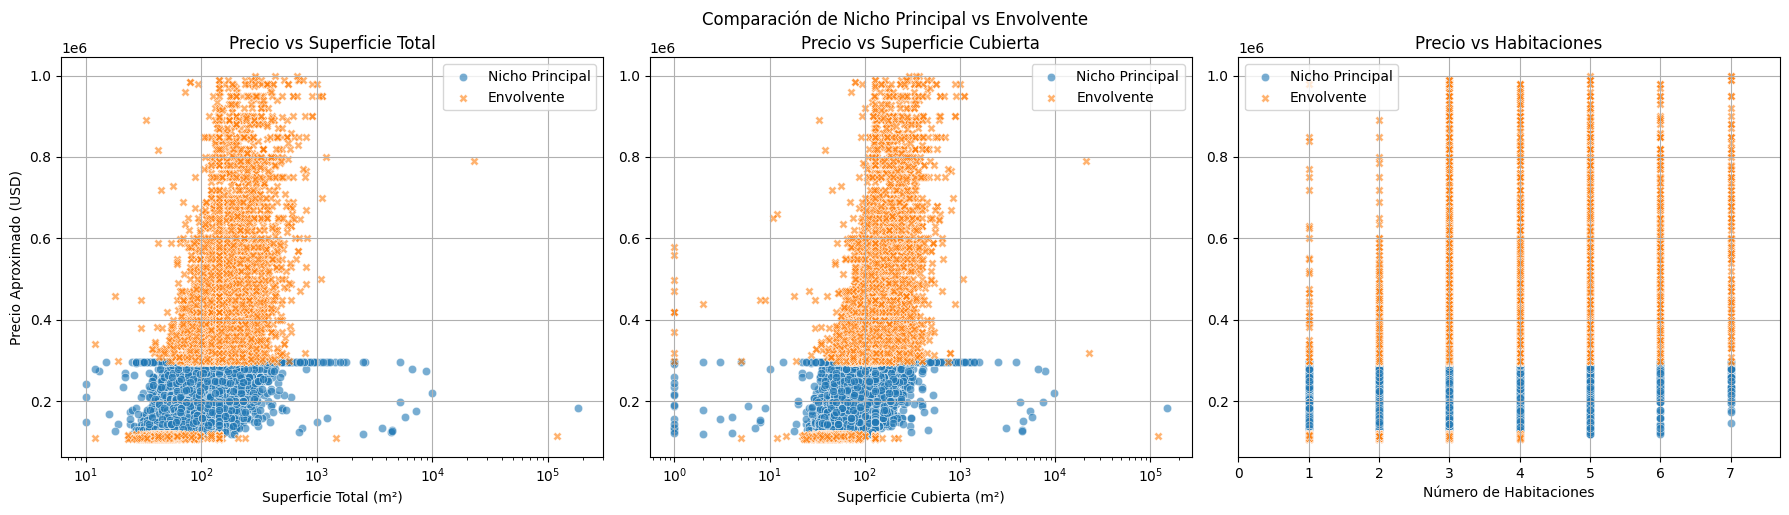

In [ ]:
# @title
# Crear una figura con subgráficas (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # Ajusta el tamaño de la figura según sea necesario para 3 gráficos uno al lado del otro

# 1. Diagrama de dispersión de surface_total_in_m2 vs price_aprox_usd
sns.scatterplot(data=properties_between_q1_q3_1M, x='surface_total_in_m2', y='price_aprox_usd', label='Nicho Principal', alpha=0.6, marker='o', ax=axes[0])
sns.scatterplot(data=df_envolvente, x='surface_total_in_m2', y='price_aprox_usd', label='Envolvente', alpha=0.6, marker='X', ax=axes[0])
axes[0].set_title('Precio vs Superficie Total') # Título simplificado para el subplot
axes[0].set_xlabel('Superficie Total (m²)')
axes[0].set_ylabel('Precio Aproximado (USD)')
axes[0].legend()
axes[0].grid(True)
axes[0].set_xscale('log') # Aplicar escala logarítmica al eje X

# 2. Diagrama de dispersión de superficie_cubierta_en_m2 vs precio_aprox_usd
sns.scatterplot(data=properties_between_q1_q3_1M, x='surface_covered_in_m2', y='price_aprox_usd', label='Nicho Principal', alpha=0.6, marker='o', ax=axes[1])
sns.scatterplot(data=df_envolvente, x='surface_covered_in_m2', y='price_aprox_usd', label='Envolvente', alpha=0.6, marker='X', ax=axes[1])
axes[1].set_title('Precio vs Superficie Cubierta') # Título simplificado para el subplot
axes[1].set_xlabel('Superficie Cubierta (m²)')
axes[1].set_ylabel('') # Mantener la etiqueta del eje y solo para el primer gráfico para mayor claridad
axes[1].legend()
axes[1].grid(True)
axes[1].set_xscale('log') # Aplicar escala logarítmica al eje X

# 3. Gráfico de dispersión de habitaciones vs precio_aprox_usd
sns.scatterplot(data=properties_between_q1_q3_1M, x='rooms', y='price_aprox_usd', label='Nicho Principal', alpha=0.6, marker='o', ax=axes[2])
sns.scatterplot(data=df_envolvente, x='rooms', y='price_aprox_usd', label='Envolvente', alpha=0.6, marker='X', ax=axes[2])
axes[2].set_title('Precio vs Habitaciones') # Título simplificado para el subplot
axes[2].set_xlabel('Número de Habitaciones')
axes[2].set_ylabel('') # Mantener la etiqueta del eje y solo para el primer gráfico para mayor claridad
axes[2].legend()
axes[2].grid(True)
# Para las habitaciones, use una escala lineal pero ajuste el límite del eje x a un rango razonable
combined_rooms = pd.concat([properties_between_q1_q3_1M['rooms'], df_envolvente['rooms']]).dropna()
if not combined_rooms.empty:
    x_upper_limit_rooms = combined_rooms.quantile(0.99) * 1.1 # Usar el percentil 99 para un límite dinámico
    axes[2].set_xlim(0, x_upper_limit_rooms) # Establecer el límite del eje X desde 0 hasta el límite calculado
else:
    axes[2].set_xlim(0, None) # Límite predeterminado si no hay datos


plt.tight_layout() # Ajustar el diseño para evitar que los títulos/etiquetas se superpongan
plt.suptitle('Comparación de Nicho Principal vs Envolvente', y=1.02) # Agregar un título principal para el conjunto de subgráficos
plt.show()

### Interpretar los hallazgos


**Razonamiento:** Analizar las estadísticas descriptivas y las distribuciones de los pasos anteriores para resumir los hallazgos sobre las propiedades del "envolvente" en comparación con el nicho principal. Esto implica interpretar los resúmenes numéricos, los recuentos de tipos de propiedad y las distribuciones geográficas observadas en los resultados anteriores.

### Resumen del Análisis de la 'Envolvente'

**Comparación de Características Numéricas (Estadísticas Descriptivas):**
Las propiedades en la 'envolvente' presentan, como era de esperar, precios promedio y medianos más altos y más bajos que el nicho principal (dado que la envolvente se definió como los rangos de precio justo fuera del Q1-Q3 del subconjunto < 1M USD). Específicamente:
- La envolvente inferior (precios entre 108.000 y 120.000 USD) contiene propiedades generalmente más pequeñas en superficie total y cubierta. y con menos habitaciones en promedio. que el nicho principal.
- La envolvente superior (precios entre 296.356 y 1.000.000 USD) tiende a incluir propiedades con precios. superficies y número de habitaciones promedio significativamente mayores que el nicho principal.
El precio por m² también muestra variaciones, con el segmento de envolvente superior generalmente teniendo un precio por m² más alto en promedio, lo que sugiere una combinación de ubicación o características de mayor valor.

**Comparación de Distribución de Tipos de Propiedad:**
Aunque los apartamentos son predominantes tanto en el nicho principal como en la 'envolvente', la proporción de otros tipos de propiedad, como casas ('house') y locales comerciales ('store'), es relativamente mayor en la 'envolvente', especialmente en el segmento de precio más alto. Esto indica que, fuera del rango de precio medio de los apartamentos, se encuentran con más frecuencia otros tipos de propiedades.

**Comparación de Distribución Geográfica (Ubicaciones Granulares):**
Si bien muchas de las ubicaciones granulares principales se superponen entre el nicho principal y la 'envolvente', la 'envolvente' muestra una mayor dispersión geográfica y la presencia de ubicaciones que no son tan dominantes en el nicho central. Esto sugiere que las propiedades en los límites de precio del segmento < 1M USD pueden estar ubicadas en una gama más amplia de sub-áreas, incluyendo algunas que son más caras (en la envolvente superior) o menos céntricas/valiosas (en la envolvente inferior) que las del corazón del nicho principal.

### Conclusiones sobre la Estructura del Mercado:
El análisis de la 'envolvente' revela las transiciones en la estructura del mercado alrededor del nicho principal (< 1M USD, Q1-Q3).
- Las propiedades en la **envolvente inferior** (justo por debajo del nicho principal) tienden a ser más pequeñas y/o ubicadas en áreas con precios por m² ligeramente más bajos, representando el extremo inferior del mercado de propiedades 'típicas'.
- Las propiedades en la **envolvente superior** (justo por encima del nicho principal, hasta 1M USD) a menudo son significativamente más grandes, con más habitaciones, y/o ubicadas en sub-áreas de mayor valor, actuando como un puente hacia el segmento de propiedades de lujo o de alto valor (los outliers).
La composición por tipo de propiedad y la distribución geográfica más amplia en la 'envolvente' confirman que los límites de precio del nicho principal marcan un cambio en las características típicas de las propiedades disponibles en el mercado. La transición del nicho principal a los segmentos de precios más altos implica no solo un aumento en el precio, sino también en el tamaño, el número de habitaciones y, a menudo, un cambio hacia tipos de propiedad menos comunes en el nicho central y ubicaciones geográficas más diversas.


## 8. Conclusión final de los análisis realizados:

* El nicho principal de mercado para propiedades por debajo de 1.000.000 USD se identificó entre aproximadamente \$120.000 (Q1) y \$296.356 (Q3).
* La 'envolvente' que rodea este nicho se definió en dos partes:
  * **Envolvente Inferior:** Propiedades con precios entre aproximadamente \$108.000 (o el precio mínimo general) y \$120.000.
  * **Envolvente Superior:** Propiedades con precios entre aproximadamente \$296.356 y \$1.000.000.
* Se encontraron un total de 5081 propiedades dentro de estos rangos combinados de la 'envolvente'.
* Las propiedades en la 'envolvente' generalmente tienen precios promedio y medianos, área de superficie total, área de superficie cubierta y número de habitaciones más altos en comparación con el nicho principal, particularmente en la envolvente superior.
* El precio promedio por metro cuadrado también fue más alto en la 'envolvente', lo que sugiere un valor potencialmente mayor por metro cuadrado en los límites del mercado.
* Si bien 'apartment' es el tipo de propiedad más común en ambos segmentos, la 'envolvente' tiene una proporción relativamente mayor de propiedades tipo 'house' y 'store', especialmente en la envolvente superior.
* La 'envolvente' muestra una mayor dispersión geográfica e incluye ubicaciones menos dominantes en el nicho principal, lo que sugiere una gama más amplia de sub-áreas en los límites de precio.

## 9. Plan de trabajo y decisiones de marketing - Refinamiento con el Análisis de la Envolvente

### **Conclusiones propias que se presentarían al cliente de ser un trabajo real**

El análisis de la 'envolvente' ha enriquecido nuestra comprensión del mercado alrededor del nicho principal (departamentos entre 120.000 y 296.355 USD). Si bien este nicho sigue siendo el foco principal (aproximadamente 51.75% del dataset), la 'envolvente' nos muestra qué hay justo fuera de estos límites de precio y cómo son esas propiedades.

**Implicaciones para las Estrategias de Marketing:**

1.  **Líneas de Créditos Hipotecarios y Financiamiento:**
    - La estrategia de consultar líneas de crédito hipotecario hasta 300.000 USD sigue siendo fundamental para el nicho principal.
    - Sin embargo, el análisis de la envolvente superior (propiedades entre 296.355 y 1.000.000 USD) sugiere que también deberíamos explorar opciones de financiamiento para rangos de precios ligeramente superiores. Propiedades en este segmento de la envolvente a menudo son más grandes o están en ubicaciones de mayor valor. Entender las opciones de crédito disponibles para compradores que pueden estirar un poco su presupuesto más allá del nicho principal es crucial para captar este segmento de transición.
    - Para la envolvente inferior (propiedades entre 108.000 y 120.000 USD), si bien representan un volumen menor, entender las opciones de financiamiento para compradores con presupuestos más ajustados podría abrir un segmento de mercado adicional.

2.  **Publicidad Intensiva y Diferenciación:**
    - La publicidad intensiva en el nicho principal de apartamentos (120.000 - 296.355 USD) debe continuar, destacando las características típicas de este segmento (tamaño, habitaciones, ubicación común).
    - La comprensión de la envolvente permite diferenciar la publicidad:
        - **Envolvente Superior:** La publicidad para propiedades en este rango (296.355 - 1.000.000 USD) debe enfocarse en destacar sus atributos diferenciadores: mayor tamaño, más habitaciones, ubicaciones premium (como Palermo Chico o sub-áreas de Belgrano con precios más altos), o tipos de propiedad menos comunes en el nicho (casas, locales). El mensaje debe atraer a compradores que buscan 'dar un paso más' o que tienen un presupuesto mayor.
        - **Envolvente Inferior:** La publicidad para propiedades en este rango (108.000 - 120.000 USD) podría enfocarse en la accesibilidad al mercado, destacando el precio como una ventaja y resaltando características clave para compradores con presupuesto limitado (ej. 'Ideal para primera vivienda', 'Excelente relación precio-m²').
    - La identificación de otros tipos de propiedad (casas, locales) más frecuentes en la envolvente superior resalta la necesidad de adaptar los canales y mensajes publicitarios para estos segmentos específicos, que pueden buscar características o ubicaciones diferentes a los compradores de apartamentos del nicho principal.

3.  **Modelos Predictivos y Ajuste de Precios:**
    - El análisis de la envolvente es vital para refinar modelos predictivos. Al entender las características de las propiedades justo fuera del nicho principal, los modelos pueden ser más precisos al predecir precios dentro del nicho, considerando cómo se valoran las características en segmentos de precio adyacentes.
    - La comparación de propiedades en el nicho principal con aquellas en la envolvente puede ayudar a identificar propiedades potencialmente subvaloradas o sobrevaloradas. Por ejemplo, un apartamento en el nicho principal con características (superficie, habitaciones) y ubicación similares a propiedades en la envolvente superior, pero con un precio más cercano al Q3 del nicho, podría estar bien posicionado. Inversamente, una propiedad en el nicho con características más alineadas a la envolvente inferior pero con un precio cercano al Q3 podría necesitar revisión.
    - La estrategia de ajustar precios con los propietarios debe considerar la posición de la propiedad dentro del nicho o la envolvente, utilizando las características típicas de cada segmento como referencia. Para propiedades atípicas o en los límites, la comparación directa con propiedades similares en la envolvente es clave para un ajuste realista.

**En resumen, el análisis de la 'envolvente' proporciona un contexto crucial para las decisiones de marketing. Permite pasar de una estrategia centrada únicamente en el segmento medio del nicho principal a una estrategia más matizada que reconoce y aborda las transiciones del mercado, diferenciando las tácticas de financiamiento, publicidad y ajuste de precios para propiedades en los límites del nicho y en los segmentos de mayor valor.**